In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

The comp-activ databases is a collection of a computer systems activity measures .
The data was collected from a Sun Sparcstation 20/712 with 128 Mbytes of memory running in a multi-user university department. Users would typically be doing a large variety of tasks ranging from accessing the internet, editing files or running very cpu-bound programs. 

As you are a budding data scientist you thought to find out a linear equation to build a model to predict 'usr'(Portion of time (%) that cpus run in user mode) and to find out how each attribute affects the system to be in 'usr' mode using a list of system attributes.

## 1.1 Read the data and do exploratory data analysis. Describe the data briefly. (Check the Data types, shape, EDA, 5 point summary). Perform Univariate, Bivariate Analysis, Multivariate Analysis.

### Read the dataset into DataFrame

In [2]:
df=pd.read_excel('/Users/aravindakshan/Downloads/compactiv.xlsx')

### Shape of DataFrame

In [3]:
df.shape

(8192, 22)

### Display first 5 rows of the DataFrame

In [4]:
df.head()

lread  lwrite  scall  sread  swrite  fork  exec    rchar    wchar  pgout  \
0      1       0   2147     79      68   0.2   0.2  40671.0  53995.0    0.0   
1      0       0    170     18      21   0.2   0.2    448.0   8385.0    0.0   
2     15       3   2162    159     119   2.0   2.4      NaN  31950.0    0.0   
3      0       0    160     12      16   0.2   0.2      NaN   8670.0    0.0   
4      5       1    330     39      38   0.4   0.4      NaN  12185.0    0.0   

   ...  pgscan  atch  pgin  ppgin    pflt    vflt         runqsz  freemem  \
0  ...     0.0   0.0   1.6    2.6   16.00   26.40      CPU_Bound     4670   
1  ...     0.0   0.0   0.0    0.0   15.63   16.83  Not_CPU_Bound     7278   
2  ...     0.0   1.2   6.0    9.4  150.20  220.20  Not_CPU_Bound      702   
3  ...     0.0   0.0   0.2    0.2   15.60   16.80  Not_CPU_Bound     7248   
4  ...     0.0   0.0   1.0    1.2   37.80   47.60  Not_CPU_Bound      633   

  freeswap  usr  
0  1730946   95  
1  1869002   97  
2  1021237   87  
3  1863704   98  
4  1760253   90  

[5 rows x 22 columns]

### DataFrame Data Types of individual columns

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8192 entries, 0 to 8191
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   lread     8192 non-null   int64  
 1   lwrite    8192 non-null   int64  
 2   scall     8192 non-null   int64  
 3   sread     8192 non-null   int64  
 4   swrite    8192 non-null   int64  
 5   fork      8192 non-null   float64
 6   exec      8192 non-null   float64
 7   rchar     8088 non-null   float64
 8   wchar     8177 non-null   float64
 9   pgout     8192 non-null   float64
 10  ppgout    8192 non-null   float64
 11  pgfree    8192 non-null   float64
 12  pgscan    8192 non-null   float64
 13  atch      8192 non-null   float64
 14  pgin      8192 non-null   float64
 15  ppgin     8192 non-null   float64
 16  pflt      8192 non-null   float64
 17  vflt      8192 non-null   float64
 18  runqsz    8192 non-null   object 
 19  freemem   8192 non-null   int64  
 20  freeswap  8192 non-null   int6

> Total number of rows are 8192.
>> Among 8192, rchar and wchar has missing value

> runqsz feature alone is of Object type

> remaining all columns are of Integer or float (otherwise numerical datatype)

### 5 point summary of DataFrame

In [6]:
df.describe().T

count          mean            std     min        25%        50%  \
lread     8192.0  1.955969e+01      53.353799     0.0        2.0        7.0   
lwrite    8192.0  1.310620e+01      29.891726     0.0        0.0        1.0   
scall     8192.0  2.306318e+03    1633.617322   109.0     1012.0     2051.5   
sread     8192.0  2.104800e+02     198.980146     6.0       86.0      166.0   
swrite    8192.0  1.500582e+02     160.478980     7.0       63.0      117.0   
fork      8192.0  1.884554e+00       2.479493     0.0        0.4        0.8   
exec      8192.0  2.791998e+00       5.212456     0.0        0.2        1.2   
rchar     8088.0  1.973857e+05  239837.493526   278.0    34091.5   125473.5   
wchar     8177.0  9.590299e+04  140841.707911  1498.0    22916.0    46619.0   
pgout     8192.0  2.285317e+00       5.307038     0.0        0.0        0.0   
ppgout    8192.0  5.977229e+00      15.214590     0.0        0.0        0.0   
pgfree    8192.0  1.191971e+01      32.363520     0.0        0.0        0.0   
pgscan    8192.0  2.152685e+01      71.141340     0.0        0.0        0.0   
atch      8192.0  1.127505e+00       5.708347     0.0        0.0        0.0   
pgin      8192.0  8.277960e+00      13.874978     0.0        0.6        2.8   
ppgin     8192.0  1.238859e+01      22.281318     0.0        0.6        3.8   
pflt      8192.0  1.097938e+02     114.419221     0.0       25.0       63.8   
vflt      8192.0  1.853158e+02     191.000603     0.2       45.4      120.4   
freemem   8192.0  1.763456e+03    2482.104511    55.0      231.0      579.0   
freeswap  8192.0  1.328126e+06  422019.426957     2.0  1042623.5  1289289.5   
usr       8192.0  8.396887e+01      18.401905     0.0       81.0       89.0   

                  75%         max  
lread          20.000     1845.00  
lwrite         10.000      575.00  
scall        3317.250    12493.00  
sread         279.000     5318.00  
swrite        185.000     5456.00  
fork            2.200       20.12  
exec            2.800       59.56  
rchar      267828.750  2526649.00  
wchar      106101.000  1801623.00  
pgout           2.400       81.44  
ppgout          4.200      184.20  
pgfree          5.000      523.00  
pgscan          0.000     1237.00  
atch            0.600      211.58  
pgin            9.765      141.20  
ppgin          13.800      292.61  
pflt          159.600      899.80  
vflt          251.800     1365.00  
freemem      2002.250    12027.00  
freeswap  1730379.500  2243187.00  
usr            94.000       99.00

> pgout, ppgout, pgscan, atch shows the 25, 50 and 75 quantiles as Zero
 
> they also show positive skewness as the median is lower than that of mean values

> the target variable usr shows negative skewness as per above summary 

> the scale of independent variables aren't uniform, few are at higher scale and other low. Will need to check if scaling is needed

## EDA

### Univariate Analysis 

lread
Skew : 13.9


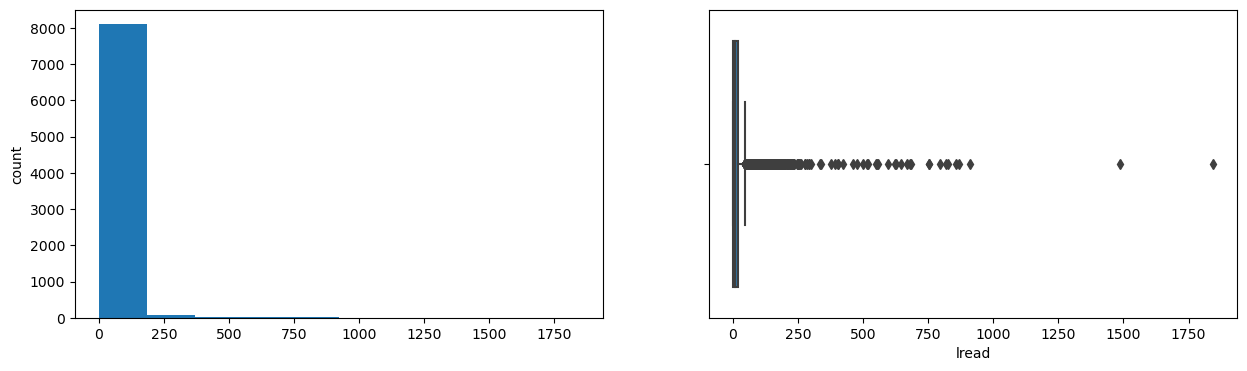

lwrite
Skew : 5.28


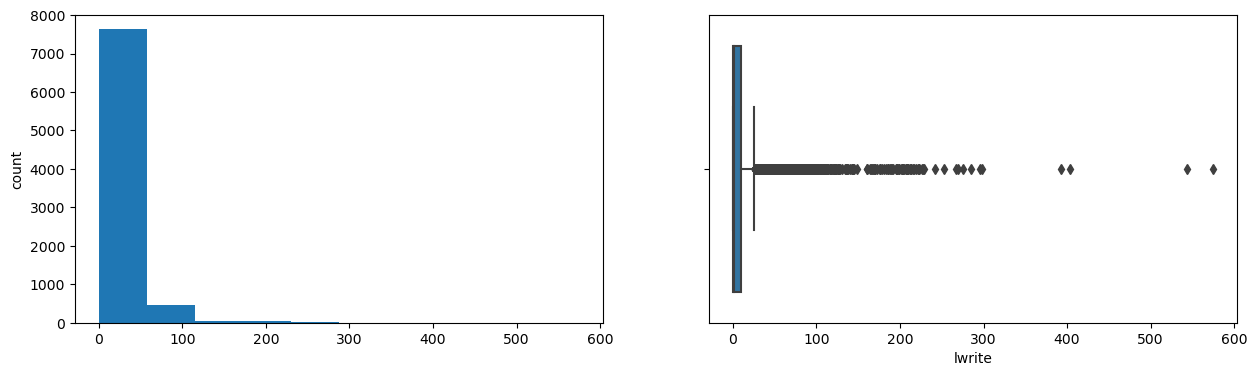

scall
Skew : 0.9


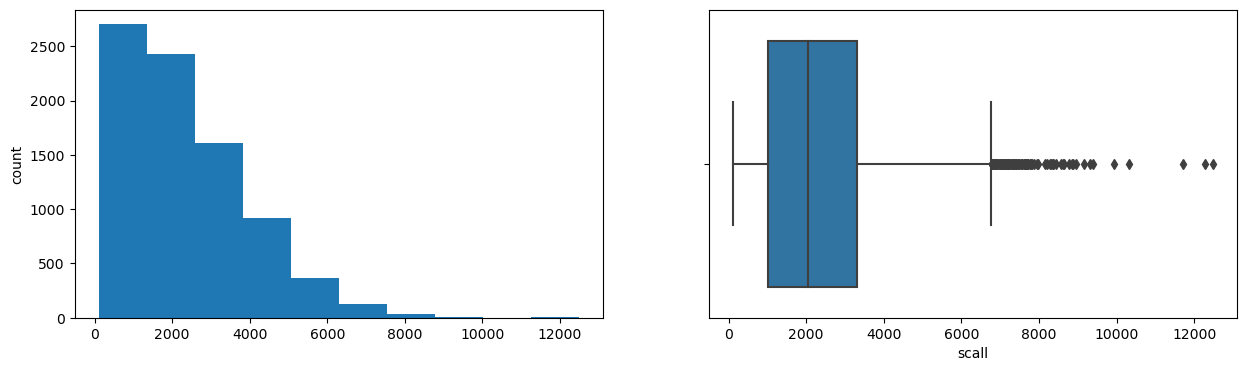

sread
Skew : 5.46


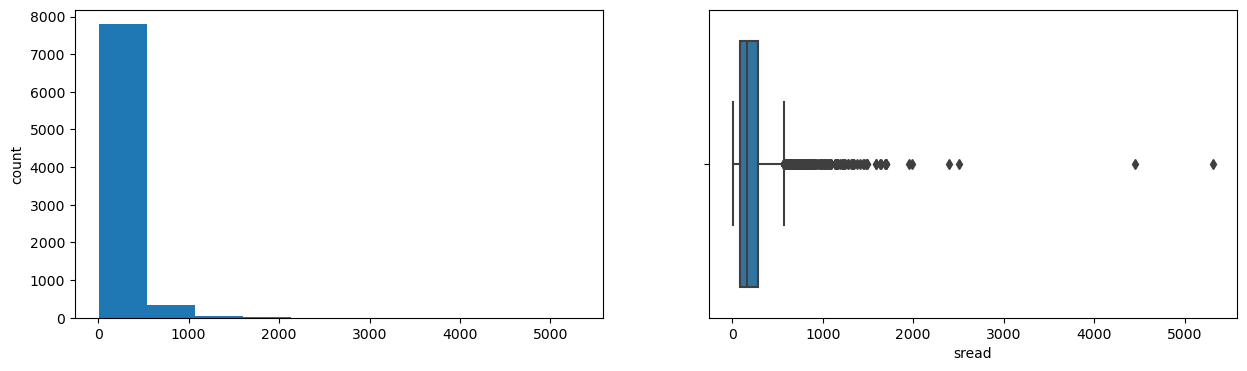

swrite
Skew : 9.61


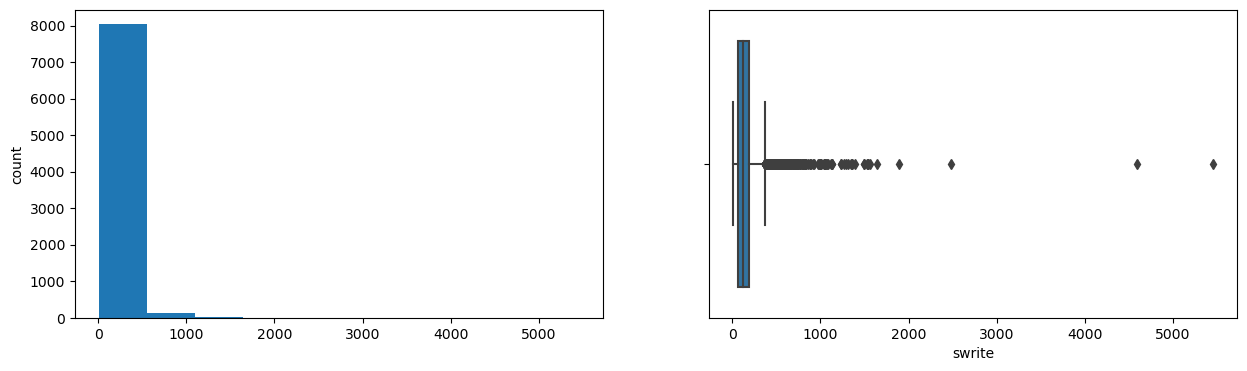

fork
Skew : 2.25


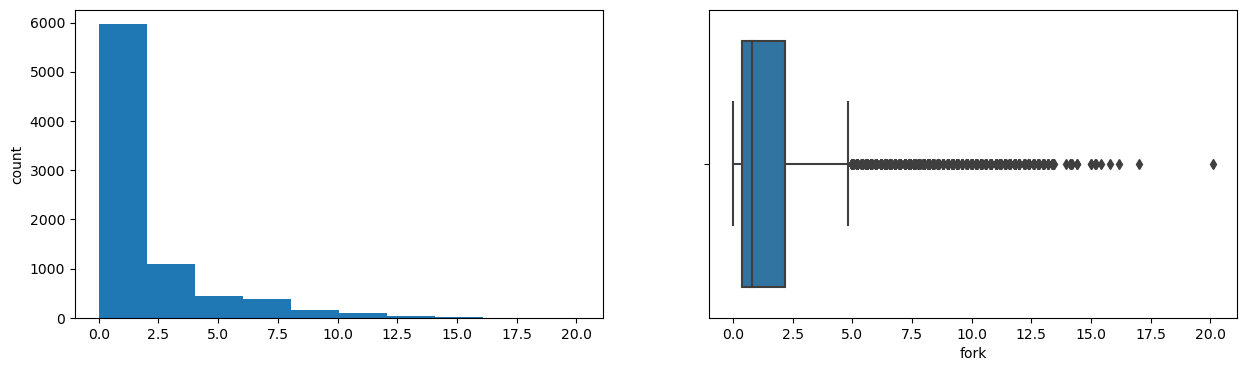

exec
Skew : 4.07


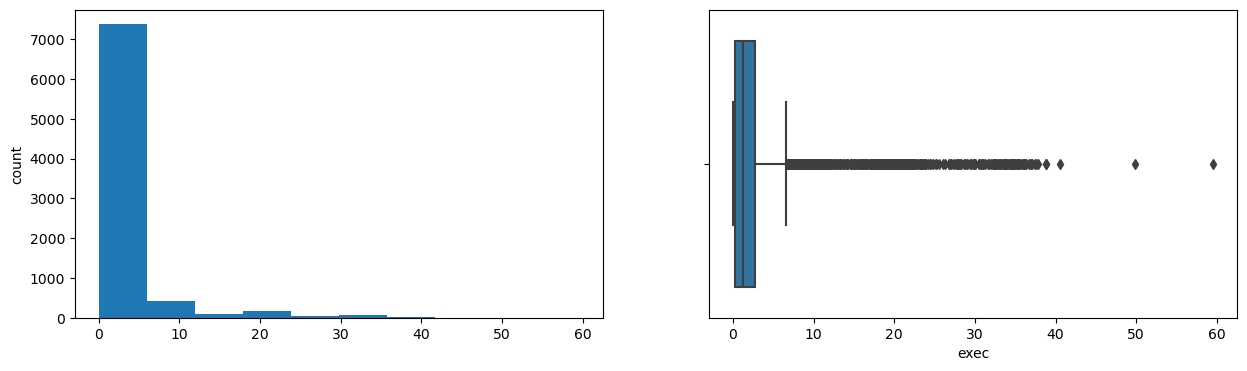

rchar
Skew : 2.85


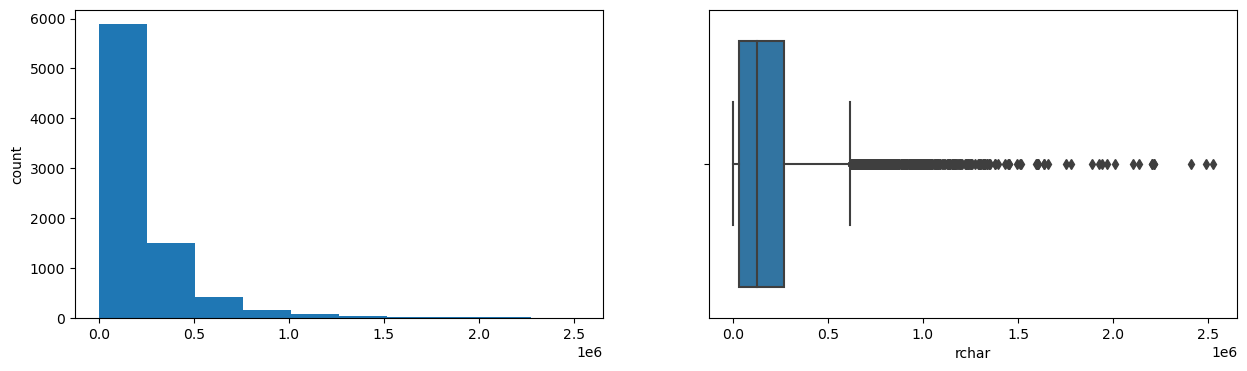

wchar
Skew : 3.85


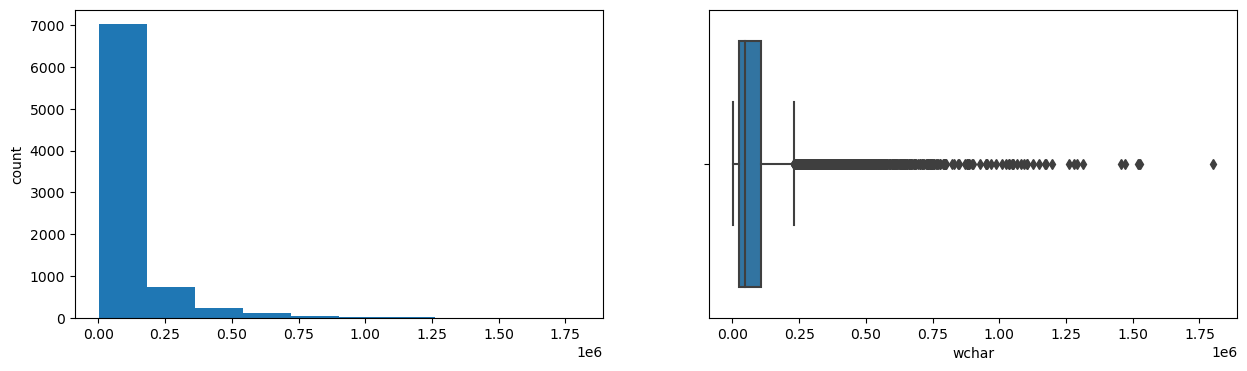

pgout
Skew : 5.07


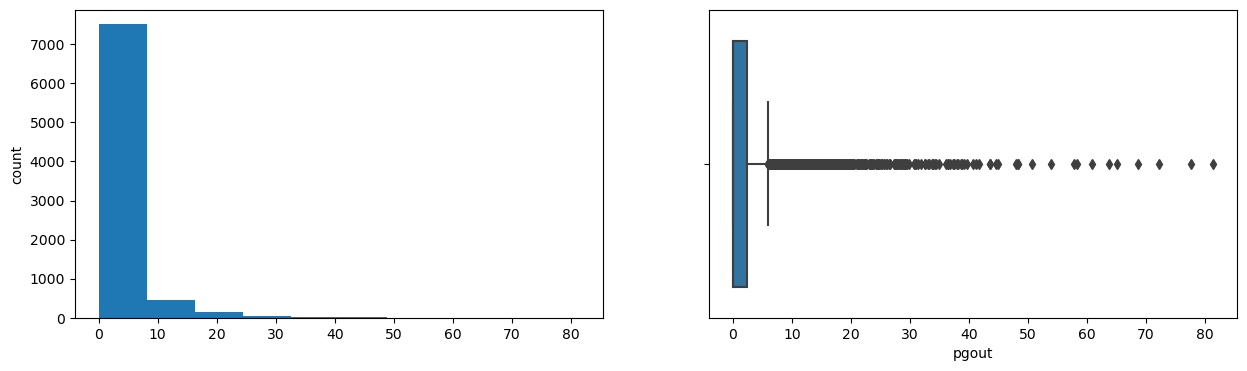

ppgout
Skew : 4.68


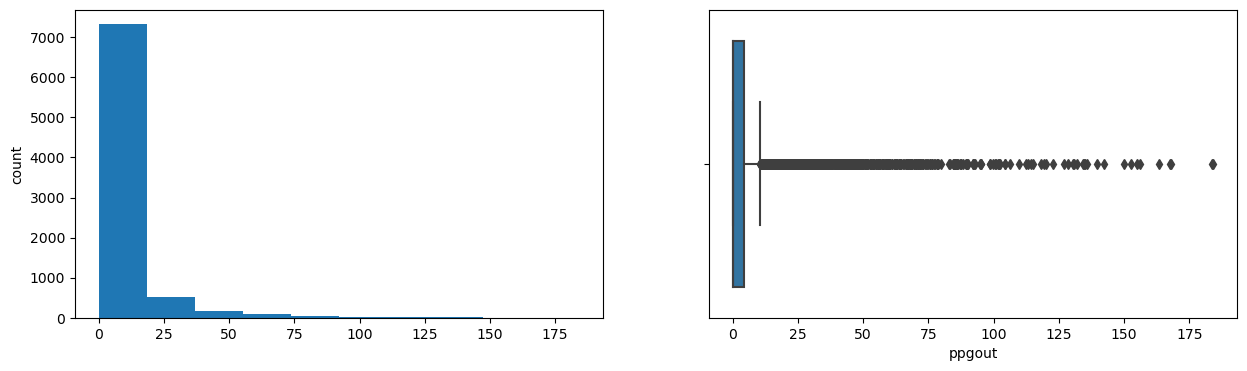

pgfree
Skew : 4.77


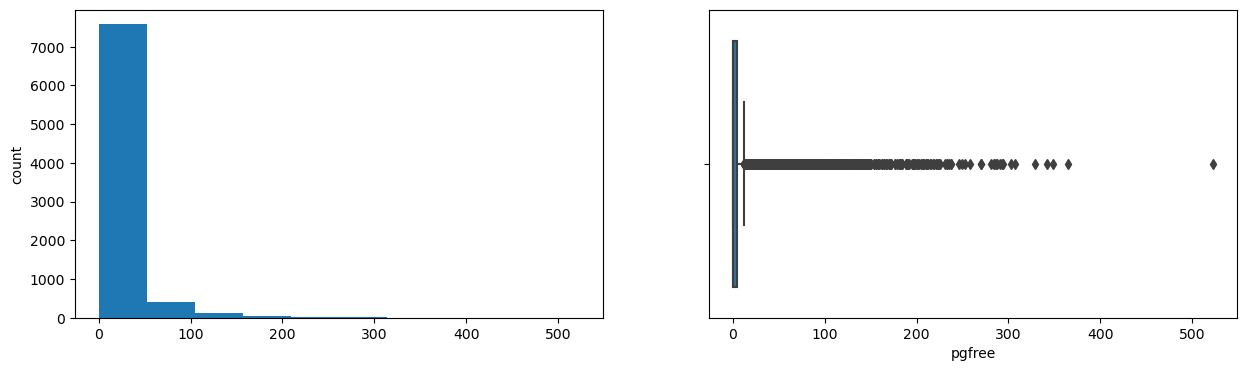

pgscan
Skew : 5.81


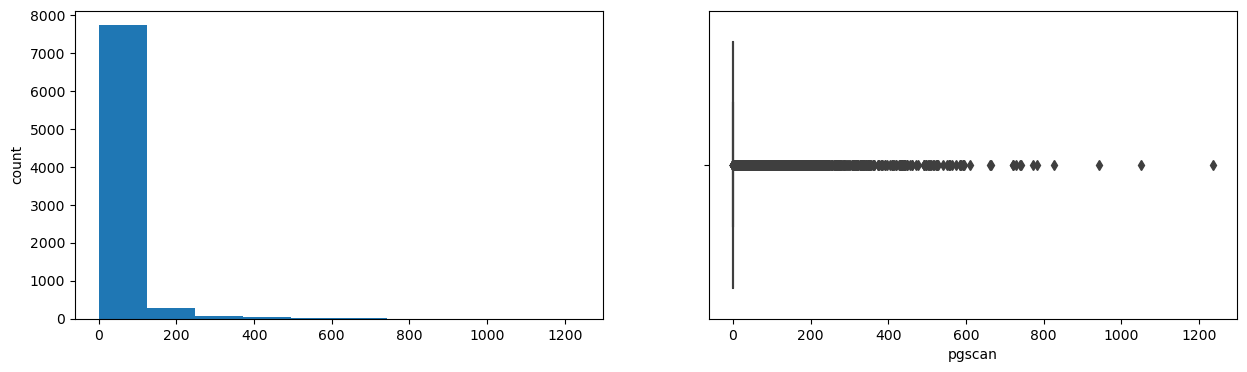

atch
Skew : 21.54


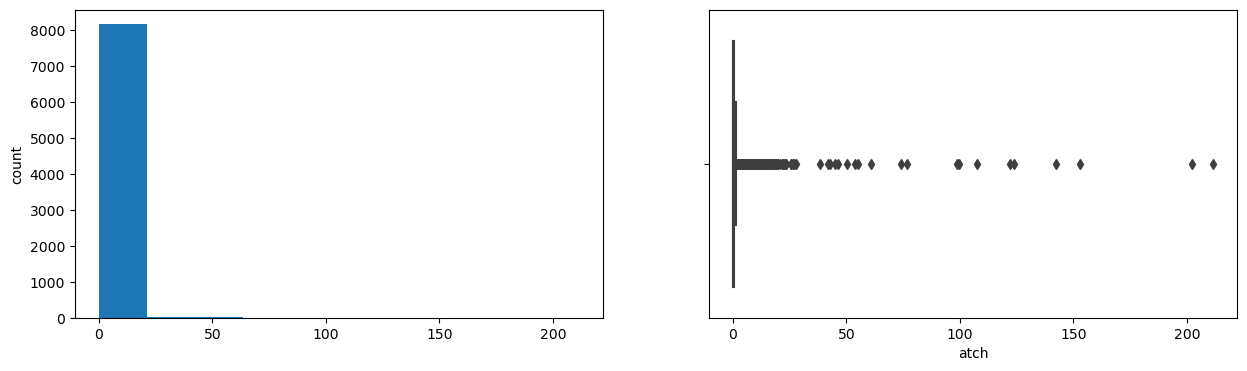

pgin
Skew : 3.24


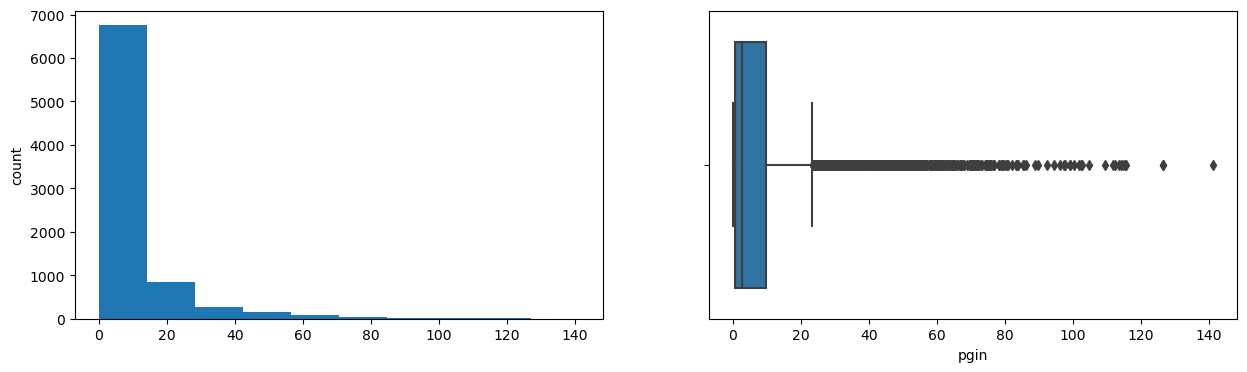

ppgin
Skew : 3.9


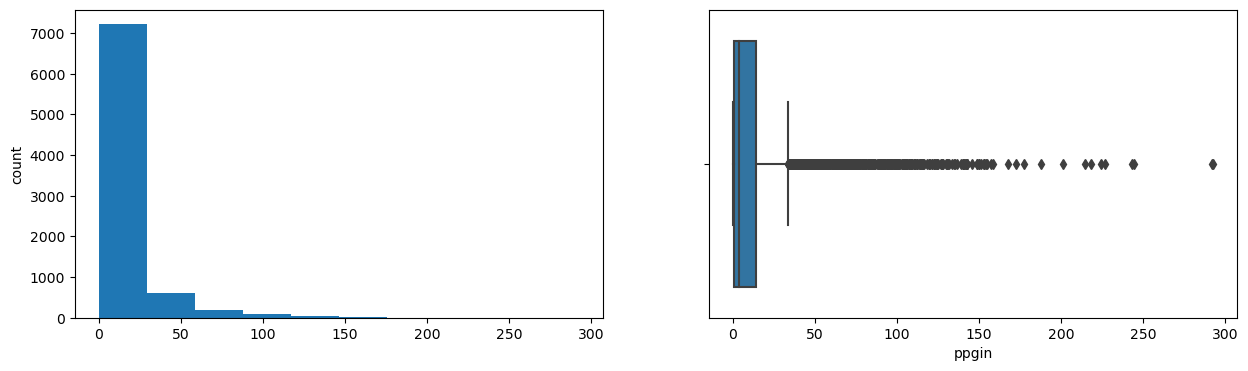

pflt
Skew : 1.72


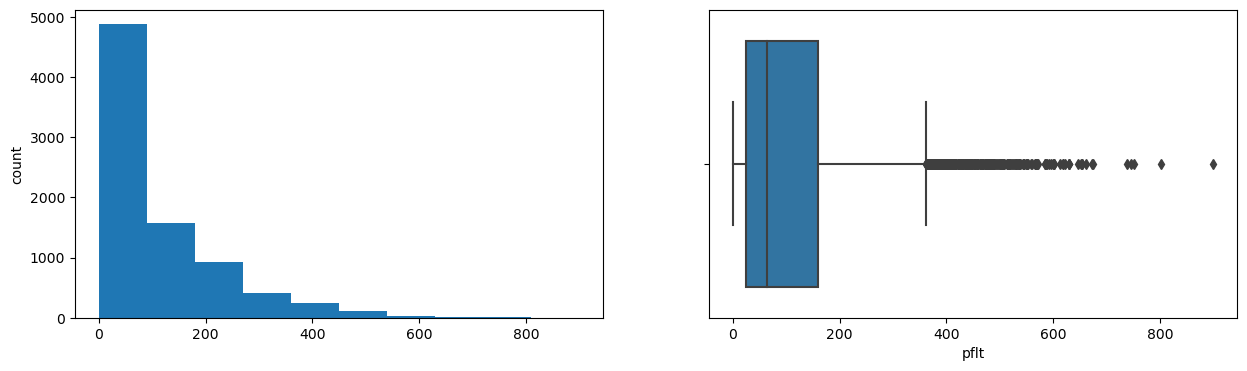

vflt
Skew : 1.74


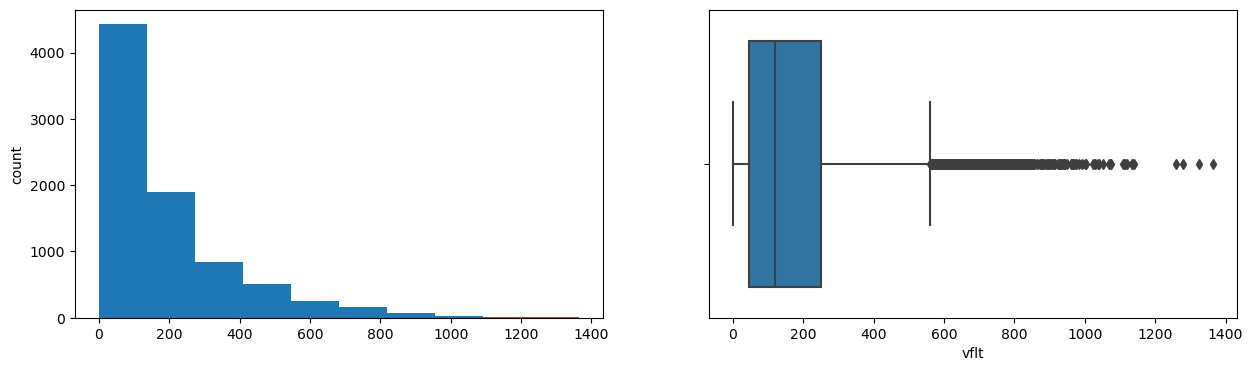

freemem
Skew : 1.81


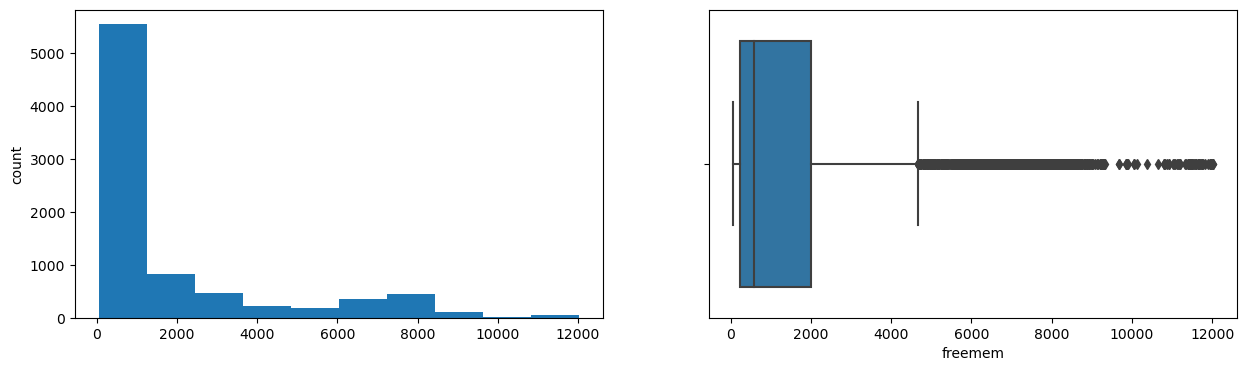

freeswap
Skew : -0.79


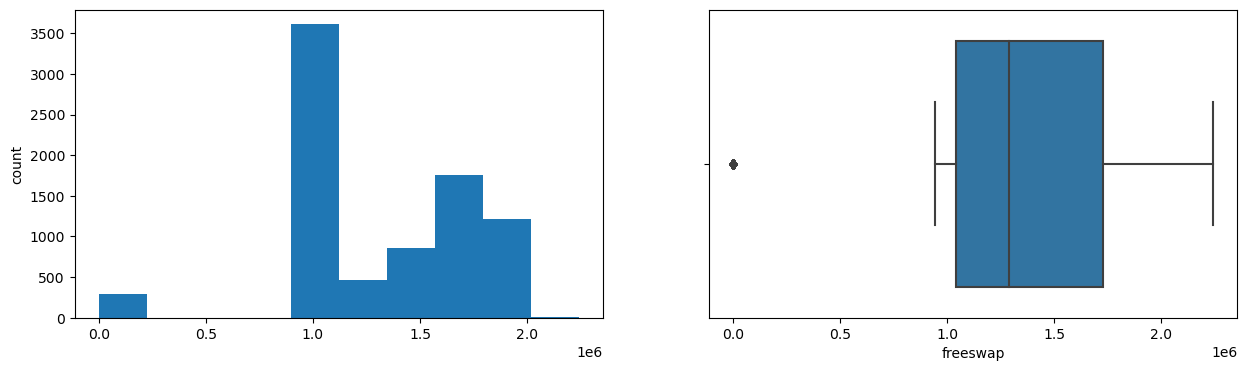

usr
Skew : -3.42


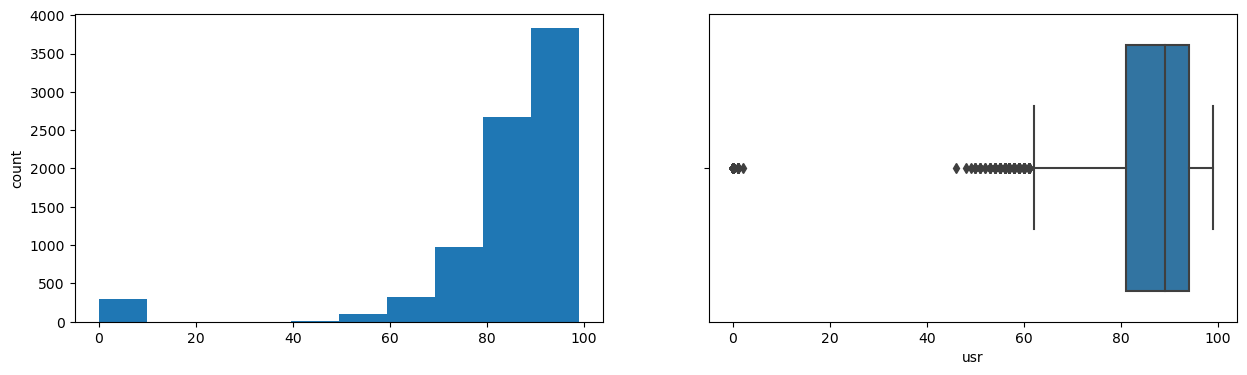

In [7]:
num_cols=[col for col in df.columns if df[col].dtype != 'O']
for col in num_cols:
    print(col)
    print('Skew :',round(df[col].skew(),2))
    plt.figure(figsize=(15,4))
    plt.subplot(1,2,1)
    df[col].hist(bins=10, grid=False)
    plt.ylabel('count')
    plt.subplot(1,2,2)
    sns.boxplot(x=df[col])
    plt.show()

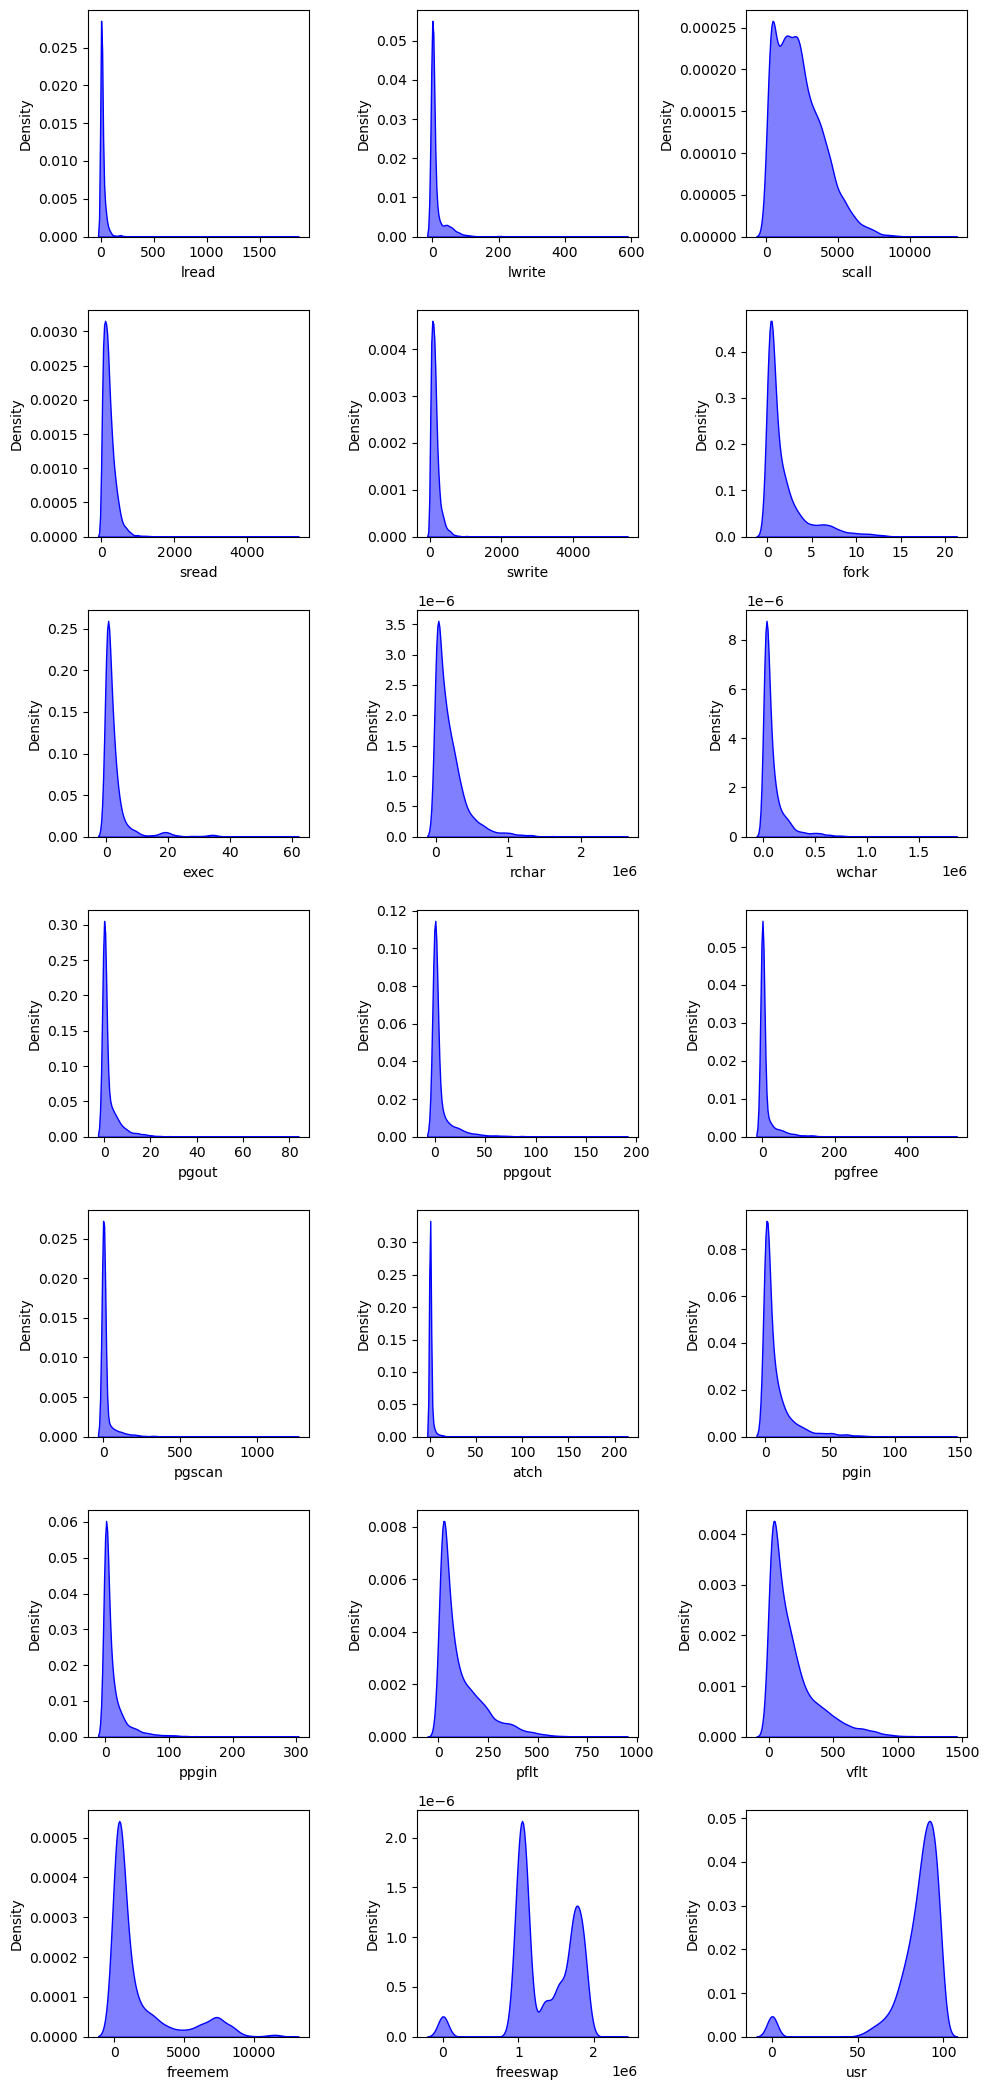

In [8]:
num_cols=[col for col in df.columns if df[col].dtype != 'O']
from vizad.univariate import plot_univariate_numeric
plot_univariate_numeric(df,num_cols,kind='density')

> Above graph shows outliers in almost all features

> Skewness is witnessed as well

### Bivariate Analysis

/Users/aravindakshan/anaconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:1690: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  f = plt.figure(figsize=(height, height))


<Figure size 2000x4000 with 0 Axes>

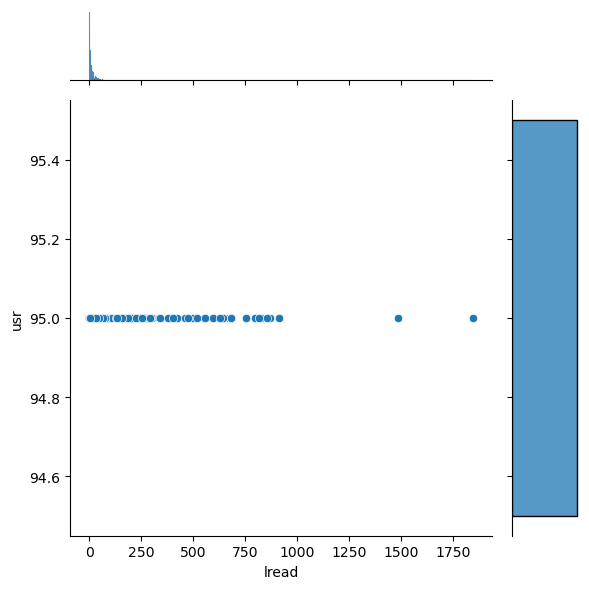

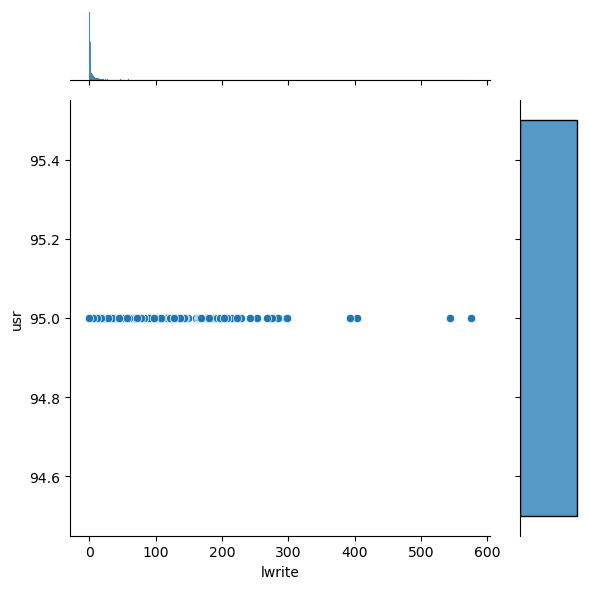

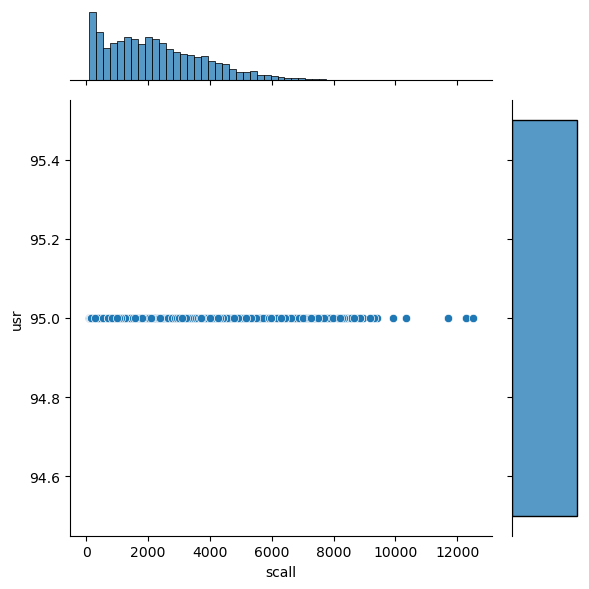

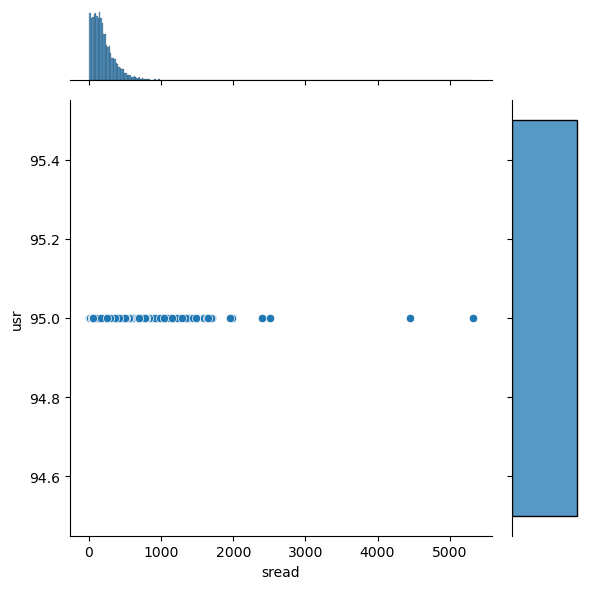

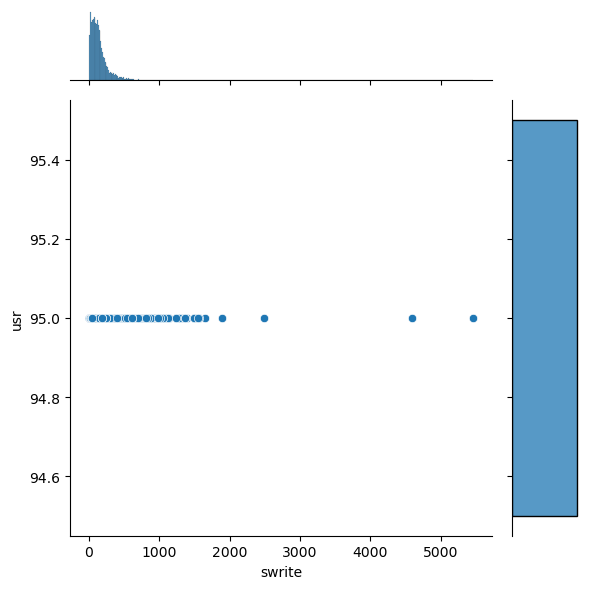

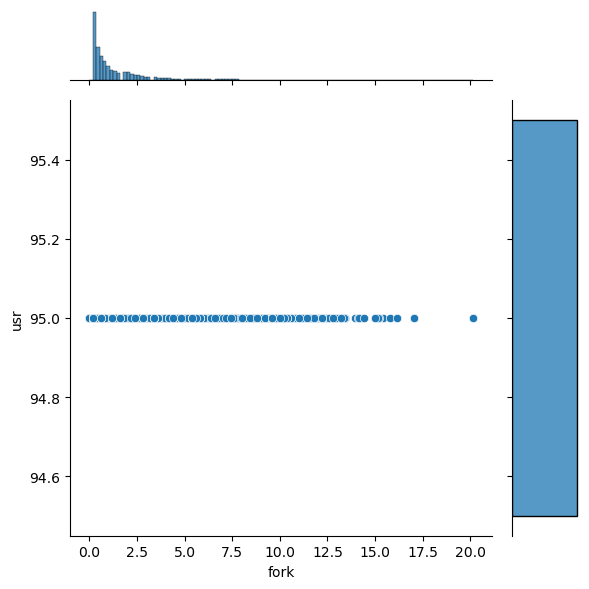

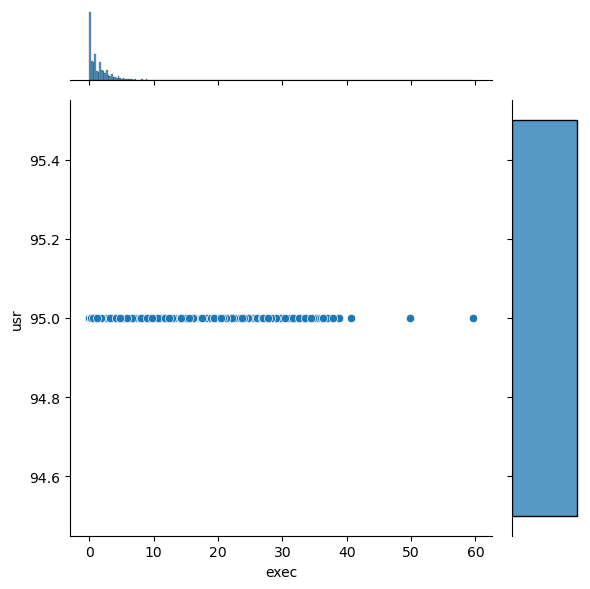

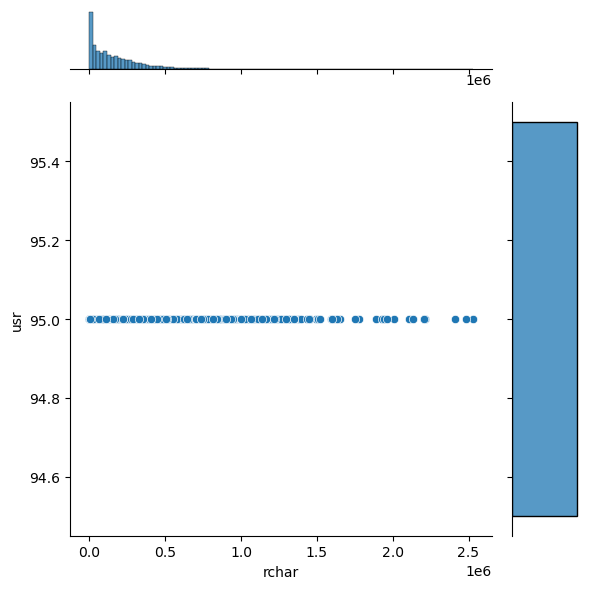

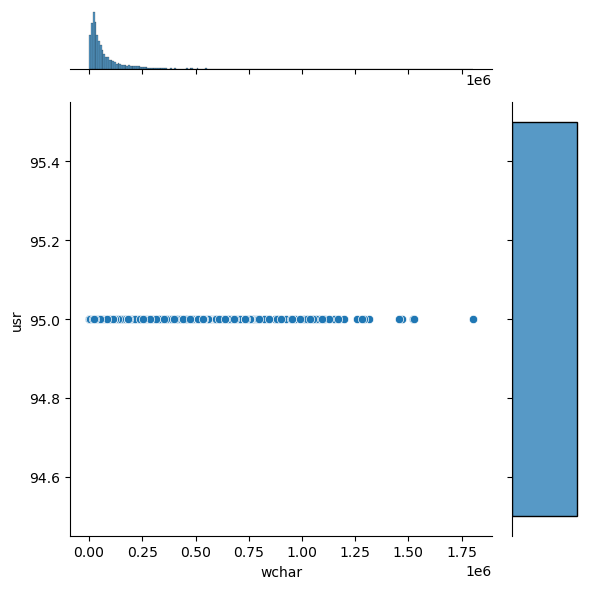

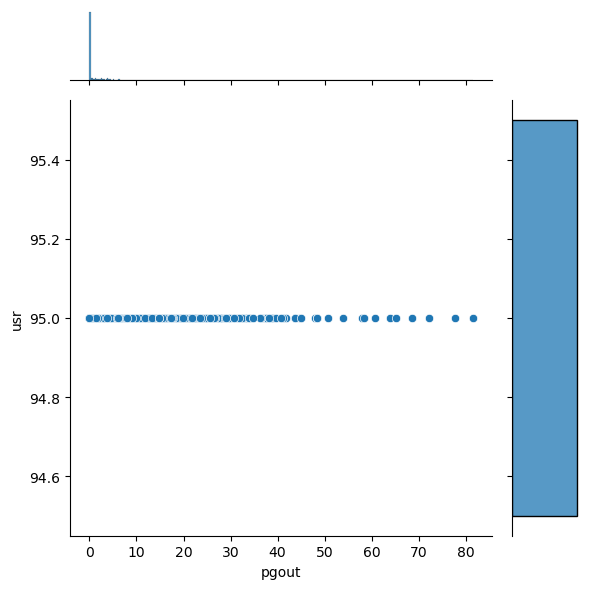

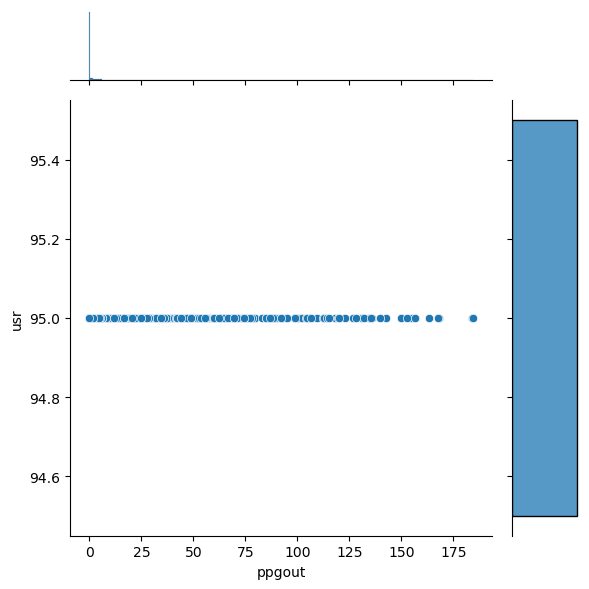

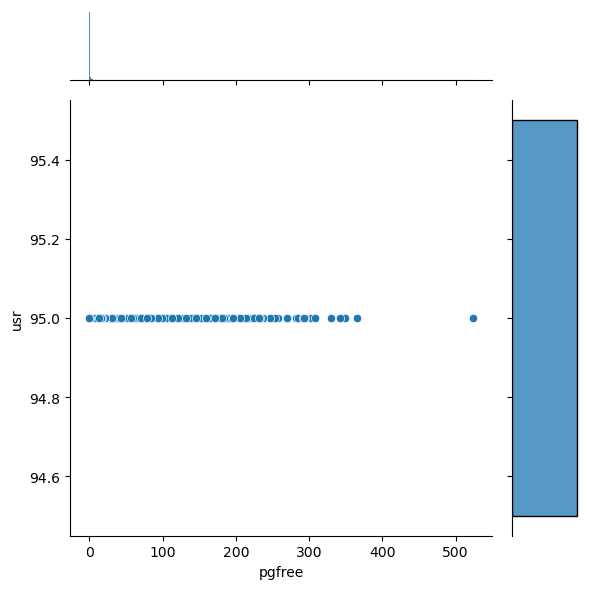

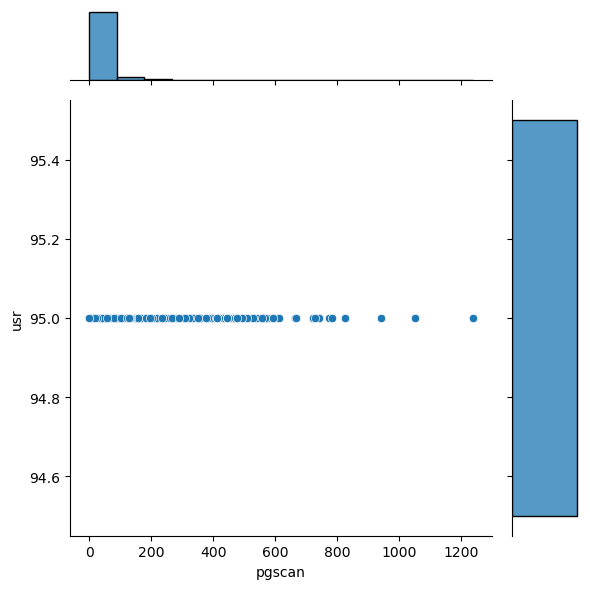

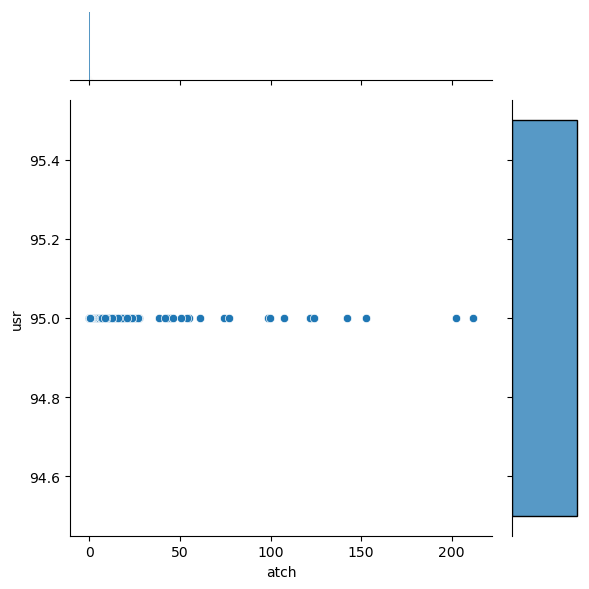

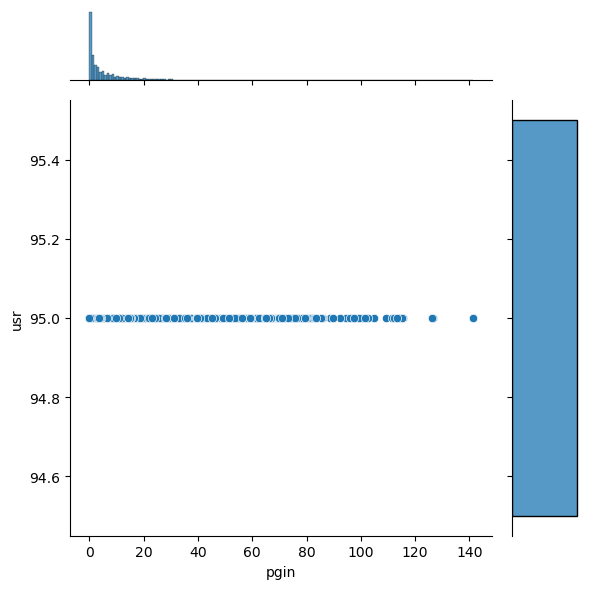

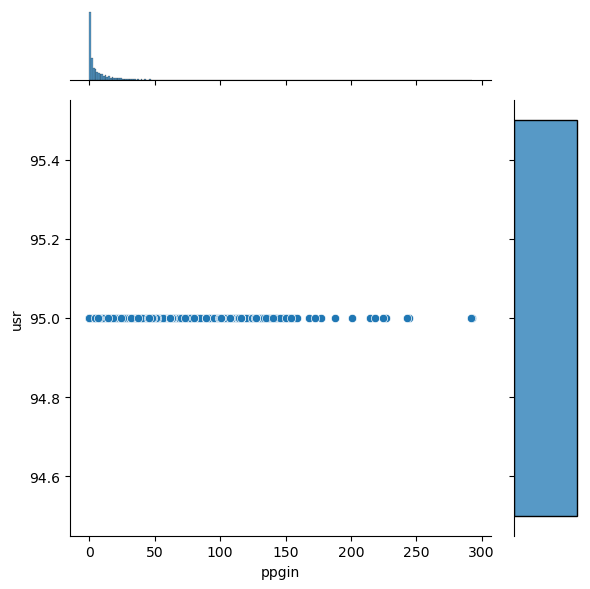

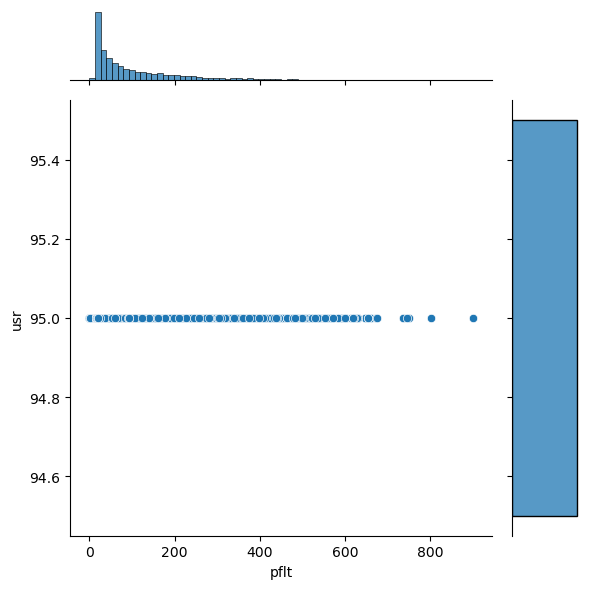

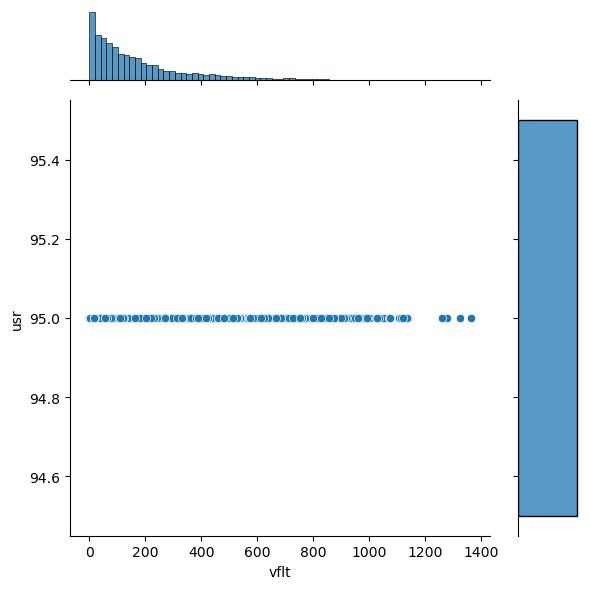

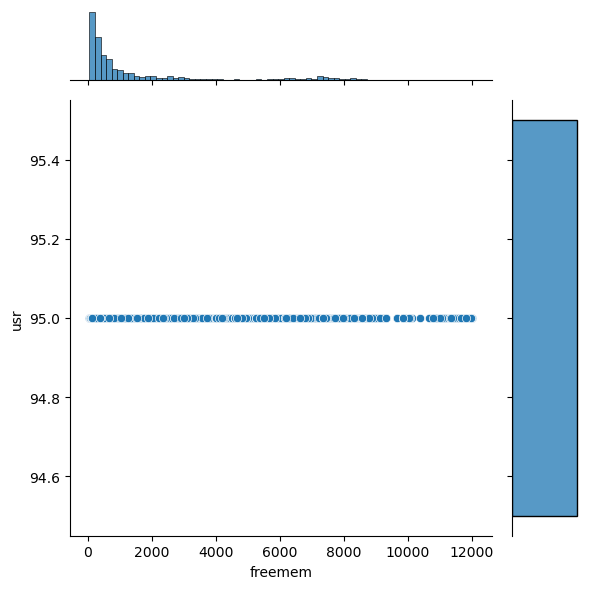

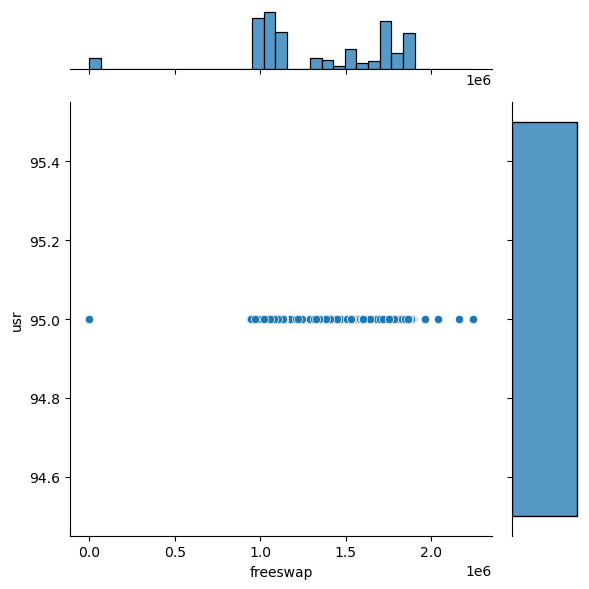

In [9]:
s_col=df[['lread', 'lwrite', 'scall', 'sread', 'swrite', 'fork', 'exec', 'rchar',
       'wchar', 'pgout', 'ppgout', 'pgfree', 'pgscan', 'atch', 'pgin', 'ppgin',
       'pflt', 'vflt', 'freemem', 'freeswap']]
t_col=df['usr']
plt.figure(figsize=(20,40))
for i in range(0,len(s_col.columns)):
    sns.jointplot(data=df,x=s_col[s_col.columns[i]],y=t_col[0])
    plt.ylabel('usr')
    plt.tight_layout()
plt.show()

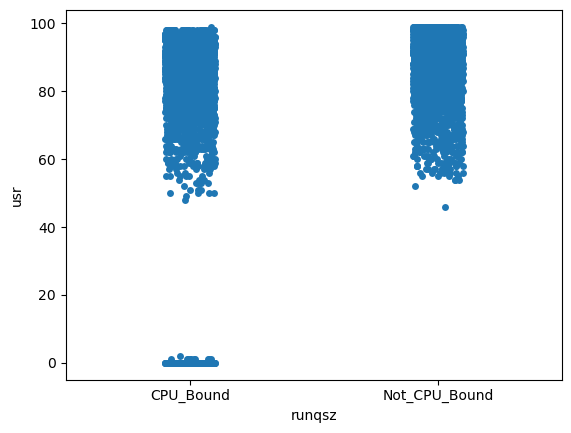

In [10]:
sns.stripplot(x=df['runqsz'],y=df['usr']);

In [11]:
from vizad.bivariate import plot_bivariate_numeric

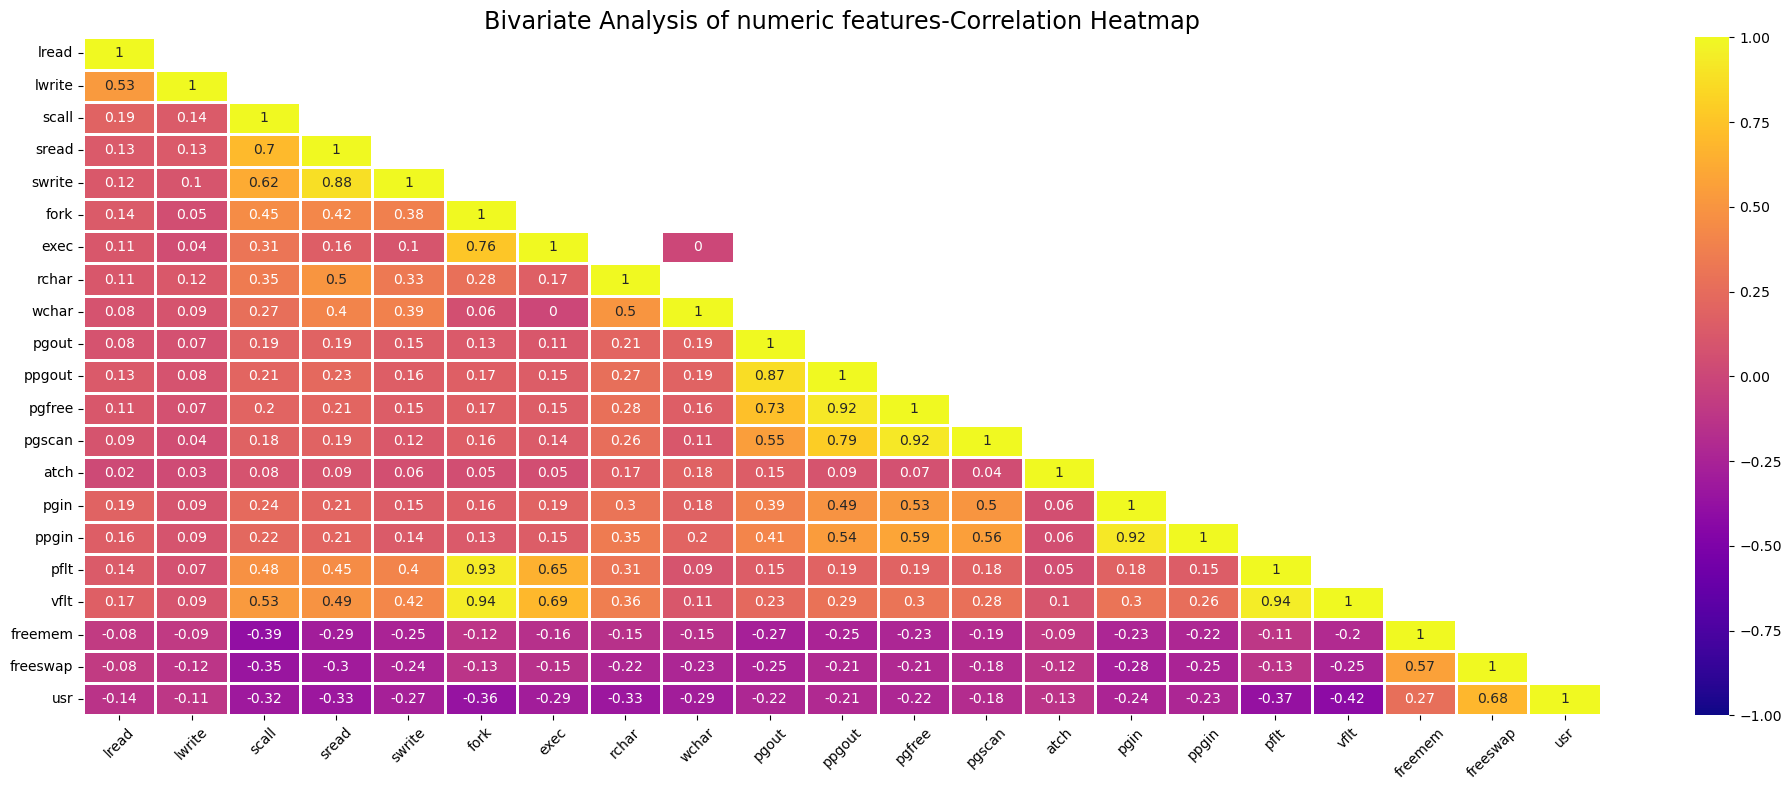

In [12]:
#plt.figure(figsize=(8,8))
plot_bivariate_numeric(df,num_cols,figsize=(20,8),kind='heatmap');

<Figure size 1500x1000 with 0 Axes>

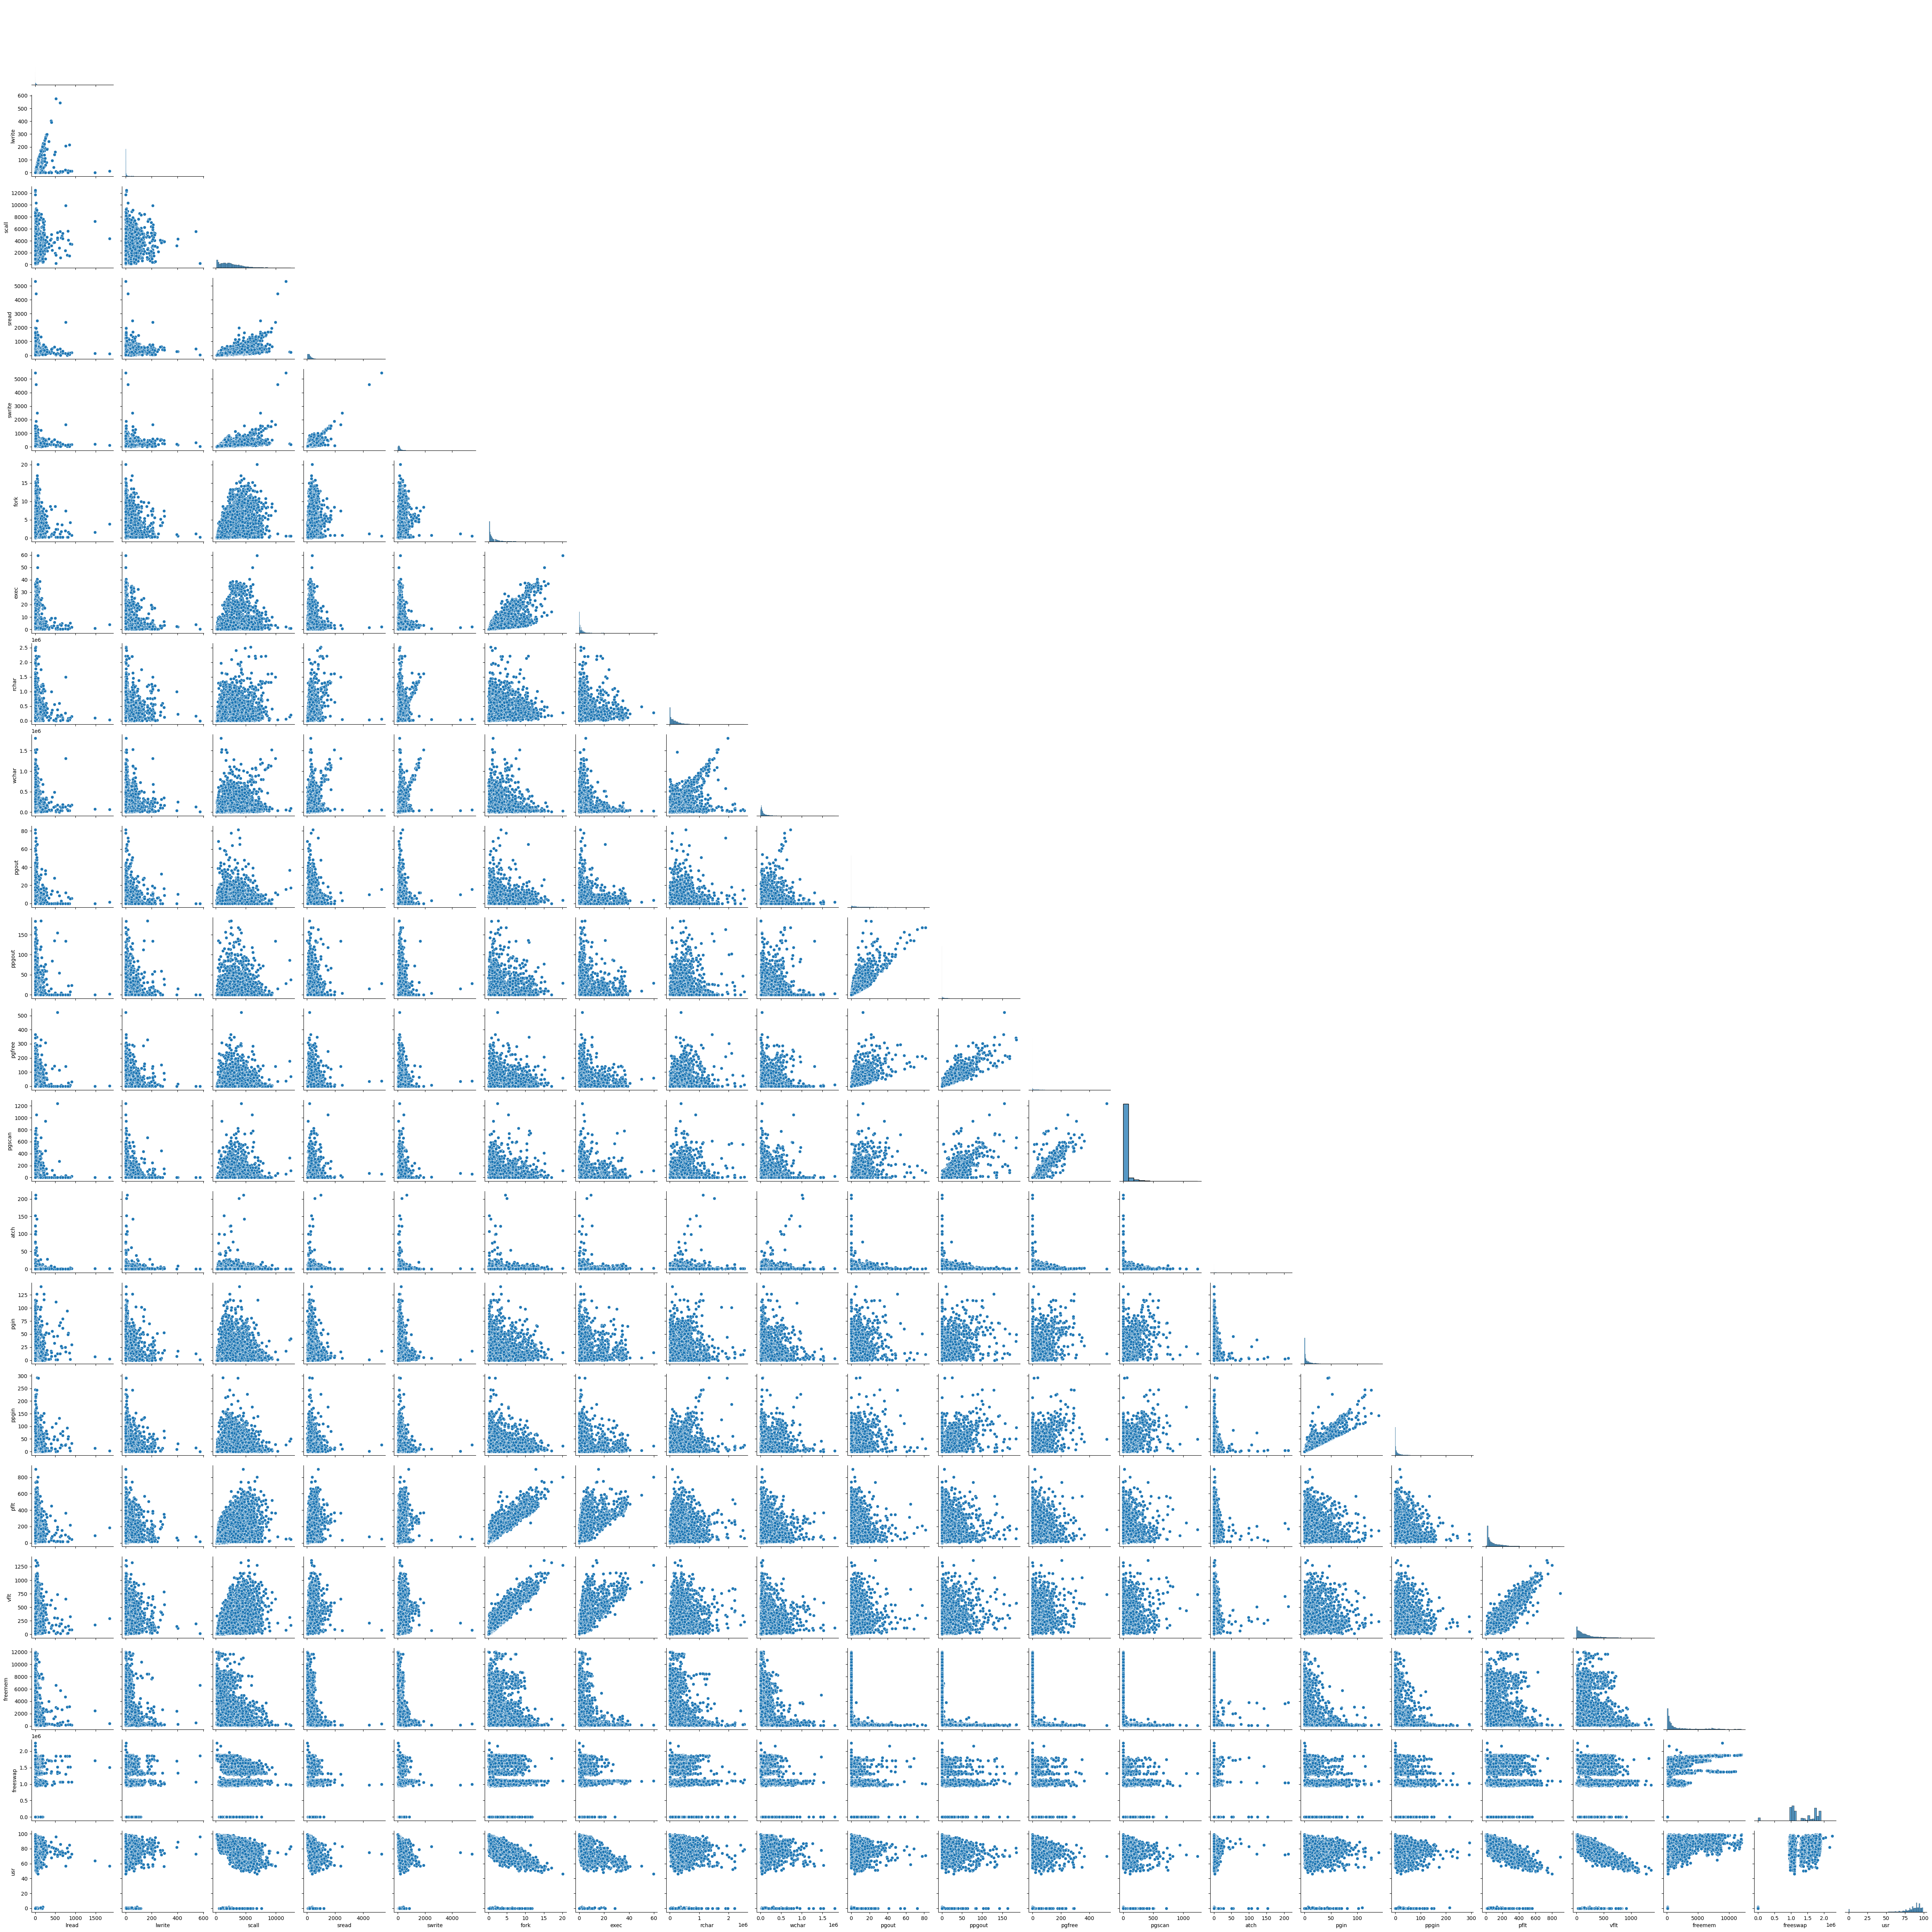

In [13]:
plt.figure(figsize=(15,10))
sns.pairplot(df,corner=True);



> It's observed that when system is CPU_BOUND, then it's not at all in User mode (or) user is 0. Meaning, if system isn't doing too many system level processing then only it enables user mode


> there's strong correlation between the following features

>> pgfree & pgscan ; 
>> pgin & ppgin ; 
>> pflt & vflt ; 
>> ppgout & pgfree ; 
>> fork & vflt ; 
>> fork & pflt ; 
>> sread & swrite ;




### Multivariate Analysis

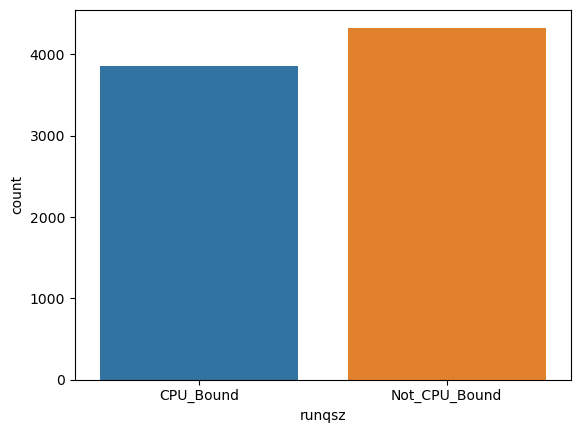

In [14]:
sns.countplot(x=df.runqsz);

> Number of CPU_Bound records are almost equal to Not_CPU_Bound records in the dataset

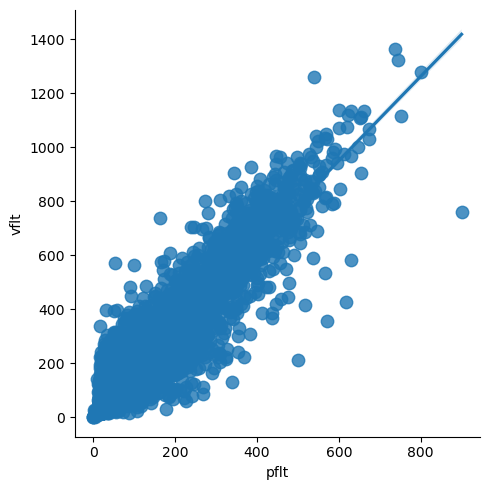

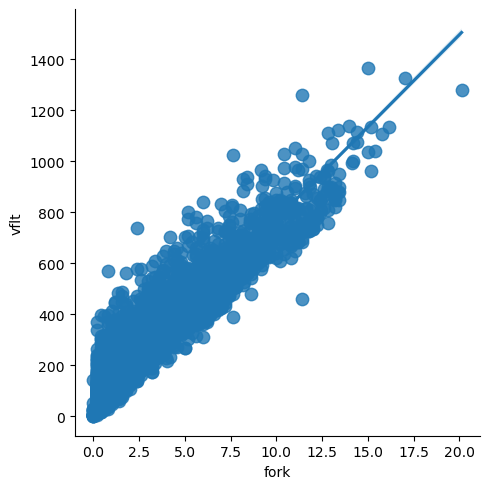

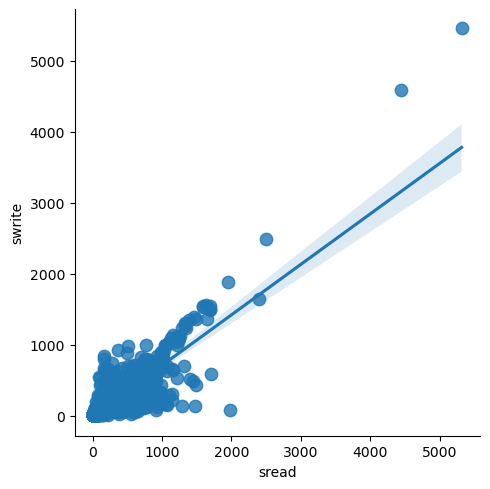

In [15]:
col1=['pflt','fork','sread']
col2=['vflt','vflt','swrite']
for i in range(0,len(col1)):
    sns.lmplot(x=col1[i],y=col2[i],data=df,scatter_kws={"s":80});

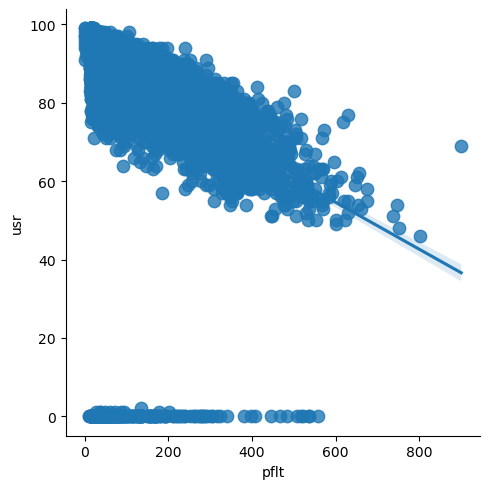

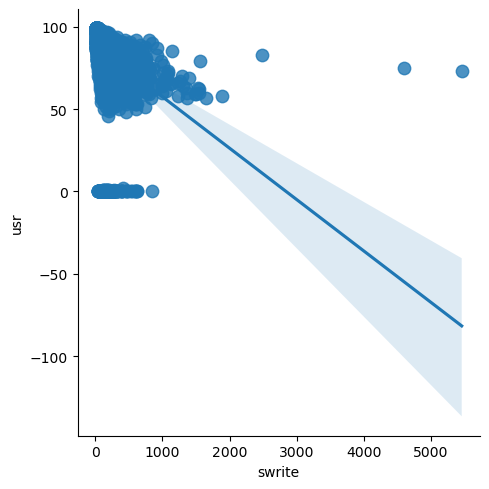

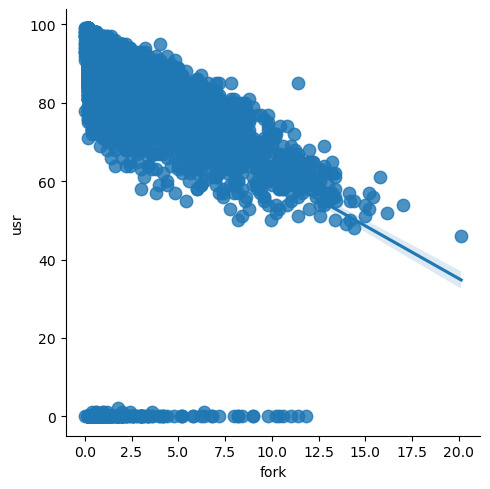

In [16]:
col1=['pflt','swrite','fork']
col2=['usr']
for i in range(0,len(col1)):
    sns.lmplot(x=col1[i],y=col2[0],data=df,scatter_kws={"s":80});

> **earlier we say the above independent features are correlated between them, the above lmplot shows their relationship with target variable**
> **this graphs shows slight relation with target variables**
>> **as pgfree, pflt, ppgout,fork,sread increases the linear line is dropping in target variable**

## 1.2 Impute null values if present, also check for the values which are equal to zero. Do they have any meaning or do we need to change them or drop them? Check for the possibility of creating new features if required. Also check for outliers and duplicates if there.

In [17]:
df.isnull().sum()

lread         0
lwrite        0
scall         0
sread         0
swrite        0
fork          0
exec          0
rchar       104
wchar        15
pgout         0
ppgout        0
pgfree        0
pgscan        0
atch          0
pgin          0
ppgin         0
pflt          0
vflt          0
runqsz        0
freemem       0
freeswap      0
usr           0
dtype: int64

> **rchar and wchar has some missing values , these can be treated using the median of respective variables**

In [18]:
df1=df.copy()

In [19]:
median_value_rchar = df1['rchar'].median()
df1['rchar'].fillna(value=median_value_rchar,inplace=True)
median_value_wchar = df1['wchar'].median()
df1['wchar'].fillna(value=median_value_wchar,inplace=True)

**check for missing values after imputing with median, which shows no missing values in any features**

In [20]:
df1.isnull().sum()

lread       0
lwrite      0
scall       0
sread       0
swrite      0
fork        0
exec        0
rchar       0
wchar       0
pgout       0
ppgout      0
pgfree      0
pgscan      0
atch        0
pgin        0
ppgin       0
pflt        0
vflt        0
runqsz      0
freemem     0
freeswap    0
usr         0
dtype: int64

### Number of zeros in each feature

In [21]:
col10=['lread', 'lwrite', 'scall', 'sread', 'swrite', 'fork', 'exec', 'rchar',
       'wchar', 'pgout', 'ppgout', 'pgfree', 'pgscan', 'atch', 'pgin', 'ppgin',
       'pflt', 'vflt', 'runqsz', 'freemem', 'freeswap']
for i in col10:
    zeros=(df1[i] == 0).sum()
    print(f"{i}:", zeros)

lread: 675
lwrite: 2684
scall: 0
sread: 0
swrite: 0
fork: 21
exec: 21
rchar: 0
wchar: 0
pgout: 4878
ppgout: 4878
pgfree: 4869
pgscan: 6448
atch: 4575
pgin: 1220
ppgin: 1220
pflt: 3
vflt: 0
runqsz: 0
freemem: 0
freeswap: 0


**there are several zero values in pgout, ppgout, pgfree, pgscan, atch, pgin, ppgin, lread, lwrite**
>> **these may be real values and cannot be made to dropped or imputed which will lead model to misbehave**

In [22]:
df1.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
8187    False
8188    False
8189    False
8190    False
8191    False
Length: 8192, dtype: bool

**there are no duplicates found in this dataset**

lread
Skew : 13.9


/var/folders/4h/cvpv3t2s76bfx6b0yfk1z__40000gn/T/ipykernel_87159/3065938588.py:7: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


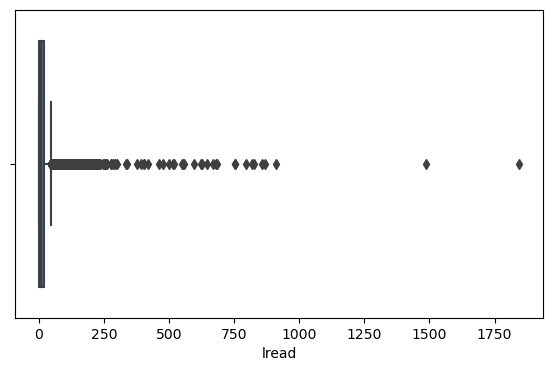

lwrite
Skew : 5.28


/var/folders/4h/cvpv3t2s76bfx6b0yfk1z__40000gn/T/ipykernel_87159/3065938588.py:7: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


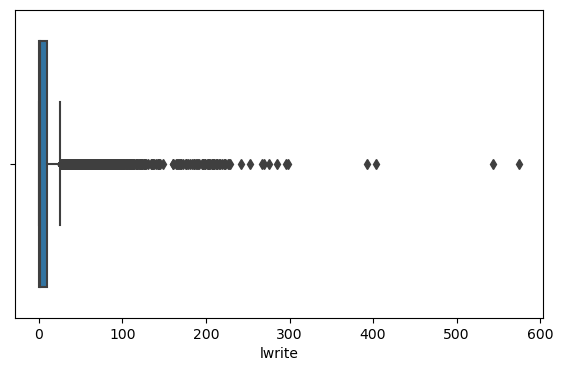

scall
Skew : 0.9


/var/folders/4h/cvpv3t2s76bfx6b0yfk1z__40000gn/T/ipykernel_87159/3065938588.py:7: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


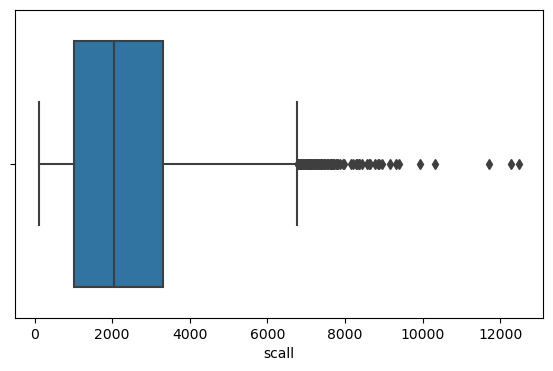

sread
Skew : 5.46


/var/folders/4h/cvpv3t2s76bfx6b0yfk1z__40000gn/T/ipykernel_87159/3065938588.py:7: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


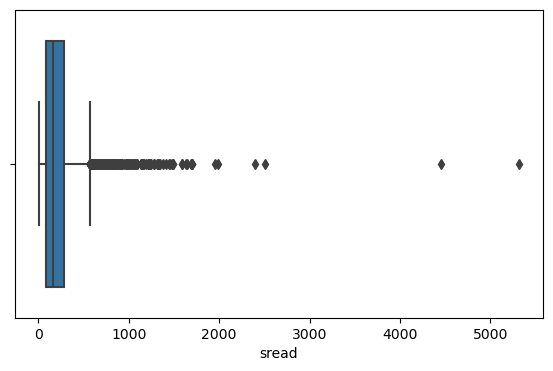

swrite
Skew : 9.61


/var/folders/4h/cvpv3t2s76bfx6b0yfk1z__40000gn/T/ipykernel_87159/3065938588.py:7: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


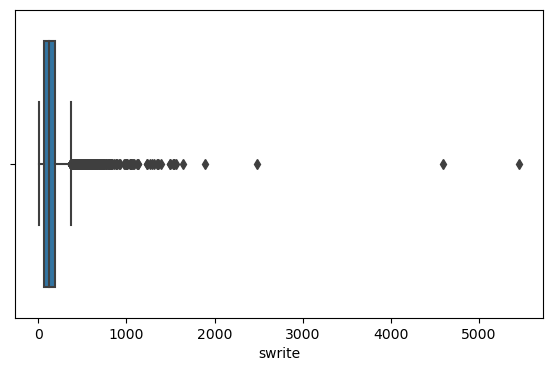

fork
Skew : 2.25


/var/folders/4h/cvpv3t2s76bfx6b0yfk1z__40000gn/T/ipykernel_87159/3065938588.py:7: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


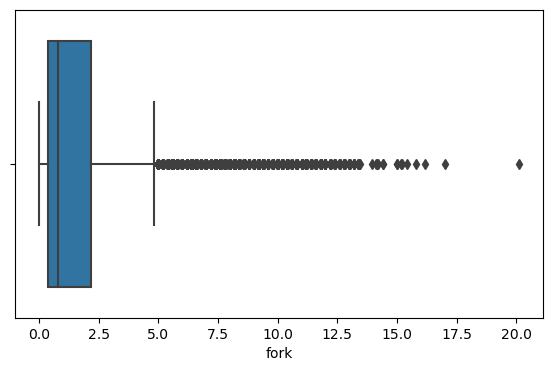

/var/folders/4h/cvpv3t2s76bfx6b0yfk1z__40000gn/T/ipykernel_87159/3065938588.py:7: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


exec
Skew : 4.07


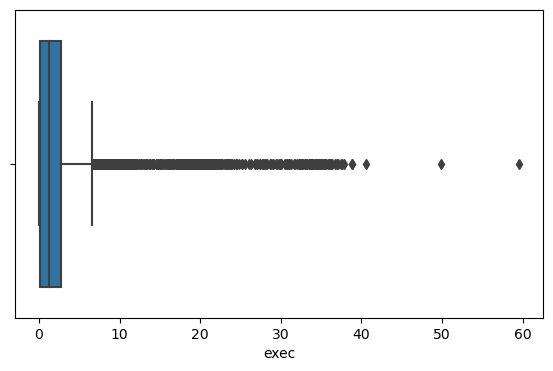

rchar
Skew : 2.85


/var/folders/4h/cvpv3t2s76bfx6b0yfk1z__40000gn/T/ipykernel_87159/3065938588.py:7: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


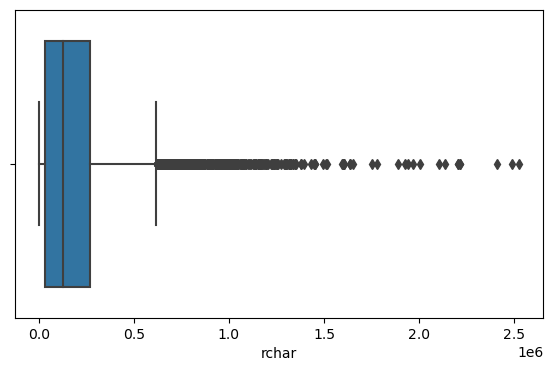

/var/folders/4h/cvpv3t2s76bfx6b0yfk1z__40000gn/T/ipykernel_87159/3065938588.py:7: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


wchar
Skew : 3.85


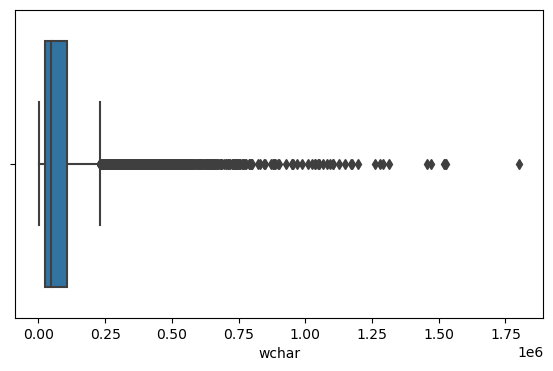

/var/folders/4h/cvpv3t2s76bfx6b0yfk1z__40000gn/T/ipykernel_87159/3065938588.py:7: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


pgout
Skew : 5.07


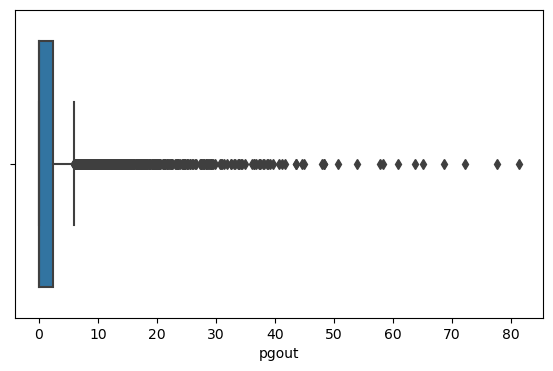

/var/folders/4h/cvpv3t2s76bfx6b0yfk1z__40000gn/T/ipykernel_87159/3065938588.py:7: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


ppgout
Skew : 4.68


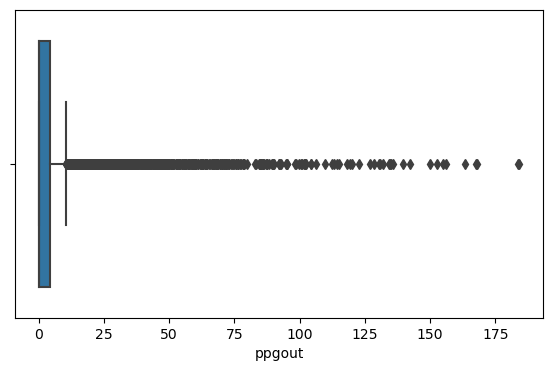

/var/folders/4h/cvpv3t2s76bfx6b0yfk1z__40000gn/T/ipykernel_87159/3065938588.py:7: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


pgfree
Skew : 4.77


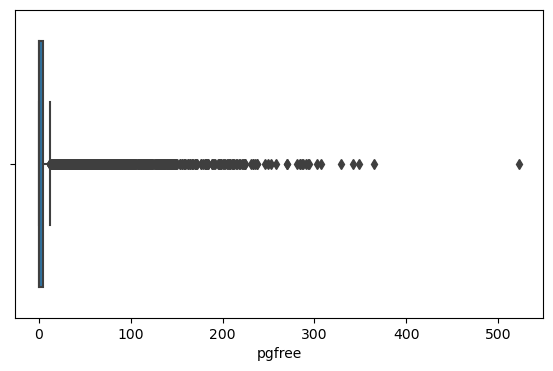

/var/folders/4h/cvpv3t2s76bfx6b0yfk1z__40000gn/T/ipykernel_87159/3065938588.py:7: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


pgscan
Skew : 5.81


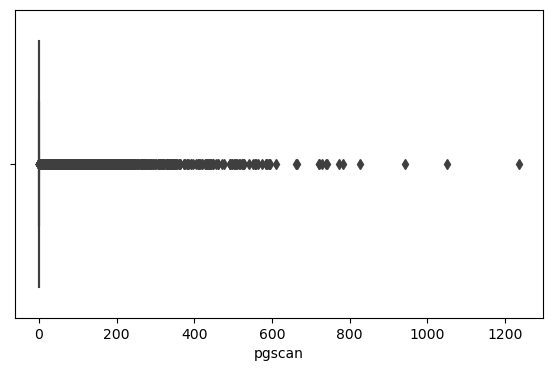

atch
Skew : 21.54


/var/folders/4h/cvpv3t2s76bfx6b0yfk1z__40000gn/T/ipykernel_87159/3065938588.py:7: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


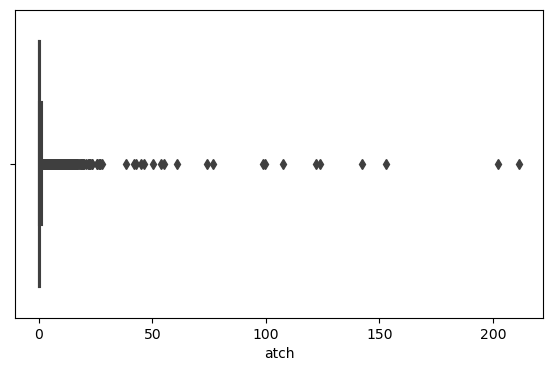

pgin
Skew : 3.24


/var/folders/4h/cvpv3t2s76bfx6b0yfk1z__40000gn/T/ipykernel_87159/3065938588.py:7: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


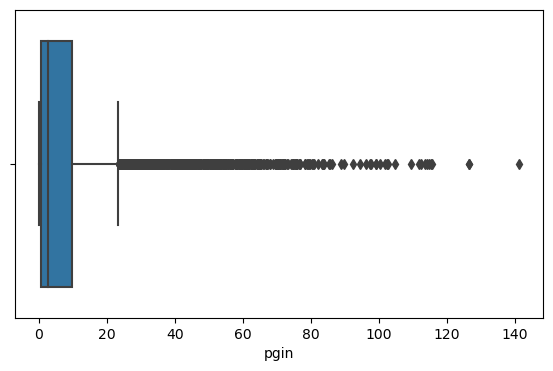

/var/folders/4h/cvpv3t2s76bfx6b0yfk1z__40000gn/T/ipykernel_87159/3065938588.py:7: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


ppgin
Skew : 3.9


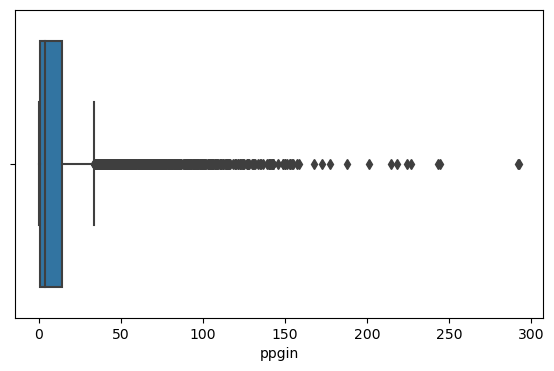

/var/folders/4h/cvpv3t2s76bfx6b0yfk1z__40000gn/T/ipykernel_87159/3065938588.py:7: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


pflt
Skew : 1.72


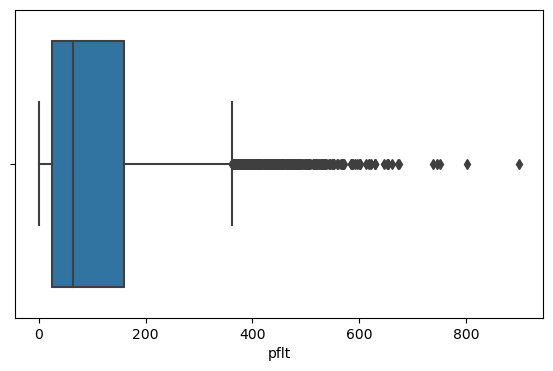

/var/folders/4h/cvpv3t2s76bfx6b0yfk1z__40000gn/T/ipykernel_87159/3065938588.py:7: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


vflt
Skew : 1.74


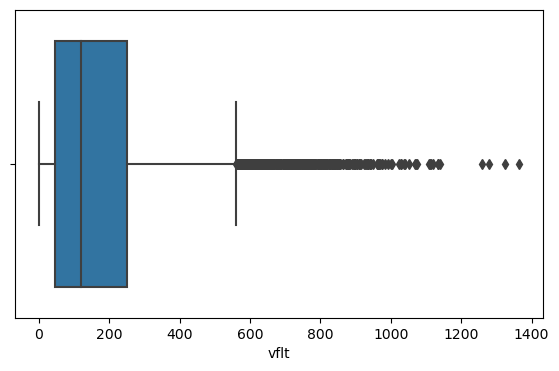

freemem
Skew : 1.81


/var/folders/4h/cvpv3t2s76bfx6b0yfk1z__40000gn/T/ipykernel_87159/3065938588.py:7: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


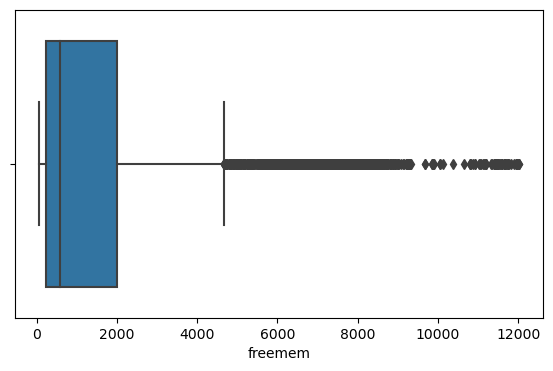

/var/folders/4h/cvpv3t2s76bfx6b0yfk1z__40000gn/T/ipykernel_87159/3065938588.py:7: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


freeswap
Skew : -0.79


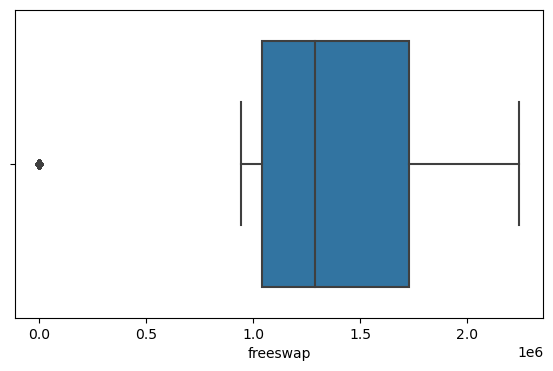

/var/folders/4h/cvpv3t2s76bfx6b0yfk1z__40000gn/T/ipykernel_87159/3065938588.py:7: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


usr
Skew : -3.42


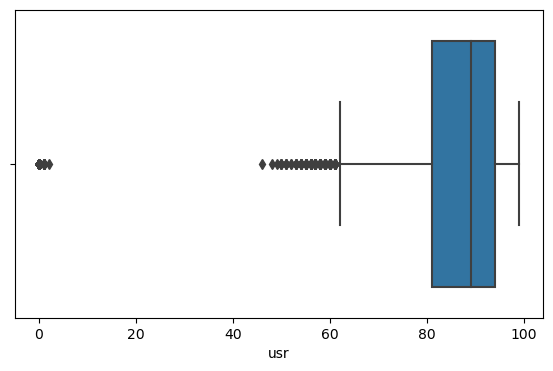

In [23]:
num_cols=[col for col in df.columns if df[col].dtype != 'O']
for col in num_cols:
    print(col)
    print('Skew :',round(df[col].skew(),2))
    plt.figure(figsize=(15,4))
    plt.ylabel('count')
    plt.subplot(1,2,1)
    sns.boxplot(x=df[col])
    plt.show()

## 1.3 Encode the data (having string values) for Modelling. Split the data into train and test (70:30). Apply Linear regression using scikit learn. Perform checks for significant variables using appropriate method from statsmodel. Create multiple models and check the performance of Predictions on Train and Test sets using Rsquare, RMSE & Adj Rsquare. Compare these models and select the best one with appropriate reasoning.

### Encoding of categorical data runqsz

In [24]:
df1['runqsz'].value_counts()

Not_CPU_Bound    4331
CPU_Bound        3861
Name: runqsz, dtype: int64

**this isn't an ordinal variable and hence general get_dummies method has been used to encode the feature as below**

In [25]:
df1_encoded=pd.get_dummies(df1, columns = ['runqsz'], drop_first=True)

In [26]:
df1_encoded.head()

lread  lwrite  scall  sread  swrite  fork  exec     rchar    wchar  pgout  \
0      1       0   2147     79      68   0.2   0.2   40671.0  53995.0    0.0   
1      0       0    170     18      21   0.2   0.2     448.0   8385.0    0.0   
2     15       3   2162    159     119   2.0   2.4  125473.5  31950.0    0.0   
3      0       0    160     12      16   0.2   0.2  125473.5   8670.0    0.0   
4      5       1    330     39      38   0.4   0.4  125473.5  12185.0    0.0   

   ...  pgscan  atch  pgin  ppgin    pflt    vflt  freemem  freeswap  usr  \
0  ...     0.0   0.0   1.6    2.6   16.00   26.40     4670   1730946   95   
1  ...     0.0   0.0   0.0    0.0   15.63   16.83     7278   1869002   97   
2  ...     0.0   1.2   6.0    9.4  150.20  220.20      702   1021237   87   
3  ...     0.0   0.0   0.2    0.2   15.60   16.80     7248   1863704   98   
4  ...     0.0   0.0   1.0    1.2   37.80   47.60      633   1760253   90   

   runqsz_Not_CPU_Bound  
0                     0  
1                     1  
2                     1  
3                     1  
4                     1  

[5 rows x 22 columns]

>> **no categorical variable present in the dataset now**

**Splitting of train and test with 70:30 ratio**

In [27]:
X=df1_encoded.drop(['usr'],axis=1)
y=df1_encoded['usr']

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=123)

In [29]:
print('X_train Shape:', X_train.shape)
print('X_test Shape:', X_test.shape)
print('y_train Shape:', y_train.shape)
print('y_test Shape:', y_test.shape)

X_train Shape: (5734, 21)
X_test Shape: (2458, 21)
y_train Shape: (5734,)
y_test Shape: (2458,)


In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [31]:
model1=LinearRegression()
model1.fit(X_train,y_train)

LinearRegression()

In [32]:
mse=mean_squared_error(y_train,model1.predict(X_train))
print('Mean Squared Error:', mse)
mse_test=mean_squared_error(y_test,model1.predict(X_test))
print('Mean Squared Error:', mse_test)
rmse=np.sqrt(mse)
print('Root Mean Squart Error:', rmse)
rmse_test=np.sqrt(mse_test)
print('Root Mean Squart Error:', rmse_test)
r2=r2_score(y_train,model1.predict(X_train))
print('R squared value:', r2)
r2_test=r2_score(y_test,model1.predict(X_test))
print('R squared value:', r2_test)
print('Intercept:', model1.intercept_)

Mean Squared Error: 126.13697916062159
Mean Squared Error: 112.8586695777462
Root Mean Squart Error: 11.23107203968622
Root Mean Squart Error: 10.623496108990967
R squared value: 0.6483203363848282
R squared value: 0.612618215639559
Intercept: 40.918712869156664


**The RMSE is very high without treating outlier and using all the independent features**

**Coefficient of individual independent variables:**

In [33]:
for col in range(0,len(X_train.columns)):
    print(f"Coefficient value of {X_train.columns[col]} : {model1.coef_[col]}")

Coefficient value of lread : -0.02009071357792124
Coefficient value of lwrite : 0.0075422313039693704
Coefficient value of scall : 0.0009483472967907227
Coefficient value of sread : 0.0007763978857161344
Coefficient value of swrite : -0.0013704851818098676
Coefficient value of fork : -1.9590279573316116
Coefficient value of exec : -0.007770744488823107
Coefficient value of rchar : -3.5802582008994527e-06
Coefficient value of wchar : -8.735521251724242e-06
Coefficient value of pgout : -0.19244487753739148
Coefficient value of ppgout : 0.14669358903434473
Coefficient value of pgfree : -0.10513105481401458
Coefficient value of pgscan : 0.016055540876145392
Coefficient value of atch : -0.05224972847753085
Coefficient value of pgin : 0.05778376574445124
Coefficient value of ppgin : -0.03808696673167958
Coefficient value of pflt : -0.039571944754030156
Coefficient value of vflt : 0.02247581722251831
Coefficient value of freemem : -0.0017717547370742833
Coefficient value of freeswap : 3.44969

#### Checking with treating outliers

In [34]:
Q1=df1_encoded.quantile(0.25)
Q3=df1_encoded.quantile(0.75)
IQR=Q3-Q1
lower_range=Q1-(1.5*IQR)
upper_range=Q3+(1.5*IQR)
print('Quantile of 25%')
print(Q1)
print('Quantile of 75%')
print(Q3)
print('Inter Quantile range')
print(IQR)
print('Lower Range:', lower_range)
print('Upper Range:', upper_range)

Quantile of 25%
lread                         2.00
lwrite                        0.00
scall                      1012.00
sread                        86.00
swrite                       63.00
fork                          0.40
exec                          0.20
rchar                     34860.50
wchar                     22977.75
pgout                         0.00
ppgout                        0.00
pgfree                        0.00
pgscan                        0.00
atch                          0.00
pgin                          0.60
ppgin                         0.60
pflt                         25.00
vflt                         45.40
freemem                     231.00
freeswap                1042623.50
usr                          81.00
runqsz_Not_CPU_Bound          0.00
Name: 0.25, dtype: float64
Quantile of 75%
lread                        20.000
lwrite                       10.000
scall                      3317.250
sread                       279.000
swrite                     

>> **there's no lower side outlier in almost all independent variable except freeswap. So we will not treat lower side outliers**

>> **pgscan feature is showing 0 for Upper range and hence we can't treat that feature as it will turn to be constant for the model**

>> **usr is a target variable and shows outlier at lower side, we can't treat them because they are valid**

In [35]:
def treat_outlier(x):
    q25=np.percentile(x,25)
    q75=np.percentile(x,75)
    IQR=q75-q25
    upper_bound=q75+(1.5*IQR)
    return x.apply(lambda y: q75 if y > q75 else y).apply(lambda y: q25 if y < q25 else y)

In [36]:
no_outlier = ['runqsz_Not_CPU_Bound','pgscan','usr','freeswap']
outlier_list = [x for x in df1_encoded.columns if x not in no_outlier]

In [37]:
df2=df1_encoded.copy()
for i in df1_encoded[outlier_list]:    
    df2[i]=treat_outlier(df1_encoded[i])

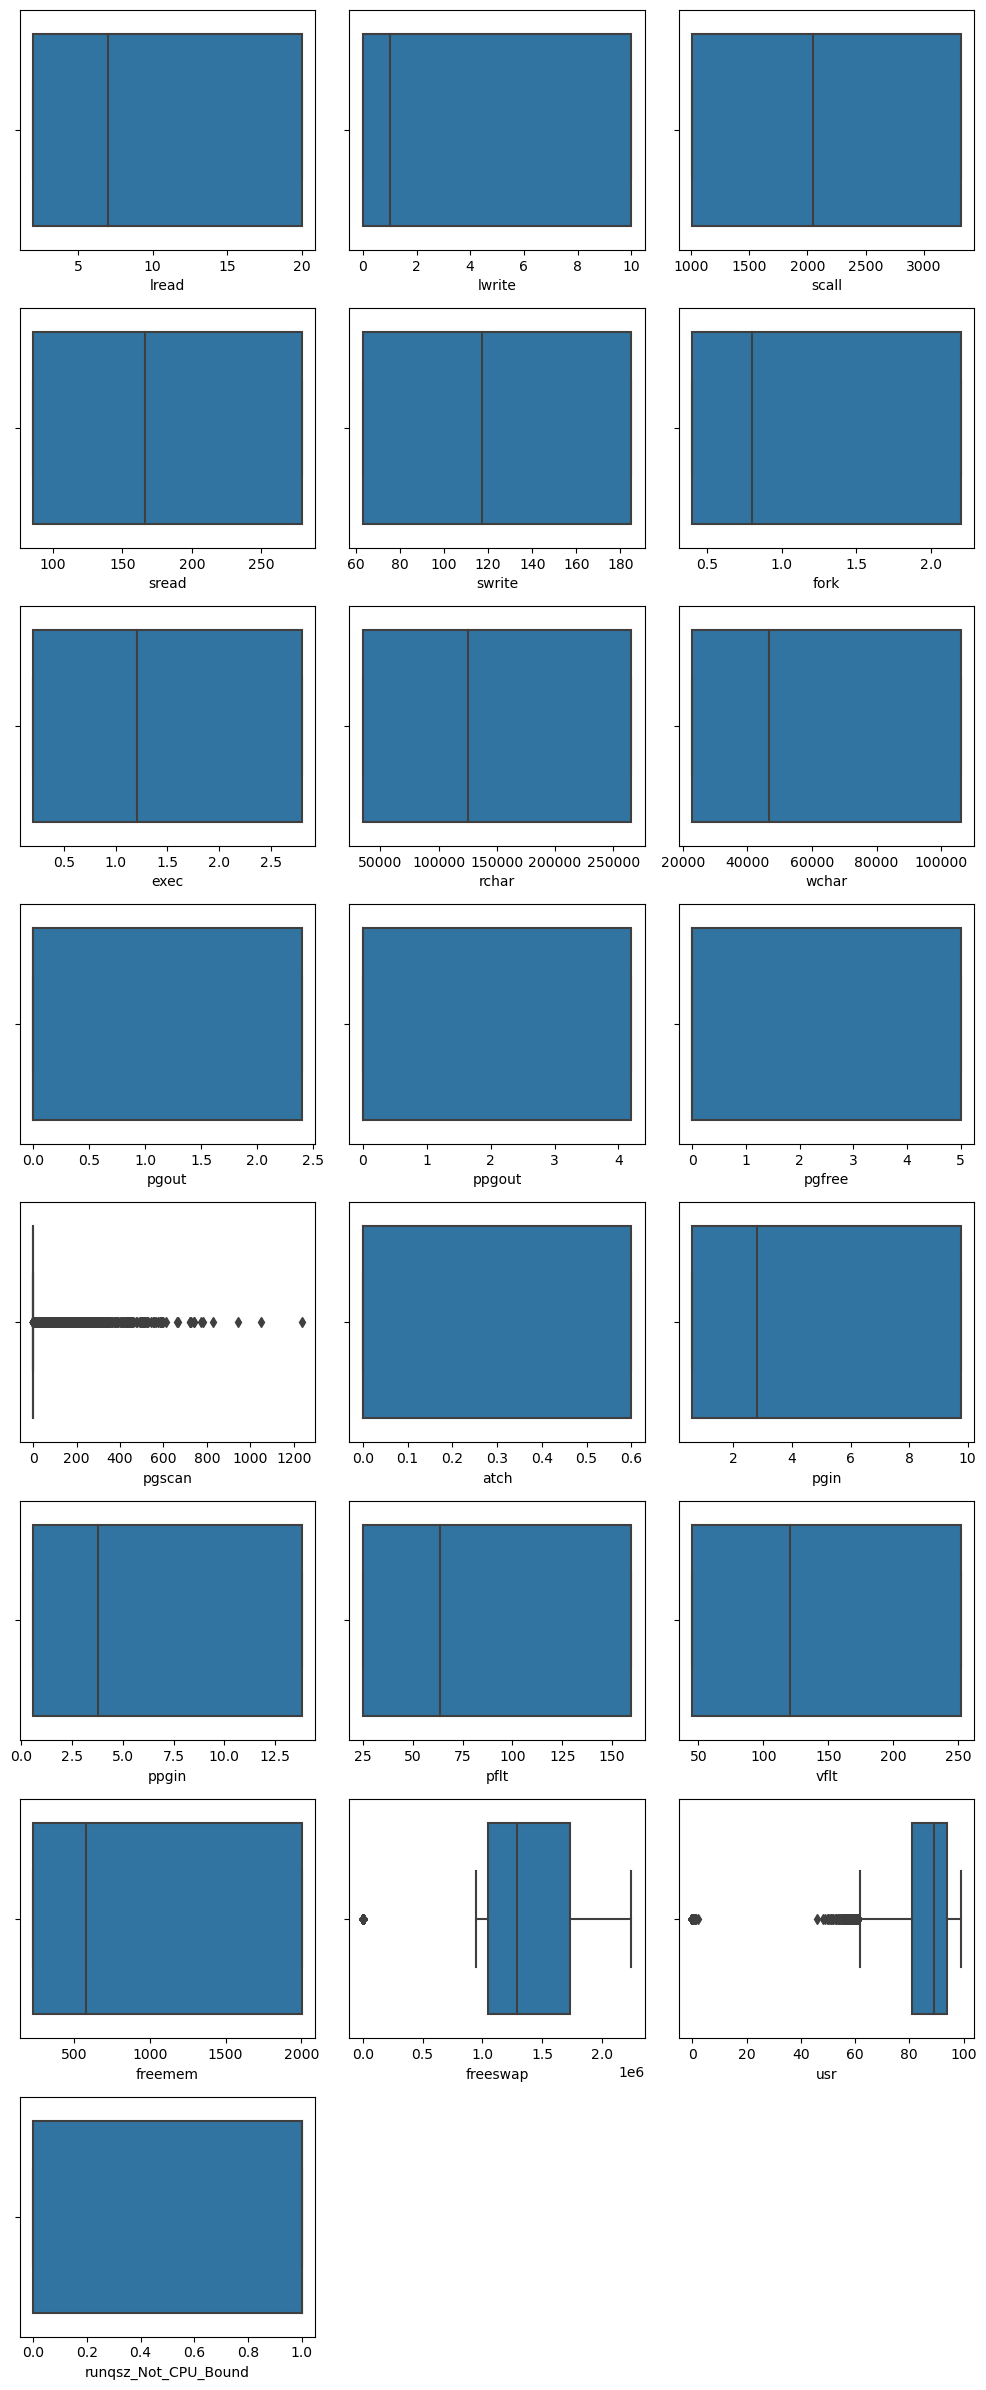

In [38]:
df2_num_cols=[col for col in df2.columns if df2[col].dtype != 'O']
plot_univariate_numeric(df2,df2_num_cols,kind='box')

**After treating outlier, except target variable, freeswap and pgscan shows proper box plot**

In [39]:
df_non_outlier=df2.copy()
X_n=df_non_outlier.drop('usr',axis=1)
y_n=df_non_outlier['usr']

In [40]:
X_train_n, X_test_n, y_train_n, y_test_n = train_test_split(X_n,y_n,test_size=0.3,random_state=123)

In [41]:
print('X_train_n Shape:', X_train_n.shape)
print('X_test_n Shape:', X_test_n.shape)
print('y_train_n Shape:', y_train_n.shape)
print('y_test_n Shape:', y_test_n.shape)

X_train_n Shape: (5734, 21)
X_test_n Shape: (2458, 21)
y_train_n Shape: (5734,)
y_test_n Shape: (2458,)


In [42]:
model1_n=LinearRegression()
model1_n.fit(X_train_n,y_train_n)

LinearRegression()

In [43]:
mse_n=mean_squared_error(y_train_n,model1_n.predict(X_train_n))
print('Mean Squared Error:', mse_n)
rmse_n=np.sqrt(mse_n)
print('Root Mean Squart Error:', rmse_n)
r2_n=r2_score(y_train_n,model1_n.predict(X_train_n))
print('R squared value:', r2_n)

Mean Squared Error: 143.17474689012846
Root Mean Squart Error: 11.965565046838718
R squared value: 0.6008177208652632


### after treating outliers, the model is not having any improvement to it's results. It has understood treating outlier has no significance here



**Determine the multicollinearity variables and remove them**

In [44]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data["feature"] = df1_encoded.columns

In [45]:
def calc_vif(X):
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return(vif)

In [46]:
VIF=df2.drop(['usr'],axis=1)
calc_vif(VIF)

variables        VIF
0                  lread  12.587054
1                 lwrite   6.978536
2                  scall  18.672574
3                  sread  35.815725
4                 swrite  36.192286
5                   fork  37.235323
6                   exec   8.893492
7                  rchar   6.602877
8                  wchar   6.116991
9                  pgout  36.135921
10                ppgout  77.841875
11                pgfree  44.857872
12                pgscan   1.513682
13                  atch   3.497628
14                  pgin  43.588876
15                 ppgin  41.812141
16                  pflt  35.155738
17                  vflt  32.258635
18               freemem   6.224685
19              freeswap  10.635221
20  runqsz_Not_CPU_Bound   2.169472

In [47]:
X_VIF1=df1_encoded.drop(['usr','fork'],axis=1)
y_VIF1=df1_encoded['usr']

In [48]:
X_train_VIF1, X_test_VIF1, y_train_VIF1, y_test_VIF1 = train_test_split(X_VIF1,y_VIF1,test_size=0.3,random_state=123)

In [49]:
print('X_train_VIF1 Shape:', X_train_VIF1.shape)
print('X_test_VIF1 Shape:', X_test_VIF1.shape)
print('y_train_VIF1 Shape:', y_train_VIF1.shape)
print('y_test_VIF1 Shape:', y_test_VIF1.shape)

X_train_VIF1 Shape: (5734, 20)
X_test_VIF1 Shape: (2458, 20)
y_train_VIF1 Shape: (5734,)
y_test_VIF1 Shape: (2458,)


In [50]:
model1_VIF1=LinearRegression()
model1_VIF1.fit(X_train_VIF1,y_train_VIF1)

LinearRegression()

In [51]:
mse_VIF1=mean_squared_error(y_train_VIF1,model1_VIF1.predict(X_train_VIF1))
print('Train Mean Squared Error:', mse_VIF1)
mse_test_VIF1=mean_squared_error(y_test_VIF1,model1_VIF1.predict(X_test_VIF1))
print('Test Mean Squared Error:', mse_test_VIF1)
rmse_VIF1=np.sqrt(mse_VIF1)
print('Train Root Mean Squart Error:', rmse_VIF1)
rmse_test_VIF1=np.sqrt(mse_test_VIF1)
print('Test Root Mean Squart Error:', rmse_test)
r2_VIF1=r2_score(y_train_VIF1,model1_VIF1.predict(X_train_VIF1))
print('Train R squared value:', r2_VIF1)
r2_test_VIF1=r2_score(y_test_VIF1,model1_VIF1.predict(X_test_VIF1))
print('Test R squared value:', r2_test_VIF1)
print('Intercept of VIF1:', model1_VIF1.intercept_)

Train Mean Squared Error: 127.37490141983605
Test Mean Squared Error: 114.06446671934879
Train Root Mean Squart Error: 11.286048972950457
Test Root Mean Squart Error: 10.623496108990967
Train R squared value: 0.6448689132843282
Test R squared value: 0.6084793767711019
Intercept of VIF1: 42.10822360725813


In [52]:
for col in range(0,len(X_train_VIF1.columns)):
    print(f"Coefficient value of {X_train_VIF1.columns[col]} : {model1_VIF1.coef_[col]}")

Coefficient value of lread : -0.021687820316722364
Coefficient value of lwrite : 0.011623451313569086
Coefficient value of scall : 0.0011624012622610527
Coefficient value of sread : 0.0014691143951141145
Coefficient value of swrite : -0.0059922256076654955
Coefficient value of exec : -0.23395680491991244
Coefficient value of rchar : -3.4347386019036724e-06
Coefficient value of wchar : -8.066527173296485e-06
Coefficient value of pgout : -0.20172744791470212
Coefficient value of ppgout : 0.1444297278594052
Coefficient value of pgfree : -0.09423364225901852
Coefficient value of pgscan : 0.015264926007451309
Coefficient value of atch : -0.03692944217458572
Coefficient value of pgin : 0.08541693633543976
Coefficient value of ppgin : -0.044597999040011146
Coefficient value of pflt : -0.05029407362358362
Coefficient value of vflt : 0.007883875767976313
Coefficient value of freemem : -0.0017885508390991537
Coefficient value of freeswap : 3.40031222265131e-05
Coefficient value of runqsz_Not_CPU

In [53]:
X_VIF2=df1_encoded.drop(['usr','fork','pflt'],axis=1)
y_VIF2=df1_encoded['usr']

In [54]:
X_train_VIF2, X_test_VIF2, y_train_VIF2, y_test_VIF2 = train_test_split(X_VIF2,y_VIF2,test_size=0.3,random_state=123)

In [55]:
print('X_train_VIF2 Shape:', X_train_VIF2.shape)
print('X_test_VIF2 Shape:', X_test_VIF2.shape)
print('y_train_VIF2 Shape:', y_train_VIF2.shape)
print('y_test_VIF2 Shape:', y_test_VIF2.shape)

X_train_VIF2 Shape: (5734, 19)
X_test_VIF2 Shape: (2458, 19)
y_train_VIF2 Shape: (5734,)
y_test_VIF2 Shape: (2458,)


In [56]:
model1_VIF2=LinearRegression()
model1_VIF2.fit(X_train_VIF2,y_train_VIF2)

LinearRegression()

In [57]:
mse_VIF2=mean_squared_error(y_train_VIF2,model1_VIF2.predict(X_train_VIF2))
print('Train Mean Squared Error:', mse_VIF2)
mse_test_VIF2=mean_squared_error(y_test_VIF2,model1_VIF2.predict(X_test_VIF2))
print('Test Mean Squared Error:', mse_test_VIF2)
rmse_VIF2=np.sqrt(mse_VIF2)
print('Train Root Mean Squart Error:', rmse_VIF2)
rmse_test_VIF2=np.sqrt(mse_test_VIF2)
print('Test Root Mean Squart Error:', rmse_test)
r2_VIF2=r2_score(y_train_VIF2,model1_VIF2.predict(X_train_VIF2))
print('Train R squared value:', r2_VIF2)
r2_test_VIF2=r2_score(y_test_VIF2,model1_VIF2.predict(X_test_VIF2))
print('Test R squared value:', r2_test_VIF2)
print('Intercept of VIF2:', model1_VIF2.intercept_)

Train Mean Squared Error: 130.72948731048433
Test Mean Squared Error: 118.02700080598649
Train Root Mean Squart Error: 11.433699633560623
Test Root Mean Squart Error: 10.623496108990967
Train R squared value: 0.6355160681040966
Test R squared value: 0.5948781751016693
Intercept of VIF2: 43.13248164033866


In [58]:
VIF=df1_encoded.drop(['usr','pflt','fork','swrite'],axis=1)
calc_vif(VIF)

variables        VIF
0                  lread   1.679627
1                 lwrite   1.677786
2                  scall   6.542673
3                  sread   5.540103
4                   exec   2.758300
5                  rchar   2.976028
6                  wchar   2.164264
7                  pgout   6.375343
8                 ppgout  16.916600
9                 pgfree  19.848065
10                pgscan   8.278321
11                  atch   1.112096
12                  pgin   9.879087
13                 ppgin  10.558269
14                  vflt   5.902038
15               freemem   2.434591
16              freeswap   5.391629
17  runqsz_Not_CPU_Bound   2.060793

In [59]:
X_VIF3=df1_encoded.drop(['usr','pflt','swrite','fork'],axis=1)
y_VIF3=df1_encoded['usr']

In [60]:
X_train_VIF3, X_test_VIF3, y_train_VIF3, y_test_VIF3 = train_test_split(X_VIF3,y_VIF3,test_size=0.3,random_state=123)

In [61]:
print('X_train_VIF3 Shape:', X_train_VIF3.shape)
print('X_test_VIF3 Shape:', X_test_VIF3.shape)
print('y_train_VIF3 Shape:', y_train_VIF3.shape)
print('y_test_VIF3 Shape:', y_test_VIF3.shape)

X_train_VIF3 Shape: (5734, 18)
X_test_VIF3 Shape: (2458, 18)
y_train_VIF3 Shape: (5734,)
y_test_VIF3 Shape: (2458,)


In [62]:
model1_VIF3=LinearRegression()
model1_VIF3.fit(X_train_VIF3,y_train_VIF3)

LinearRegression()

In [63]:
mse_VIF3=mean_squared_error(y_train_VIF3,model1_VIF3.predict(X_train_VIF3))
print('Train Mean Squared Error:', mse_VIF3)
mse_test_VIF3=mean_squared_error(y_test_VIF3,model1_VIF3.predict(X_test_VIF3))
print('Test Mean Squared Error:', mse_test_VIF3)
rmse_VIF3=np.sqrt(mse_VIF3)
print('Train Root Mean Squart Error:', rmse_VIF3)
rmse_test_VIF3=np.sqrt(mse_test_VIF3)
print('Test Root Mean Squart Error:', rmse_test)
r2_VIF3=r2_score(y_train_VIF3,model1_VIF3.predict(X_train_VIF3))
print('Train R squared value:', r2_VIF3)
r2_test_VIF3=r2_score(y_test_VIF3,model1_VIF3.predict(X_test_VIF3))
print('Test R squared value:', r2_test_VIF3)
print('Intercept of VIF3:', model1_VIF3.intercept_)

Train Mean Squared Error: 130.9577666997083
Test Mean Squared Error: 117.94279159908638
Train Root Mean Squart Error: 11.443678023245337
Test Root Mean Squart Error: 10.623496108990967
Train R squared value: 0.6348796074932053
Test R squared value: 0.5951672190267003
Intercept of VIF3: 43.19957891395008


In [64]:
VIF=df1_encoded.drop(['usr','vflt','pgfree','fork','sread'],axis=1)
calc_vif(VIF)

variables        VIF
0                  lread   1.678328
1                 lwrite   1.677209
2                  scall   5.682464
3                 swrite   3.687953
4                   exec   2.439040
5                  rchar   2.763010
6                  wchar   2.249452
7                  pgout   6.361242
8                 ppgout  11.159306
9                 pgscan   3.773713
10                  atch   1.109949
11                  pgin   9.716407
12                 ppgin  10.467939
13                  pflt   4.513191
14               freemem   2.449598
15              freeswap   5.396350
16  runqsz_Not_CPU_Bound   2.061419

In [65]:
X_VIF5=df1_encoded.drop(['usr','vflt','pgfree','fork','sread','ppgout'],axis=1)
y_VIF5=df1_encoded['usr']
X_train_VIF5, X_test_VIF5, y_train_VIF5, y_test_VIF5 = train_test_split(X_VIF5,y_VIF5,test_size=30,random_state=123)
model1_VIF5=LinearRegression()
model1_VIF5.fit(X_train_VIF5,y_train_VIF5)

LinearRegression()

In [66]:
mse_VIF5=mean_squared_error(y_train_VIF5,model1_VIF5.predict(X_train_VIF5))
print('Train Mean Squared Error:', mse_VIF5)
mse_test_VIF5=mean_squared_error(y_test_VIF5,model1_VIF5.predict(X_test_VIF5))
print('Test Mean Squared Error:', mse_test_VIF5)
rmse_VIF5=np.sqrt(mse_VIF5)
print('Train Root Mean Squart Error:', rmse_VIF5)
rmse_test_VIF5=np.sqrt(mse_test_VIF5)
print('Test Root Mean Squart Error:', rmse_test)
r2_VIF5=r2_score(y_train_VIF5,model1_VIF5.predict(X_train_VIF5))
print('Train R squared value:', r2_VIF5)
r2_test_VIF5=r2_score(y_test_VIF5,model1_VIF5.predict(X_test_VIF5))
print('Test R squared value:', r2_test_VIF5)

Train Mean Squared Error: 123.80798008669262
Test Mean Squared Error: 83.59665251406194
Train Root Mean Squart Error: 11.126903436567275
Test Root Mean Squart Error: 10.623496108990967
Train R squared value: 0.6344333402930423
Test R squared value: 0.7348765870066856


In [67]:
VIF=df1_encoded.drop(['usr','vflt','pgfree','fork','sread','ppgout'],axis=1)
calc_vif(VIF)

variables        VIF
0                  lread   1.661115
1                 lwrite   1.676723
2                  scall   5.667465
3                 swrite   3.686375
4                   exec   2.435238
5                  rchar   2.761920
6                  wchar   2.248652
7                  pgout   1.867759
8                 pgscan   2.012051
9                   atch   1.105231
10                  pgin   9.696776
11                 ppgin  10.393640
12                  pflt   4.512725
13               freemem   2.449218
14              freeswap   5.396042
15  runqsz_Not_CPU_Bound   2.058736

In [68]:
X_VIF6=df1_encoded.drop(['usr','vflt','pgfree','fork','sread','ppgout','ppgin'],axis=1)
y_VIF6=df1_encoded['usr']
X_train_VIF6, X_test_VIF6, y_train_VIF6, y_test_VIF6 = train_test_split(X_VIF6,y_VIF6,test_size=30,random_state=123)
model1_VIF6=LinearRegression()
model1_VIF6.fit(X_train_VIF6,y_train_VIF6)

LinearRegression()

In [69]:
mse_VIF6=mean_squared_error(y_train_VIF6,model1_VIF6.predict(X_train_VIF6))
print('Train Mean Squared Error:', mse_VIF6)
mse_test_VIF6=mean_squared_error(y_test_VIF6,model1_VIF6.predict(X_test_VIF6))
print('Test Mean Squared Error:', mse_test_VIF6)
rmse_VIF6=np.sqrt(mse_VIF6)
print('Train Root Mean Squart Error:', rmse_VIF6)
rmse_test_VIF6=np.sqrt(mse_test_VIF6)
print('Test Root Mean Squart Error:', rmse_test)
r2_VIF6=r2_score(y_train_VIF6,model1_VIF6.predict(X_train_VIF6))
print('Train R squared value:', r2_VIF6)
r2_test_VIF6=r2_score(y_test_VIF6,model1_VIF6.predict(X_test_VIF6))
print('Test R squared value:', r2_test_VIF6)

Train Mean Squared Error: 123.96797945202329
Test Mean Squared Error: 86.58436368190021
Train Root Mean Squart Error: 11.134090867781854
Test Root Mean Squart Error: 10.623496108990967
Train R squared value: 0.6339609116701199
Test R squared value: 0.7254011814966111


In [70]:
VIF=df1_encoded.drop(['usr','vflt','pgfree','fork','sread','ppgout','ppgin'],axis=1)
calc_vif(VIF)

variables       VIF
0                  lread  1.658552
1                 lwrite  1.675655
2                  scall  5.657951
3                 swrite  3.686308
4                   exec  2.433239
5                  rchar  2.689540
6                  wchar  2.248397
7                  pgout  1.866542
8                 pgscan  1.863714
9                   atch  1.104763
10                  pgin  1.987179
11                  pflt  4.499840
12               freemem  2.449101
13              freeswap  5.395448
14  runqsz_Not_CPU_Bound  2.058729

In [71]:
for col in range(0,len(X_train_VIF6.columns)):
    print(f"Coefficient value of {X_train_VIF6.columns[col]} : {model1_VIF6.coef_[col]}")

Coefficient value of lread : -0.020524021501199908
Coefficient value of lwrite : 0.01087580054240727
Coefficient value of scall : 0.0012641647878240134
Coefficient value of swrite : -0.0033236028244022706
Coefficient value of exec : -0.1850810606069124
Coefficient value of rchar : -3.5239126327220663e-06
Coefficient value of wchar : -1.0857317927276053e-05
Coefficient value of pgout : -0.1372327519903378
Coefficient value of pgscan : -0.0025409123262880545
Coefficient value of atch : -0.016760304465603216
Coefficient value of pgin : 0.026267671122334257
Coefficient value of pflt : -0.040355918762550916
Coefficient value of freemem : -0.0016586223469291677
Coefficient value of freeswap : 3.254442718669988e-05
Coefficient value of runqsz_Not_CPU_Bound : 7.9315139101880625


In [72]:
model1.intercept_

40.918712869156664

In [73]:
import statsmodels.api as sm

In [74]:
X_train=sm.add_constant(X_train)

In [75]:
result=sm.OLS(y_train,X_train).fit()

In [76]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                    usr   R-squared:                       0.648
Model:                            OLS   Adj. R-squared:                  0.647
Method:                 Least Squares   F-statistic:                     501.4
Date:                Sun, 08 Sep 2024   Prob (F-statistic):               0.00
Time:                        10:43:46   Log-Likelihood:                -22005.
No. Observations:                5734   AIC:                         4.405e+04
Df Residuals:                    5712   BIC:                         4.420e+04
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   40.9187 

In [77]:
X_train_VIF3=sm.add_constant(X_train_VIF3)

In [78]:
result_VIF3=sm.OLS(y_train_VIF3,X_train_VIF3).fit()

In [79]:
print(result_VIF3.summary())

                            OLS Regression Results                            
Dep. Variable:                    usr   R-squared:                       0.635
Model:                            OLS   Adj. R-squared:                  0.634
Method:                 Least Squares   F-statistic:                     552.1
Date:                Sun, 08 Sep 2024   Prob (F-statistic):               0.00
Time:                        10:43:46   Log-Likelihood:                -22112.
No. Observations:                5734   AIC:                         4.426e+04
Df Residuals:                    5715   BIC:                         4.439e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   43.1996 

In [80]:
from sklearn import tree
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=123)

In [81]:
dtr = tree.DecisionTreeRegressor(random_state=123)
regression_model = LinearRegression()


models=[regression_model,dtr]

rmse_train=[]
rmse_test=[]
scores_train=[]
scores_test=[]

for i in models:  # Computation of RMSE and R2 values 
    i.fit(X_train,y_train)
    scores_train.append(i.score(X_train, y_train))
    scores_test.append(i.score(X_test, y_test))
    rmse_train.append(np.sqrt(mean_squared_error(y_train,i.predict(X_train))))
    rmse_test.append(np.sqrt(mean_squared_error(y_test,i.predict(X_test))))
        
print(pd.DataFrame({'Train RMSE': rmse_train,'Test RMSE': rmse_test,'Training Score':scores_train,'Test Score': scores_test},
            index=['Linear Regression','Decision Tree Regressor']))


                         Train RMSE  Test RMSE  Training Score  Test Score
Linear Regression         11.231072  10.623496         0.64832    0.612618
Decision Tree Regressor    0.000000   3.472020         1.00000    0.958622


In [82]:
param_grid={'max_depth':[5,10,15,20],
           'min_samples_leaf': [3,15,30],
           'min_samples_split': [15,30,35,40],}
dtr=tree.DecisionTreeRegressor(random_state=123)
grid_search=GridSearchCV(estimator=dtr,param_grid=param_grid,cv=3)
grid_search.fit(X_train,y_train)
print(grid_search.best_params_)

{'max_depth': 10, 'min_samples_leaf': 15, 'min_samples_split': 15}


In [83]:
dtr = tree.DecisionTreeRegressor(max_depth=10,min_samples_leaf=15,min_samples_split=35,random_state=123)
regression_model = LinearRegression()


models=[regression_model,dtr]

rmse_train=[]
rmse_test=[]
scores_train=[]
scores_test=[]

for i in models:  # Computation of RMSE and R2 values 
    i.fit(X_train,y_train)
    scores_train.append(i.score(X_train, y_train))
    scores_test.append(i.score(X_test, y_test))
    rmse_train.append(np.sqrt(mean_squared_error(y_train,i.predict(X_train))))
    rmse_test.append(np.sqrt(mean_squared_error(y_test,i.predict(X_test))))
        
print(pd.DataFrame({'Train RMSE': rmse_train,'Test RMSE': rmse_test,'Training Score':scores_train,'Test Score': scores_test},
            index=['Linear Regression','Decision Tree Regressor']))


                         Train RMSE  Test RMSE  Training Score  Test Score
Linear Regression         11.231072  10.623496        0.648320    0.612618
Decision Tree Regressor    2.495466   3.106687        0.982638    0.966872


## 1.4 Inference: Basis on these predictions, what are the business insights and recommendations.

## Among the Linear Regression, OLS and Decision Tree. I choose Decision tree with best parameters because the RMSE is very low and the score is high compared to linear regression

##### Steps followed
> **Information of DataFrame shows one object datatype (runqsz) and other dtypes are integer / float. This explains that runqsz needs encoding before feeding to the model**

> **EDA shows that there are outliers in almost all the features, usr and freeswap has outliers are lower range and all other has outlier at higher range.** 

> **Data is skewed and doesn't had normal distribution.** 

> **It shows when system is CPU_BOUND then it's not in user mode, which is obvious as per data dictionary**

> **Correlation is found between few of the variables like swrite, fork, pflt greater than 90%.**

> **Also, swrite, fork, pflt when they increase the user mode is decreasing**

> **Imputed the missing values in rchar, wchar using the median of respective features**

> **Calculated the count of zero values within each feature, there are feature like pgscan, pgout, ppgout, atch, pgfree had too many zeros. But no negative values.** 

> **Encoded the runqsz categorical / object feature using pd.get_dummies and changed them into a numeric format to fit into linear regression model** 

> **Splitted the data into train and test with 70:30 as ratio and then fitted into Linear Regression model** 

> **Observed that the RMSE is very high and R square shows average score. Intercept value shows 42.79 and displayed the coefficient values of each feature to find the significant variable.**

> **sread, fork, rchar, wchar, freeswap and runqsz shows high coefficient values, any variance in these variables will influence the system to be in user mode.** 


> **calculated VIF and dropped the multicolinearity variables and fitted to the model multiple times. It represented that reducing of variables still able to produce same level of predictions. But I didn't dropped the features while finally comparing between different models** 

> ** Using all feature the linear regression formula derived is ==(40.9187128691566)+(-0.0200907135779212)*lread+(0.00754223130396937)*lwrite+(0.000948347296790722)*scall+(0.000776397885716134)*sread+(-0.00137048518180986)*swrite+(-1.95902795733161)*fork+(-0.0077707444888231)*exec+(-3.58025820089945E-06)*rchar+(-8.73552125172424E-06)*wchar+(-0.192444877537391)*pgout+(0.146693589034344)*ppgout+(-0.105131054814014)*pgfree+(0.0160555408761453)*pgscan+(-0.0522497284775308)*atch+(0.0577837657444512)*pgin+(-0.0380869667316795)*ppgin+(-0.0395719447540301)*pflt+(0.0224758172225183)*vflt+(-0.00177175473707428)*freemem+(0.0000344969262002755)*freeswap+(8.25313251325517)*runqsz**

> **Using above formula, we can only find 69% variance for new observations**

> **Using Stats Model, fitted the features and extracted the summary of Stats model. It shown almost the same result that of linear regression output.** 

> **Used Decision Tree regressor and fitted the observations which shown that the model isn't fitting too good.** 

> **Using GridSearchCV, tunned to derive best parameters to prune the tress that given recommendation as {'max_depth': 10, 'min_samples_leaf': 15, 'min_samples_split': 35}**

> **Using the recommended parameter, reran the decision tree. It given good result compared to linear regression and OLS models.** 


## Problem 2

## 2.1 Data Ingestion: Read the dataset. Do the descriptive statistics and do null value condition check, check for duplicates and outliers and write an inference on it. Perform Univariate and Bivariate Analysis and Multivariate Analysis.

In [84]:
fem_df=pd.read_excel('/Users/aravindakshan/Downloads/Contraceptive_method_dataset.xlsx')

In [85]:
fem_df.shape

(1473, 10)

In [86]:
fem_df.head()

Wife_age Wife_ education Husband_education  No_of_children_born  \
0      24.0         Primary         Secondary                  3.0   
1      45.0      Uneducated         Secondary                 10.0   
2      43.0         Primary         Secondary                  7.0   
3      42.0       Secondary           Primary                  9.0   
4      36.0       Secondary         Secondary                  8.0   

  Wife_religion Wife_Working  Husband_Occupation Standard_of_living_index  \
0   Scientology           No                   2                     High   
1   Scientology           No                   3                Very High   
2   Scientology           No                   3                Very High   
3   Scientology           No                   3                     High   
4   Scientology           No                   3                      Low   

  Media_exposure  Contraceptive_method_used  
0         Exposed                        No  
1         Exposed                        No  
2         Exposed                        No  
3         Exposed                        No  
4         Exposed                        No

In [87]:
fem_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1473 entries, 0 to 1472
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Wife_age                   1402 non-null   float64
 1   Wife_ education            1473 non-null   object 
 2   Husband_education          1473 non-null   object 
 3   No_of_children_born        1452 non-null   float64
 4   Wife_religion              1473 non-null   object 
 5   Wife_Working               1473 non-null   object 
 6   Husband_Occupation         1473 non-null   int64  
 7   Standard_of_living_index   1473 non-null   object 
 8   Media_exposure             1473 non-null   object 
 9   Contraceptive_method_used  1473 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 115.2+ KB


**Wife_age and no_of_children_bron has missing values**

In [88]:
fem_df.describe().T

count       mean       std   min   25%   50%   75%   max
Wife_age             1402.0  32.606277  8.274927  16.0  26.0  32.0  39.0  49.0
No_of_children_born  1452.0   3.254132  2.365212   0.0   1.0   3.0   4.0  16.0
Husband_Occupation   1473.0   2.137814  0.864857   1.0   1.0   2.0   3.0   4.0

In [89]:
fem_df.isnull().sum()

Wife_age                     71
Wife_ education               0
Husband_education             0
No_of_children_born          21
Wife_religion                 0
Wife_Working                  0
Husband_Occupation            0
Standard_of_living_index      0
Media_exposure                0
Contraceptive_method_used     0
dtype: int64

**there are 71 nulls in wife_age and 21 nulls in no_of_children_born**

**as they are continuous variable we can use median method to impute wife_age but no_of_childern_born has to be imputed using mode strategy**

In [90]:
fem_df.duplicated().sum()

80

**there are 80 duplicate records in this dataset, we can remove these duplicates**

In [91]:
fem_df.drop_duplicates(inplace=True)

No of duplicates after removal of duplicate entires:

In [92]:
fem_df.duplicated().sum()

0

#### Univariate Analysis

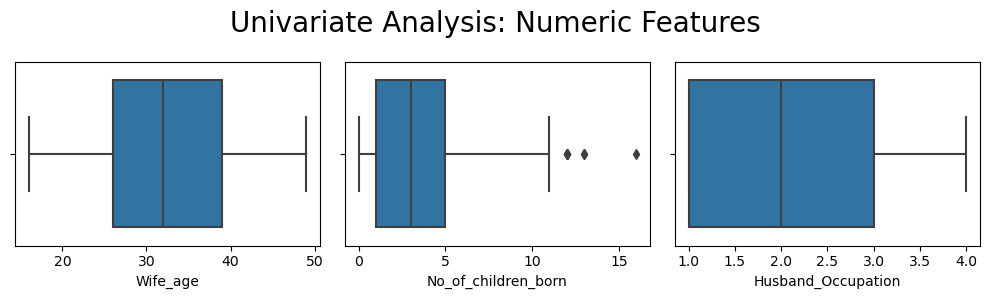

In [93]:
num_cols=[col for col in fem_df.columns if fem_df[col].dtype != 'O']
from vizad.univariate import plot_univariate_numeric
plot_univariate_numeric(fem_df,num_cols,kind='box')

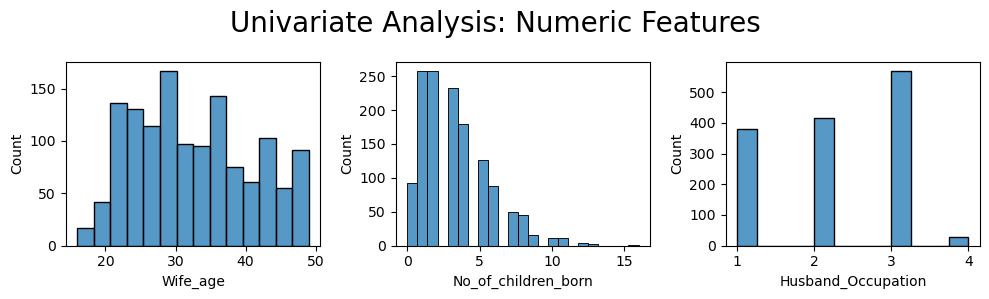

In [94]:
plot_univariate_numeric(fem_df,num_cols,kind='hist')

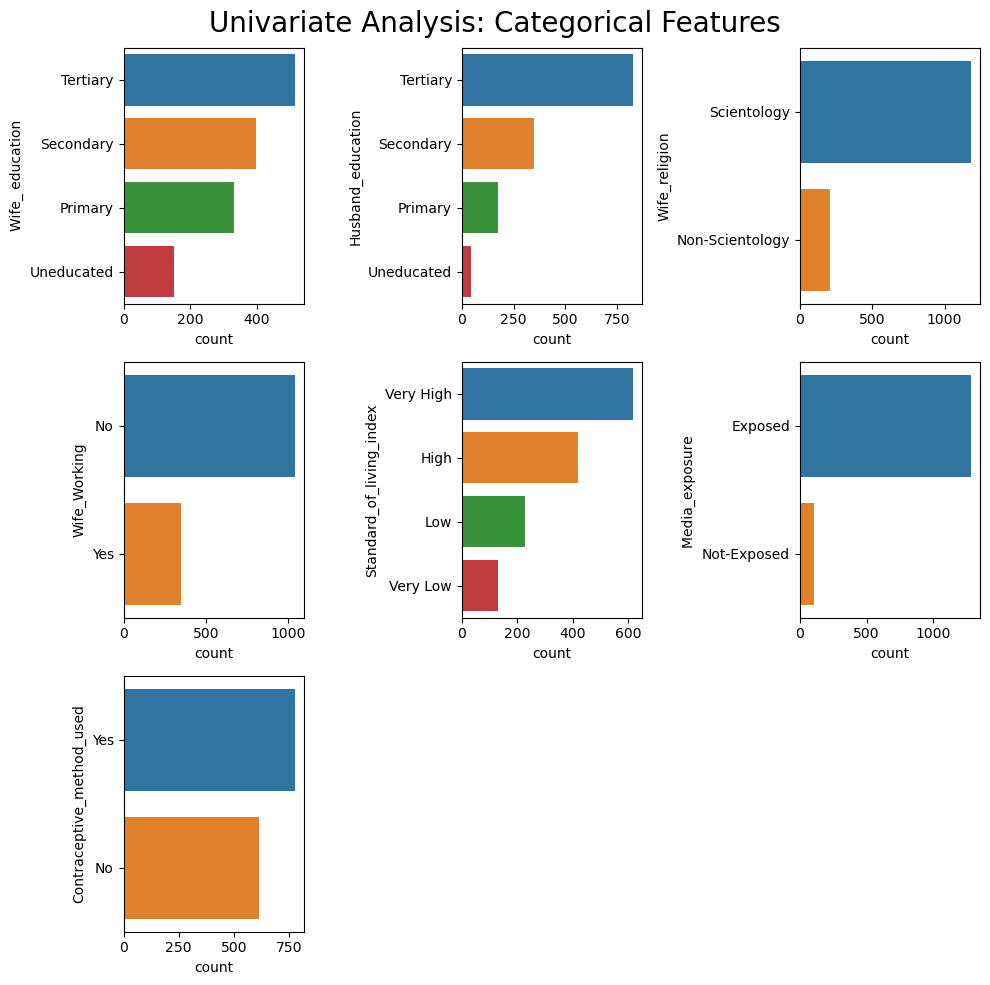

In [95]:
cat_cols=[col for col in fem_df.columns if fem_df[col].dtype == 'O']
from vizad.univariate import plot_univariate_categorical
plot_univariate_categorical(fem_df,cat_cols,kind='count')

**more observations are found with teritiary education in both husband and wife, I believe it's higher education than primary and secondary**

**women who follows religious principles are more in number who are adopting Contraceptive method**

**working women is less compared to non-working women**

**high society women are more in count in this dataset**

**Outliers observed in No_of_children_born feature which we are ignoring in this dataset**

##### Impute the missing values using median for wife_age and mode for no_of_children_born

In [96]:
fem_df1=fem_df.copy()
median_wife_age = fem_df1['Wife_age'].median()
mode_no_of_children_born = fem_df1['No_of_children_born'].mode()
fem_df1['Wife_age'].fillna(value=median_wife_age,inplace=True)
fem_df1['No_of_children_born'].fillna(value=mode_no_of_children_born[0],inplace=True)

In [97]:
fem_df1.isna().sum()

Wife_age                     0
Wife_ education              0
Husband_education            0
No_of_children_born          0
Wife_religion                0
Wife_Working                 0
Husband_Occupation           0
Standard_of_living_index     0
Media_exposure               0
Contraceptive_method_used    0
dtype: int64

#### Bivariate Analysis

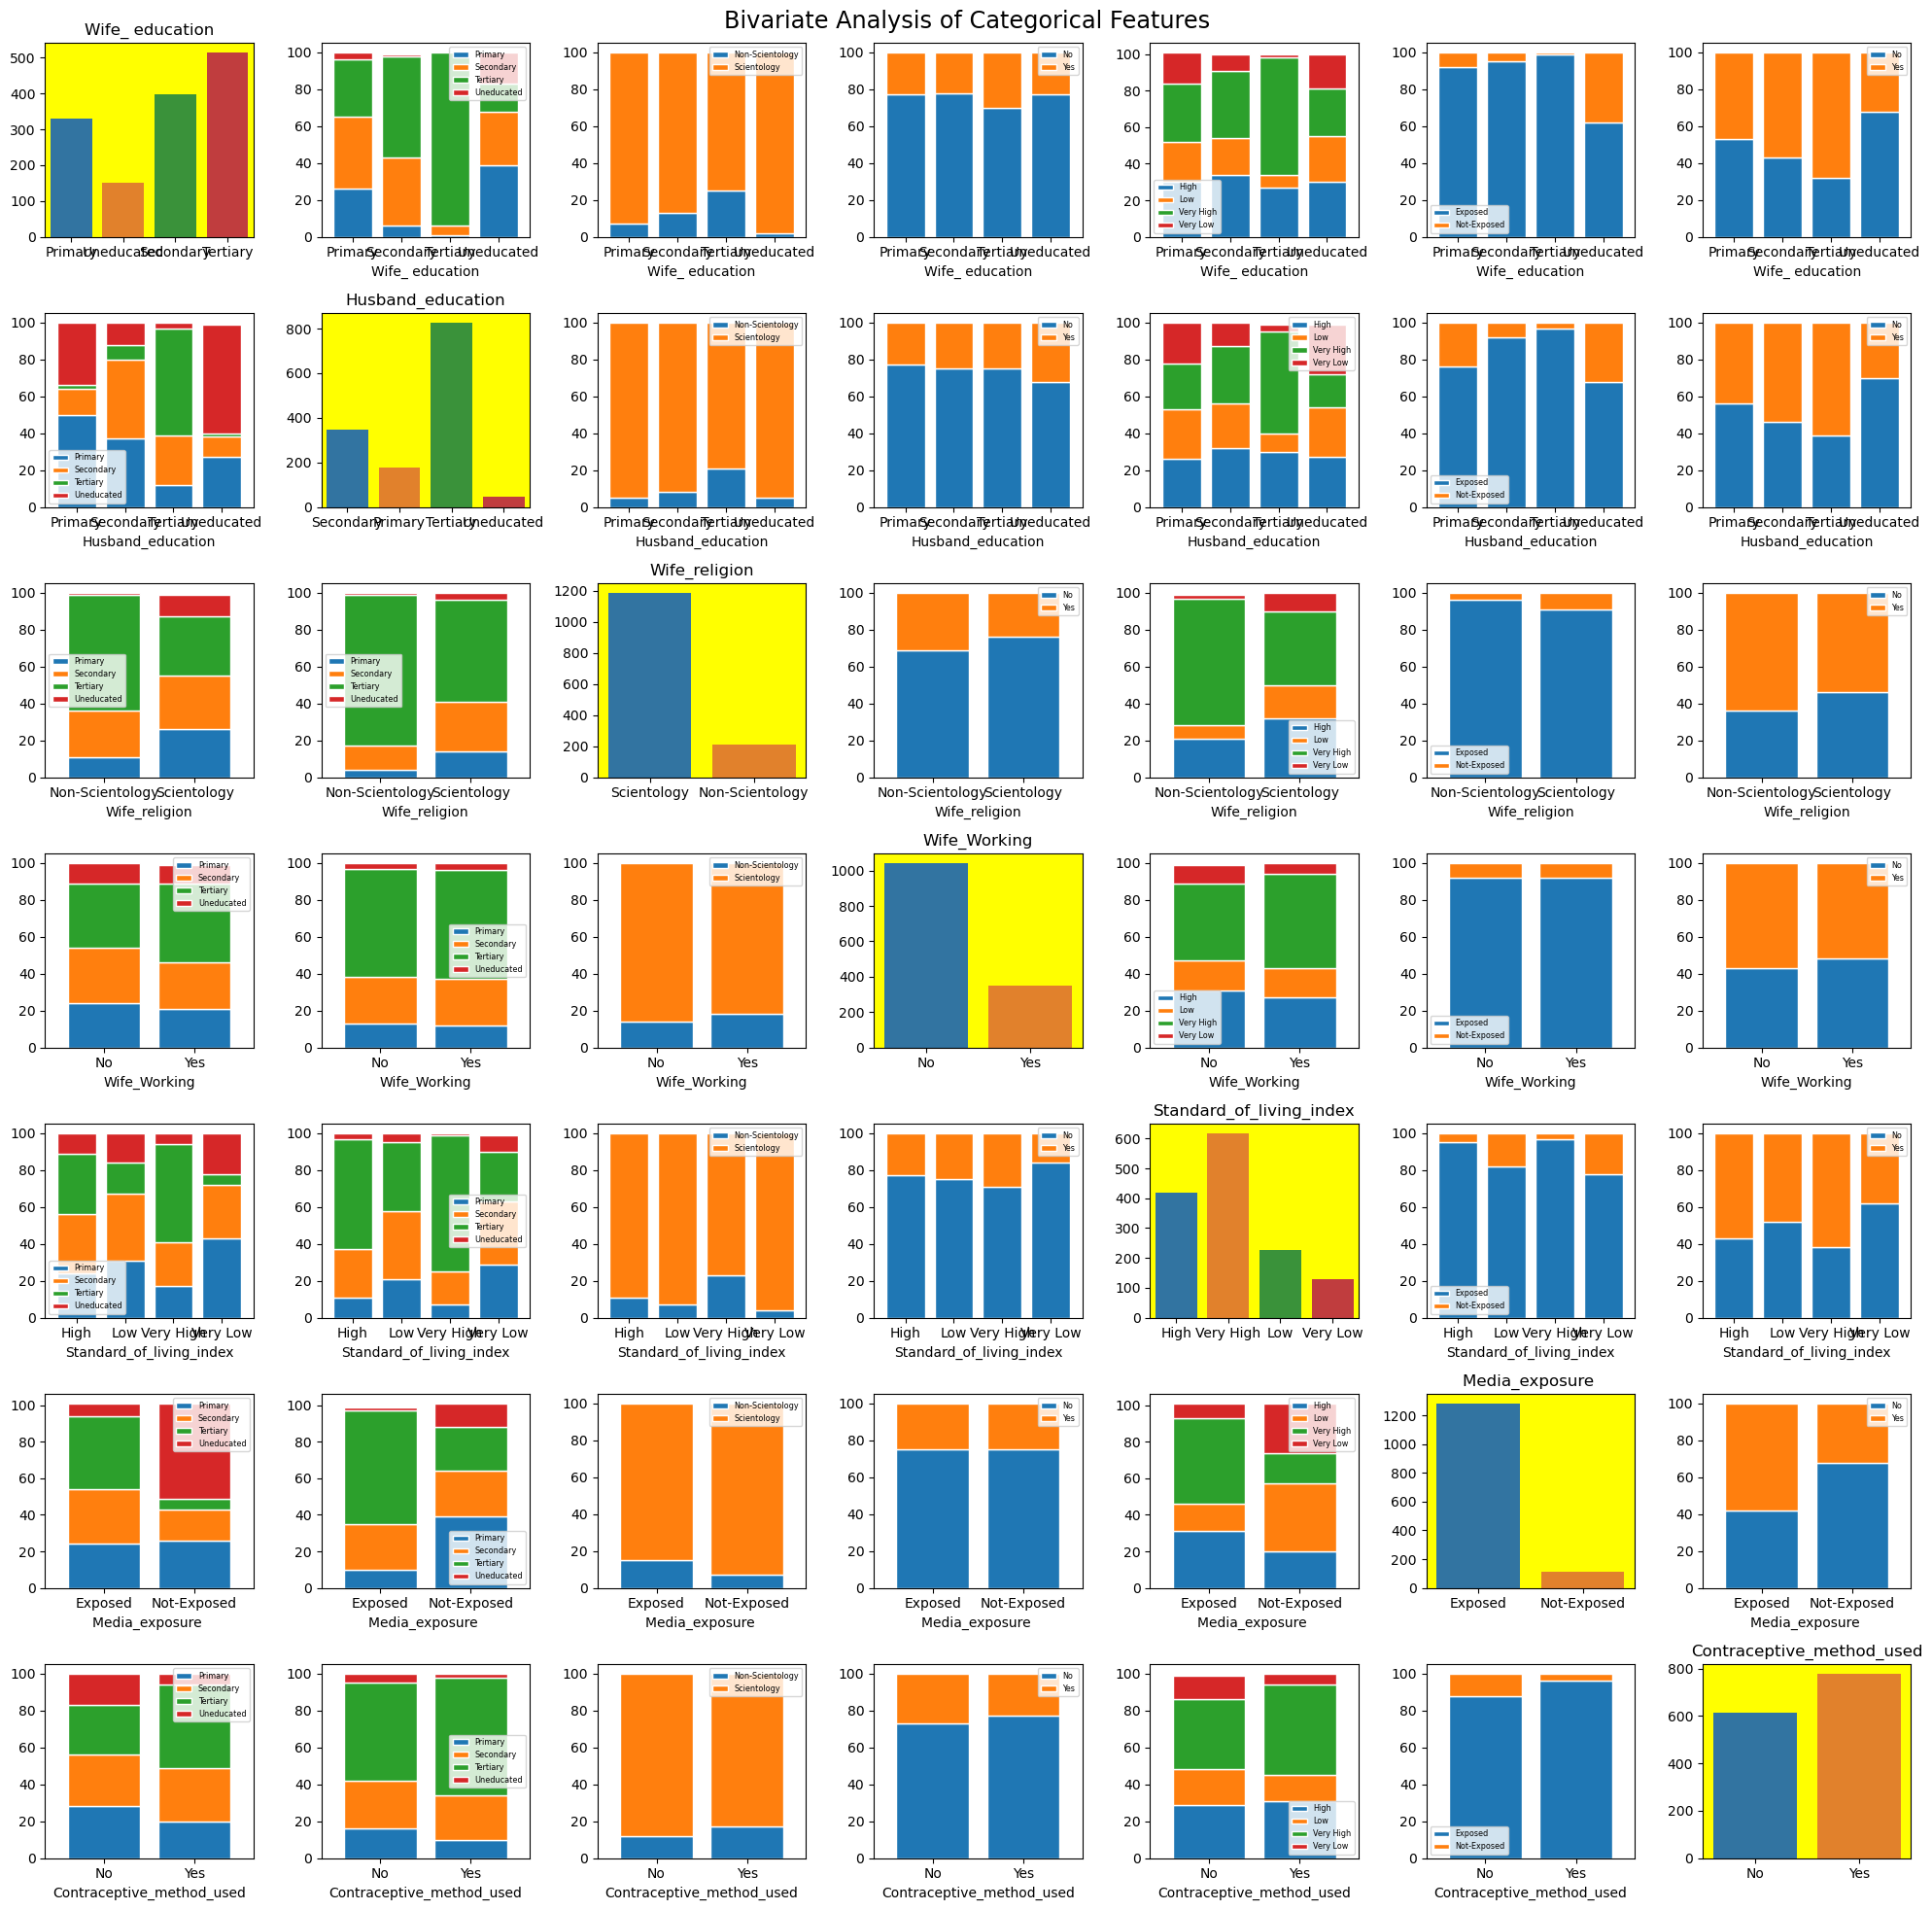

In [98]:
from vizad.bivariate import plot_bivariate_categorical, plot_bivariate_numeric
plot_bivariate_categorical(fem_df1,cat_cols,figsize=(20,20))

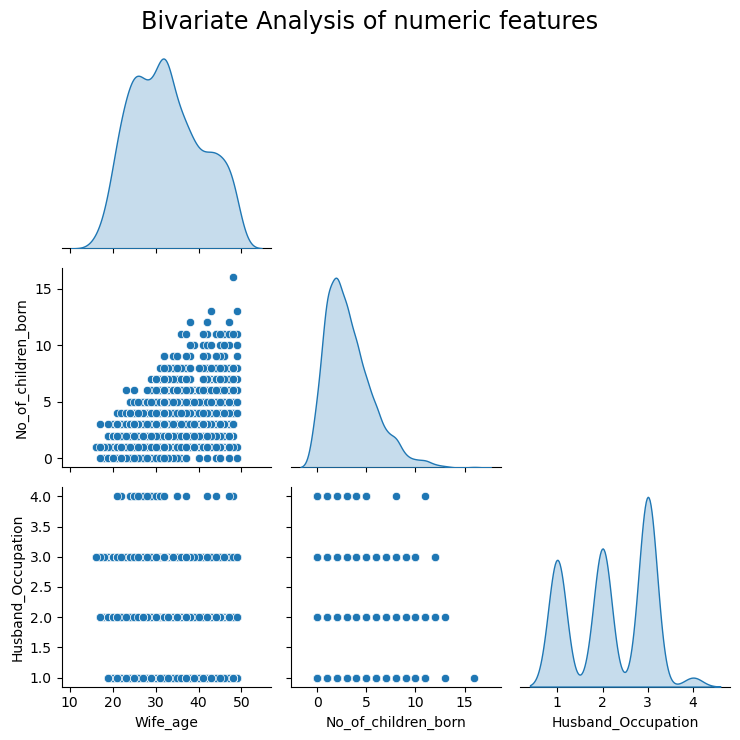

In [99]:
plot_bivariate_numeric(fem_df1,num_cols,figsize=(20,20))

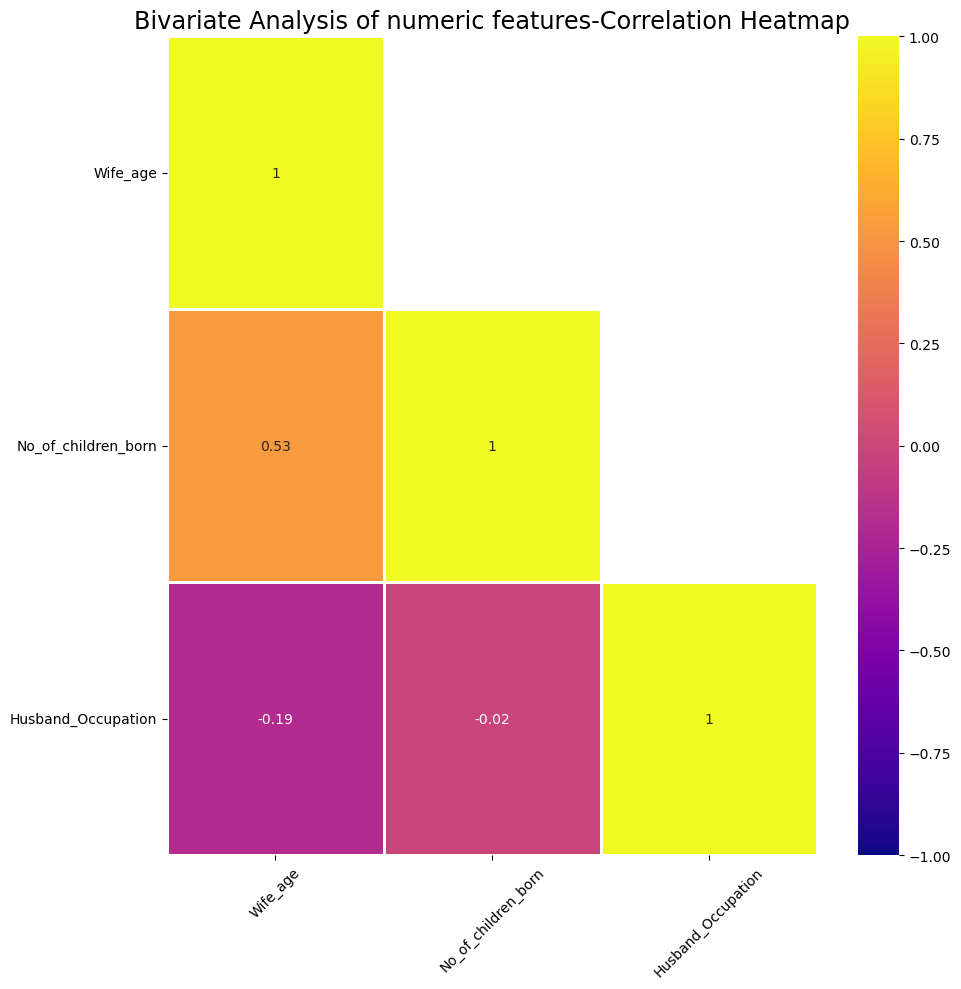

In [100]:
plot_bivariate_numeric(fem_df1,num_cols,kind='heatmap',figsize=(10,10))

**Slight correlation is found between wife_age and no_of_children_born**

#### Multivariate Analysis

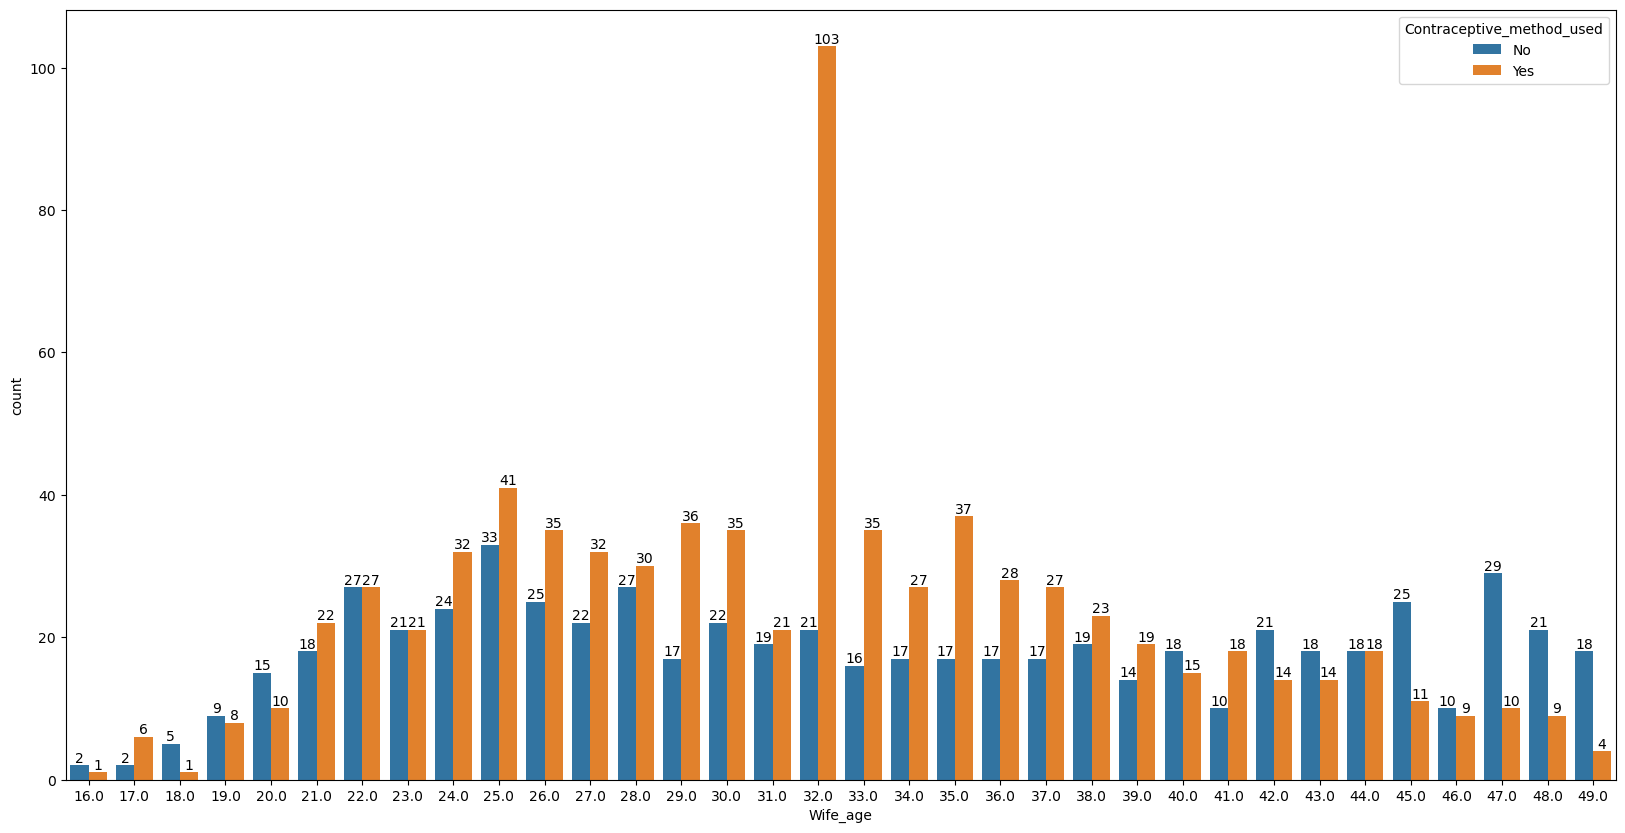

In [101]:
plt.figure(figsize=(20,10))
ax=sns.countplot(data=fem_df1,x='Wife_age',hue='Contraceptive_method_used',orient='h')
for label in ax.containers:
    ax.bar_label(label)
plt.show()

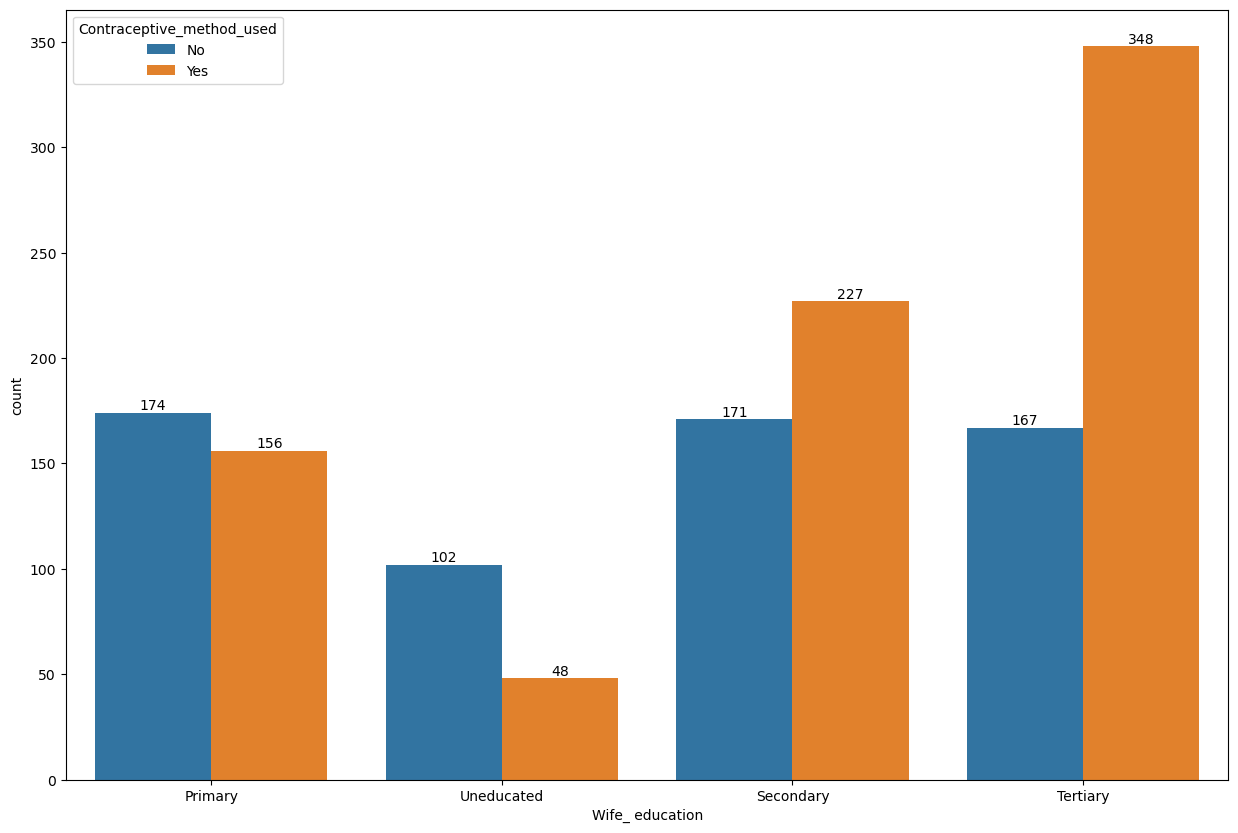

In [102]:
plt.figure(figsize=(15,10))
ax=sns.countplot(data=fem_df1,x='Wife_ education',hue='Contraceptive_method_used',orient='h')
for label in ax.containers:
    ax.bar_label(label)
plt.show()

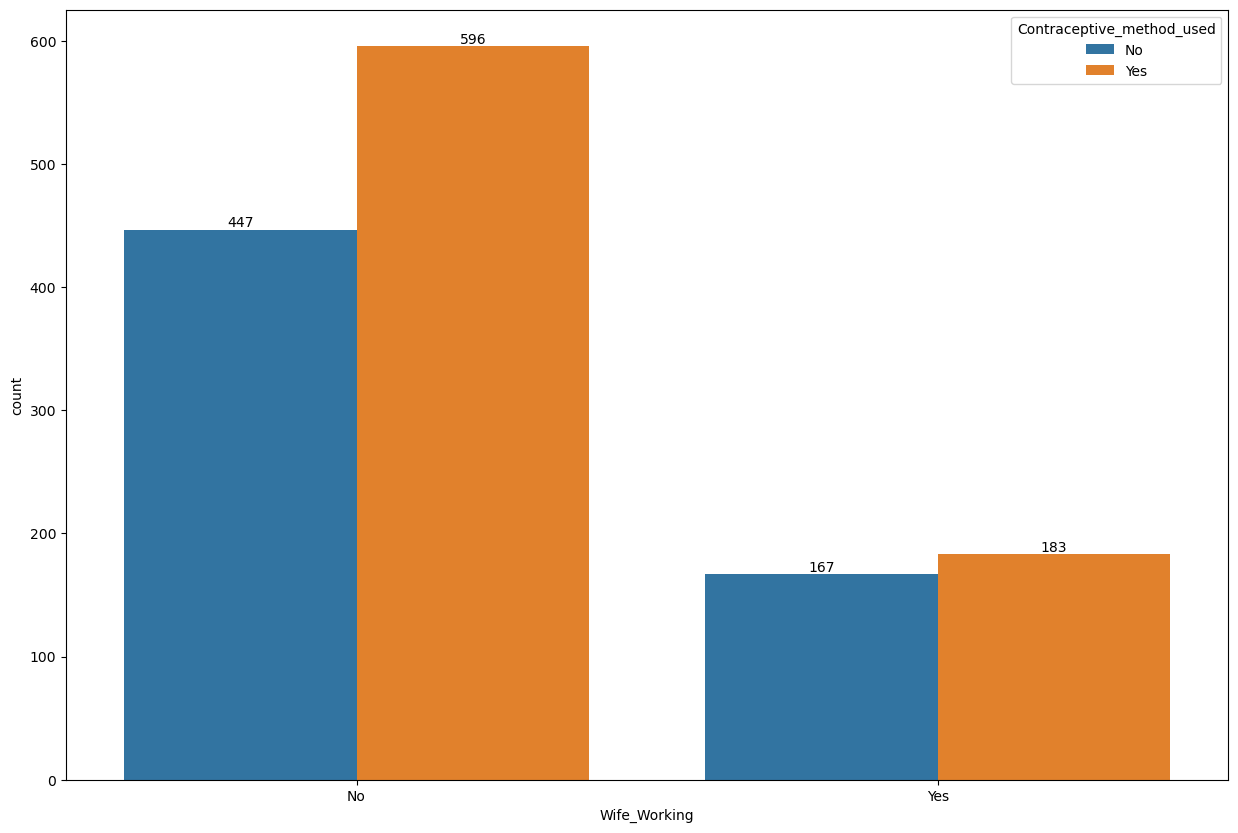

In [103]:
plt.figure(figsize=(15,10))
ax=sns.countplot(data=fem_df1,x='Wife_Working',hue='Contraceptive_method_used',orient='h')
for label in ax.containers:
    ax.bar_label(label)
plt.show()

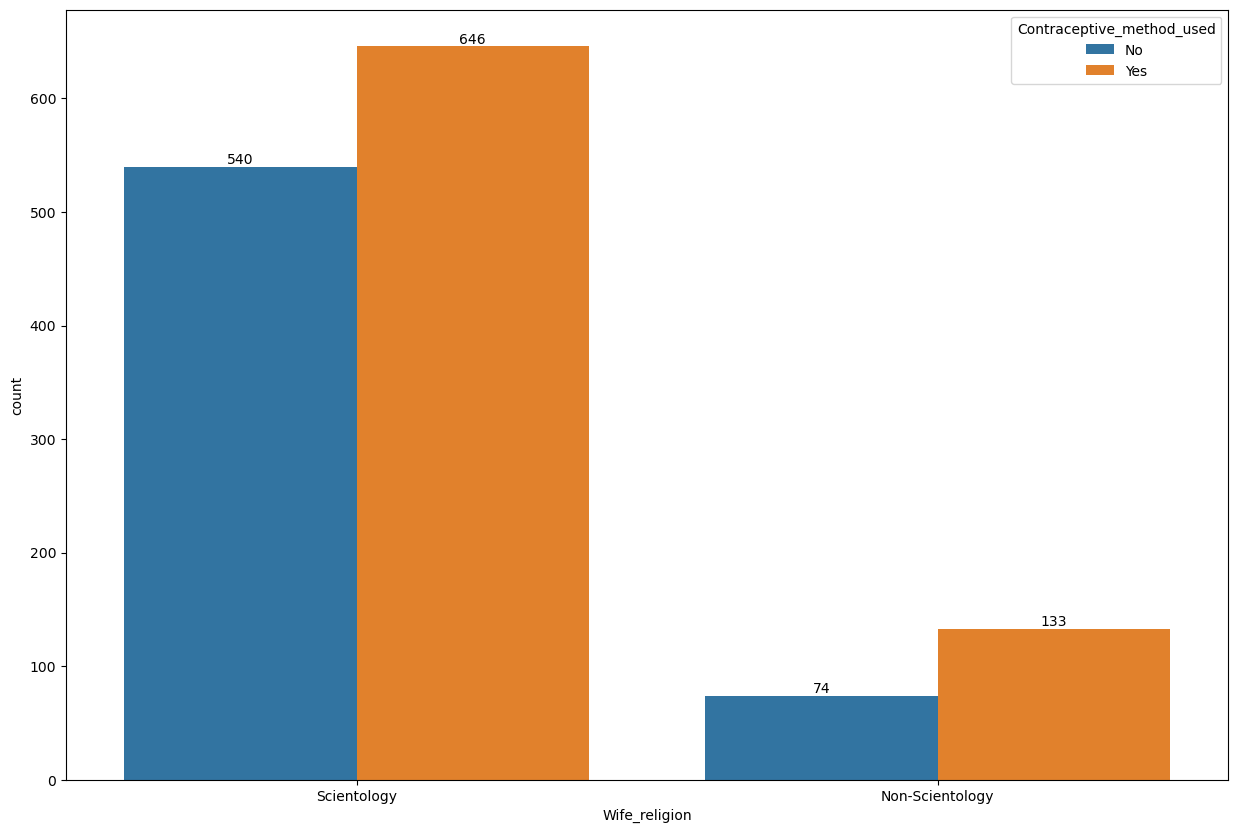

In [104]:
plt.figure(figsize=(15,10))
ax=sns.countplot(data=fem_df1,x='Wife_religion',hue='Contraceptive_method_used',orient='h')
for label in ax.containers:
    ax.bar_label(label)
plt.show()

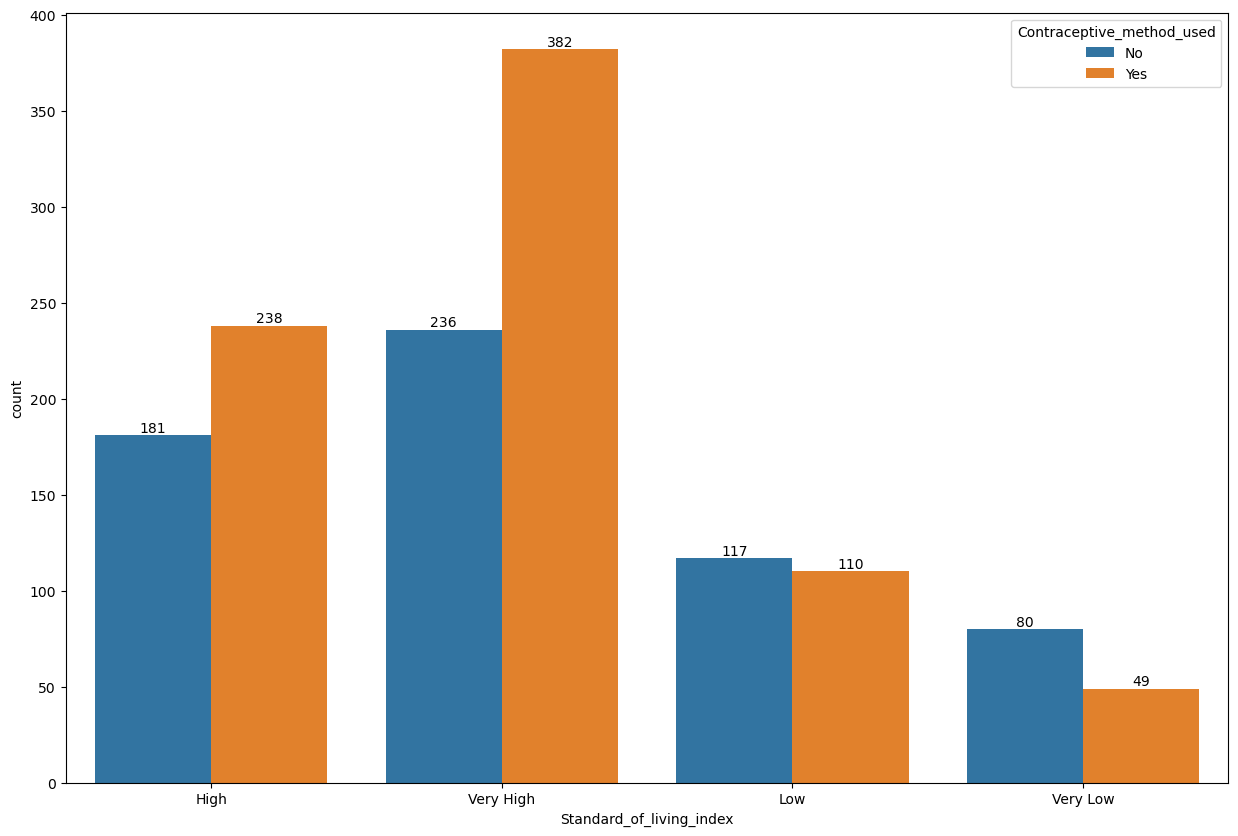

In [105]:
plt.figure(figsize=(15,10))
ax=sns.countplot(data=fem_df1,x='Standard_of_living_index',hue='Contraceptive_method_used',orient='h')
for label in ax.containers:
    ax.bar_label(label)
plt.show()

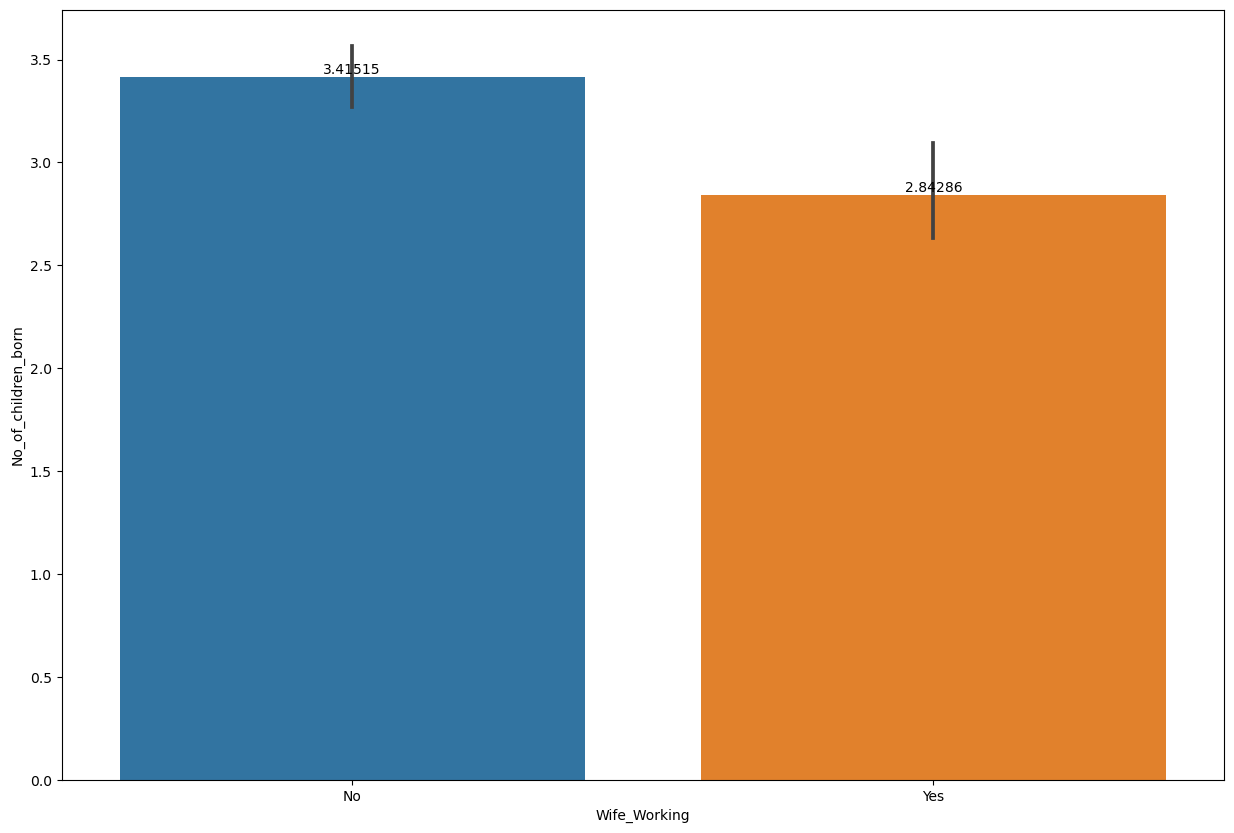

In [106]:
plt.figure(figsize=(15,10))
ax=sns.barplot(data=fem_df1,x='Wife_Working',y='No_of_children_born')
for label in ax.containers:
    ax.bar_label(label)
plt.show()

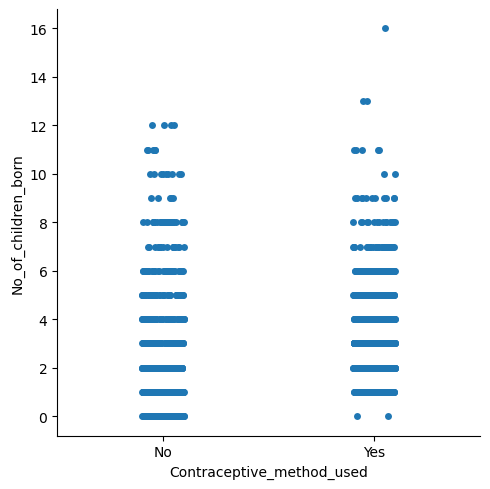

In [107]:
sns.catplot(data=fem_df1,x='Contraceptive_method_used',y='No_of_children_born');

In [108]:
fem_df1.head()

Wife_age Wife_ education Husband_education  No_of_children_born  \
0      24.0         Primary         Secondary                  3.0   
1      45.0      Uneducated         Secondary                 10.0   
2      43.0         Primary         Secondary                  7.0   
3      42.0       Secondary           Primary                  9.0   
4      36.0       Secondary         Secondary                  8.0   

  Wife_religion Wife_Working  Husband_Occupation Standard_of_living_index  \
0   Scientology           No                   2                     High   
1   Scientology           No                   3                Very High   
2   Scientology           No                   3                Very High   
3   Scientology           No                   3                     High   
4   Scientology           No                   3                      Low   

  Media_exposure  Contraceptive_method_used  
0         Exposed                        No  
1         Exposed                        No  
2         Exposed                        No  
3         Exposed                        No  
4         Exposed                        No

## 2.2 Do not scale the data. Encode the data (having string values) for Modelling. Data Split: Split the data into train and test (70:30). Apply Logistic Regression and LDA (linear discriminant analysis) and CART.

#### Encoding the string values

Since the education is a hirerchial data, we can't use simple encoder for ordinal data. We follow the below

Wife_education: Uneducated=1,Primary=2,Secondary=3,Teritiary=4

Husband_education: Uneducated=1,Primary=2,Secondary=3,Teritiary=4

Wife_religion: Scientology=1,non-scientology=2

Wife_Working: Yes=1,No=2

Standard_of_living_index: Very_low=1,low=2,high=3,very_high=4

Media_exposed: Exposed=1,Not-exposed=2

Contraceptive_Method_used: Yes=1,no=2

In [110]:
# Define mappings for each column
education_mapping = {'Uneducated': 1, 'Primary': 2, 'Secondary': 3, 'Tertiary': 4}
religion_mapping = {'Scientology': 1, 'Non-Scientology': 2}
working_mapping = {'Yes': 1, 'No': 2}
living_index_mapping = {'Very Low': 1, 'Low': 2, 'High': 3, 'Very High': 4}
media_exposure_mapping = {'Exposed': 1, 'Not-Exposed': 2}
contraceptive_method_mapping = {'Yes': 1, 'No': 0}

# Apply mappings to each column
fem_df1['Wife_ education'] = fem_df1['Wife_ education'].replace(education_mapping).astype('int')
fem_df1['Husband_education'] = fem_df1['Husband_education'].replace(education_mapping).astype('int')
fem_df1['Wife_religion'] = fem_df1['Wife_religion'].replace(religion_mapping).astype('int')
fem_df1['Wife_Working'] = fem_df1['Wife_Working'].replace(working_mapping).astype('int')
fem_df1['Standard_of_living_index'] = fem_df1['Standard_of_living_index'].replace(living_index_mapping).astype('int')
fem_df1['Media_exposure '] = fem_df1['Media_exposure '].replace(media_exposure_mapping).astype('int')
fem_df1['Contraceptive_method_used'] = fem_df1['Contraceptive_method_used'].replace(contraceptive_method_mapping).astype('int')


In [111]:
fem_df1.head()

Wife_age  Wife_ education  Husband_education  No_of_children_born  \
0      24.0                2                  3                  3.0   
1      45.0                1                  3                 10.0   
2      43.0                2                  3                  7.0   
3      42.0                3                  2                  9.0   
4      36.0                3                  3                  8.0   

   Wife_religion  Wife_Working  Husband_Occupation  Standard_of_living_index  \
0              1             2                   2                         3   
1              1             2                   3                         4   
2              1             2                   3                         4   
3              1             2                   3                         3   
4              1             2                   3                         2   

   Media_exposure   Contraceptive_method_used  
0                1                          0  
1                1                          0  
2                1                          0  
3                1                          0  
4                1                          0

In [112]:
fem_df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1393 entries, 0 to 1472
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Wife_age                   1393 non-null   float64
 1   Wife_ education            1393 non-null   int64  
 2   Husband_education          1393 non-null   int64  
 3   No_of_children_born        1393 non-null   float64
 4   Wife_religion              1393 non-null   int64  
 5   Wife_Working               1393 non-null   int64  
 6   Husband_Occupation         1393 non-null   int64  
 7   Standard_of_living_index   1393 non-null   int64  
 8   Media_exposure             1393 non-null   int64  
 9   Contraceptive_method_used  1393 non-null   int64  
dtypes: float64(2), int64(8)
memory usage: 119.7 KB


**all the categorical variables changed to numeric type to be used in the regression classifier**

**non-working women have already children and hence they are prone to use contraceptive methods**

<Figure size 1500x1500 with 0 Axes>

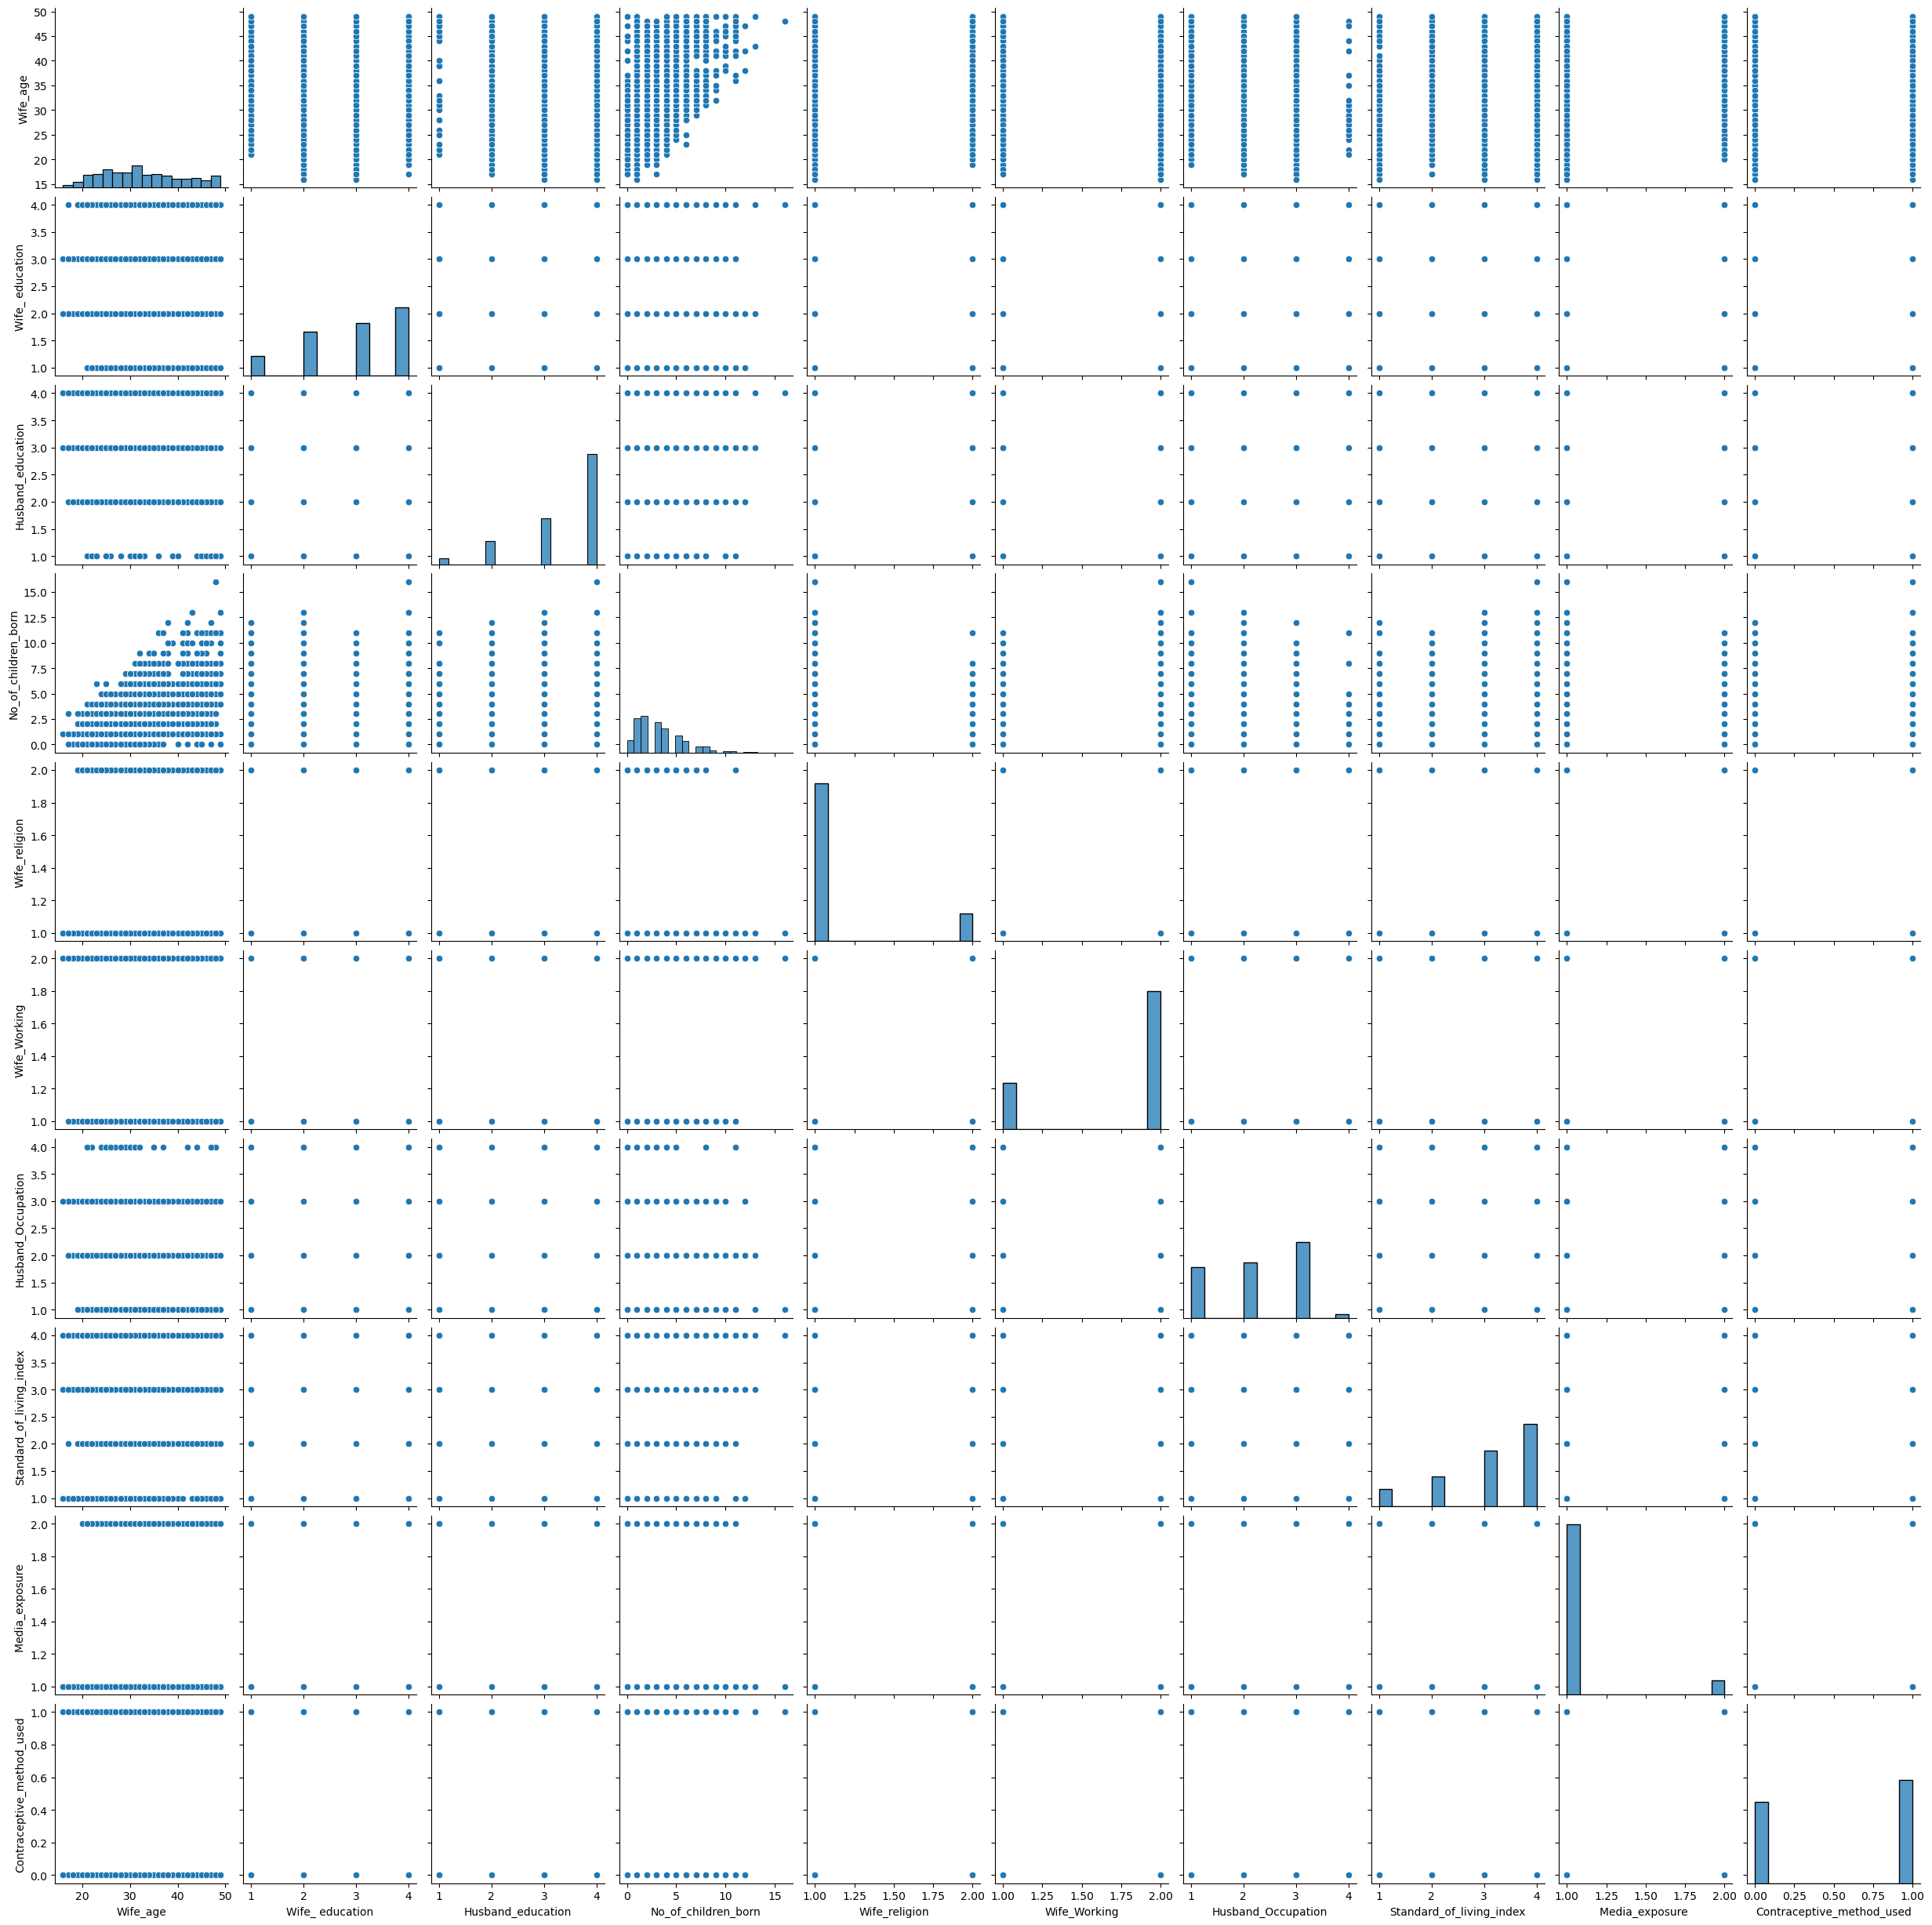

In [113]:
plt.figure(figsize=(15,15))
sns.pairplot(data=fem_df1);

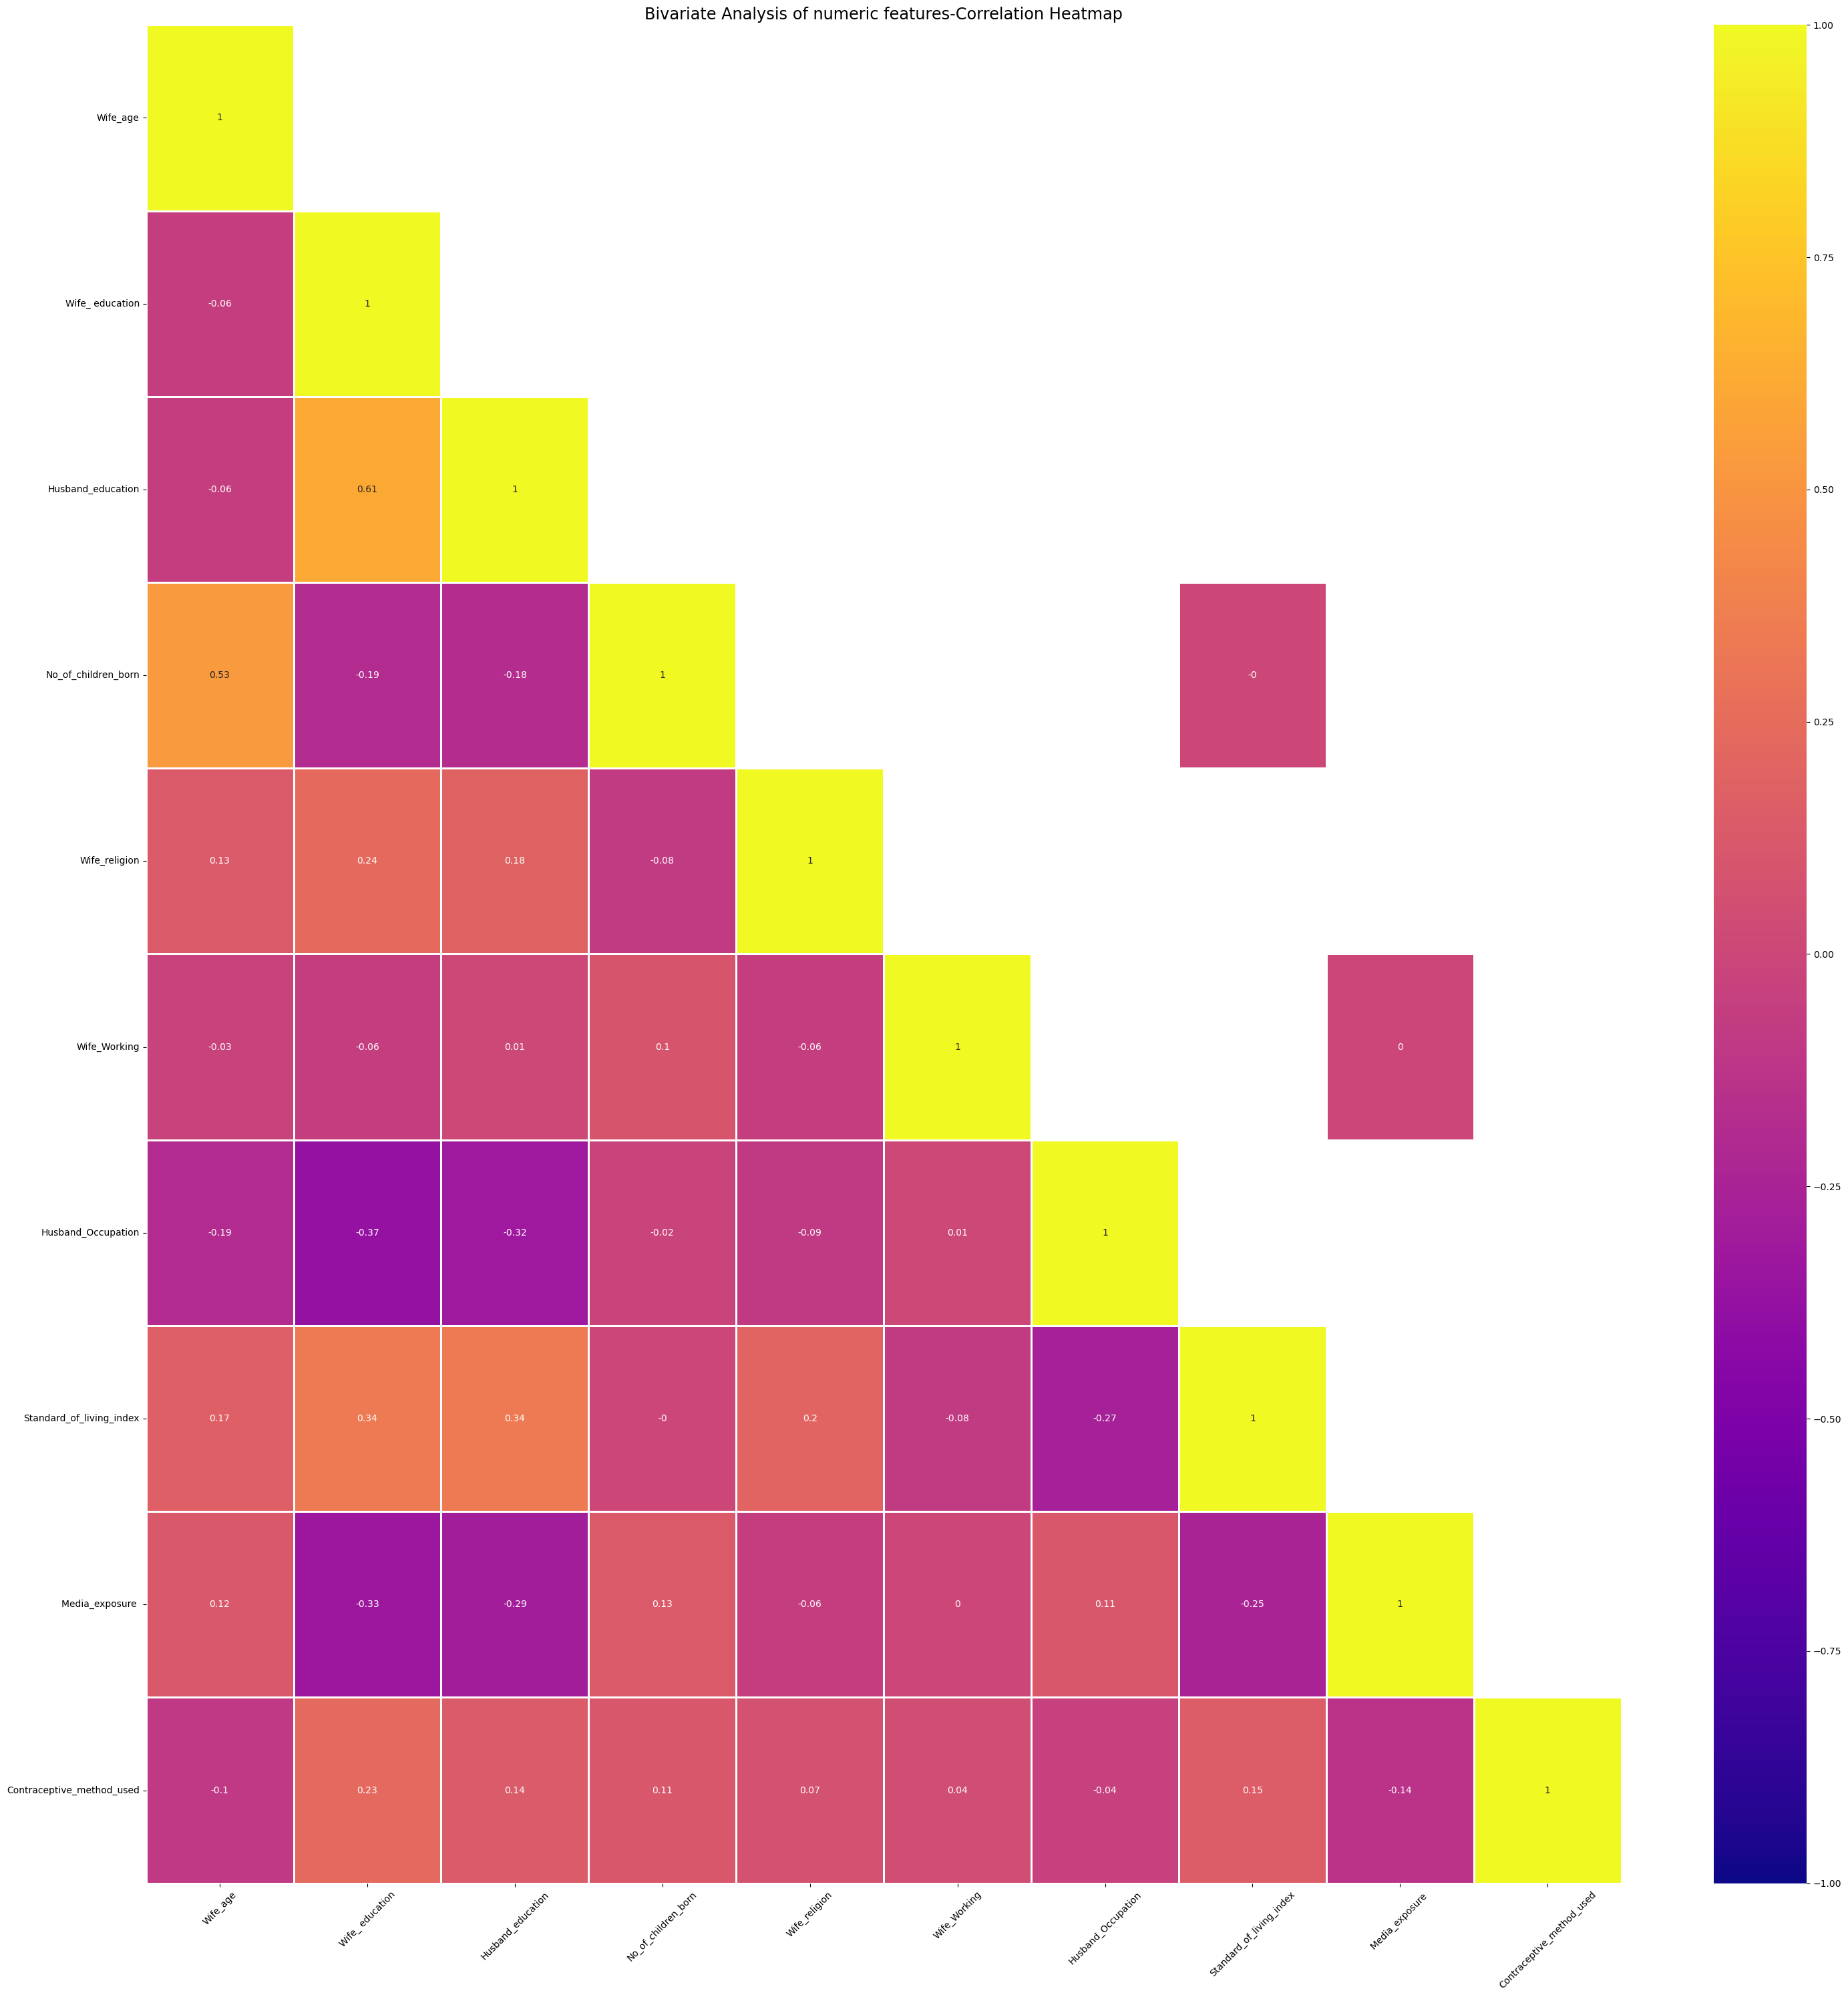

In [114]:
num_cols11=[col for col in fem_df1.columns if fem_df1[col].dtype != 'O']
plot_bivariate_numeric(fem_df1,num_cols11,kind='heatmap');

In [115]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
def calc_vif(X):
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return(vif)

In [116]:
vif_data["feature"] = fem_df1.columns
VIF=fem_df1.drop(['Contraceptive_method_used'],axis=1)
calc_vif(VIF)

variables        VIF
0                  Wife_age  23.961706
1           Wife_ education  16.159580
2         Husband_education  27.353996
3       No_of_children_born   4.328829
4             Wife_religion  12.616172
5              Wife_Working  14.777934
6        Husband_Occupation   6.921473
7  Standard_of_living_index  13.366890
8           Media_exposure   14.982575

## Split test train datasets

In [117]:
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import ConfusionMatrixDisplay

In [118]:
X=fem_df1.drop('Contraceptive_method_used', axis = 1)
y=fem_df1['Contraceptive_method_used']

In [119]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=1234)

In [120]:
lr=LogisticRegression(random_state=1234,max_iter=1000)
lr.fit(X_train,y_train)

LogisticRegression(max_iter=1000, random_state=1234)

In [121]:
y_train_pred=lr.predict(X_train)
y_test_pred=lr.predict(X_test)

In [122]:
lr.coef_

array([[-0.0744593 ,  0.50267599,  0.04747896,  0.30368193,  0.31470467,
         0.24310491,  0.15052807,  0.22543245, -0.17888122]])

In [123]:
lr.intercept_

array([-1.55480358])

In [124]:
print(y_train_pred)

[1 0 1 1 0 1 1 1 1 1 1 1 0 0 1 0 0 1 0 1 0 0 1 1 1 1 0 1 1 0 0 1 1 1 1 1 1
 1 1 0 1 0 1 1 1 0 0 1 1 1 0 1 0 0 1 1 1 1 0 0 1 1 0 1 0 1 0 1 0 1 1 1 1 1
 1 1 1 1 0 1 0 1 1 1 0 1 0 1 1 1 1 1 0 1 1 1 0 1 0 0 1 0 1 1 0 1 1 1 0 1 1
 0 1 0 1 1 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0 0 1 1 1 1 1 1 0 1 0 1 0 1 1 1 0
 0 0 1 1 0 1 1 1 1 1 0 1 1 0 0 1 1 1 0 0 0 1 1 1 1 1 1 1 0 1 1 0 1 0 1 1 1
 0 0 1 1 1 1 1 0 1 1 0 1 1 1 0 1 1 1 1 1 0 1 1 1 1 0 1 1 0 0 1 1 1 1 1 1 1
 1 0 1 1 0 0 1 1 1 1 1 1 0 0 1 1 1 1 0 0 1 1 1 1 0 1 1 1 1 1 0 1 0 1 0 1 0
 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 0 1 0 1 1 0 1 0 0 0 1 1 1 1 0 1 1 0
 1 1 1 1 1 0 1 0 0 0 0 1 1 1 1 0 1 0 0 1 1 0 1 0 1 1 0 0 1 0 1 1 1 0 1 0 1
 0 1 0 0 0 1 1 0 1 1 1 0 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 1 1 1 0
 0 1 0 0 1 1 1 1 0 1 1 0 0 0 0 0 1 0 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1
 1 1 0 1 0 0 0 1 0 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 1 0 

In [125]:
lr.predict_proba(X_train)

array([[0.38175202, 0.61824798],
       [0.55953009, 0.44046991],
       [0.34311094, 0.65688906],
       ...,
       [0.41910582, 0.58089418],
       [0.0843701 , 0.9156299 ],
       [0.60924396, 0.39075604]])

In [126]:
lr.predict_proba(X_test)

array([[0.22457025, 0.77542975],
       [0.81595065, 0.18404935],
       [0.48295969, 0.51704031],
       [0.32614866, 0.67385134],
       [0.34862755, 0.65137245],
       [0.32283233, 0.67716767],
       [0.34231418, 0.65768582],
       [0.33673245, 0.66326755],
       [0.63249539, 0.36750461],
       [0.20745482, 0.79254518],
       [0.74324297, 0.25675703],
       [0.56191349, 0.43808651],
       [0.79320199, 0.20679801],
       [0.37742776, 0.62257224],
       [0.42100779, 0.57899221],
       [0.69973044, 0.30026956],
       [0.42372184, 0.57627816],
       [0.3143542 , 0.6856458 ],
       [0.58963929, 0.41036071],
       [0.40027921, 0.59972079],
       [0.36891502, 0.63108498],
       [0.2980775 , 0.7019225 ],
       [0.29213728, 0.70786272],
       [0.37303891, 0.62696109],
       [0.20470936, 0.79529064],
       [0.44780208, 0.55219792],
       [0.66055434, 0.33944566],
       [0.57140878, 0.42859122],
       [0.18938379, 0.81061621],
       [0.34758489, 0.65241511],
       [0.

## LDA

In [127]:
lda = LinearDiscriminantAnalysis()
model_lda = lda.fit(X_train,y_train)

In [128]:
pred_class_train = model_lda.predict(X_train)
print(classification_report(y_train, pred_class_train))

              precision    recall  f1-score   support

           0       0.65      0.46      0.54       423
           1       0.66      0.81      0.73       552

    accuracy                           0.66       975
   macro avg       0.66      0.64      0.63       975
weighted avg       0.66      0.66      0.65       975



In [129]:
model_lda.intercept_

array([-1.53704431])

In [130]:
model_lda.coef_

array([[-0.07352973,  0.50471497,  0.03894663,  0.29590264,  0.33874406,
         0.25605131,  0.14557094,  0.2276516 , -0.20069879]])

In [131]:
pred_class_train

array([1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1,

In [132]:
model_lda.predict_proba(X_train)

array([[0.37745628, 0.62254372],
       [0.55307971, 0.44692029],
       [0.33852559, 0.66147441],
       ...,
       [0.41106463, 0.58893537],
       [0.08599489, 0.91400511],
       [0.60815741, 0.39184259]])

In [133]:
model_lda.predict_proba(X_test)

array([[0.21594267, 0.78405733],
       [0.81121049, 0.18878951],
       [0.47613126, 0.52386874],
       [0.32496211, 0.67503789],
       [0.34116773, 0.65883227],
       [0.32442931, 0.67557069],
       [0.33717098, 0.66282902],
       [0.33751668, 0.66248332],
       [0.62457777, 0.37542223],
       [0.21414613, 0.78585387],
       [0.73518292, 0.26481708],
       [0.55613301, 0.44386699],
       [0.7857963 , 0.2142037 ],
       [0.36448376, 0.63551624],
       [0.42291945, 0.57708055],
       [0.69233483, 0.30766517],
       [0.4186023 , 0.5813977 ],
       [0.30854339, 0.69145661],
       [0.59533452, 0.40466548],
       [0.39968977, 0.60031023],
       [0.36032931, 0.63967069],
       [0.2942004 , 0.7057996 ],
       [0.28429355, 0.71570645],
       [0.36690084, 0.63309916],
       [0.21133298, 0.78866702],
       [0.44148957, 0.55851043],
       [0.65443754, 0.34556246],
       [0.56552918, 0.43447082],
       [0.18824757, 0.81175243],
       [0.33904498, 0.66095502],
       [0.

In [135]:
#pred_class_test

## CART model

In [136]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier(criterion='gini',random_state=1234)

In [137]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(random_state=1234)

In [138]:
from sklearn import tree

In [139]:
train_class_label=['0','1']

In [140]:
Fem_Tree_File=open('/Users/aravindakshan/Downloads/Fem_tree.dot','w')

In [141]:
tree.export_graphviz(dtree,out_file='Fem_Tree_File', feature_names=list(X_train), class_names=train_class_label)

In [142]:
Fem_Tree_File.close()

In [143]:
param_grid_tree={'max_depth':np.arange(3,11), 'min_samples_leaf': [2,5,10,15], 'min_samples_split': [10,20,30], 'criterion': ['gini','entropy']}

In [144]:
from sklearn.model_selection import GridSearchCV, KFold
kf=KFold(n_splits=5, shuffle=True, random_state=1234)
dt_grid=DecisionTreeClassifier()
grid_search=GridSearchCV(estimator=dt_grid,param_grid=param_grid_tree,cv=kf,scoring='recall',verbose=0)
grid_search.fit(X_train,y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=1234, shuffle=True),
             estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 3,  4,  5,  6,  7,  8,  9, 10]),
                         'min_samples_leaf': [2, 5, 10, 15],
                         'min_samples_split': [10, 20, 30]},
             scoring='recall')

In [145]:
print(grid_search.best_params_)

{'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 10}


[Text(0.4090909090909091, 0.875, 'No_of_children_born <= 0.5\ngini = 0.491\nsamples = 975\nvalue = [423, 552]\nclass = 1'),
 Text(0.18181818181818182, 0.625, 'Husband_Occupation <= 3.5\ngini = 0.03\nsamples = 65\nvalue = [64, 1]\nclass = 0'),
 Text(0.09090909090909091, 0.375, 'gini = 0.0\nsamples = 61\nvalue = [61, 0]\nclass = 0'),
 Text(0.2727272727272727, 0.375, 'gini = 0.375\nsamples = 4\nvalue = [3, 1]\nclass = 0'),
 Text(0.6363636363636364, 0.625, 'Wife_age <= 41.5\ngini = 0.478\nsamples = 910\nvalue = [359, 551]\nclass = 1'),
 Text(0.45454545454545453, 0.375, 'Wife_ education <= 3.5\ngini = 0.45\nsamples = 756\nvalue = [258, 498]\nclass = 1'),
 Text(0.36363636363636365, 0.125, 'gini = 0.48\nsamples = 477\nvalue = [191, 286]\nclass = 1'),
 Text(0.5454545454545454, 0.125, 'gini = 0.365\nsamples = 279\nvalue = [67, 212]\nclass = 1'),
 Text(0.8181818181818182, 0.375, 'Wife_ education <= 2.5\ngini = 0.451\nsamples = 154\nvalue = [101, 53]\nclass = 0'),
 Text(0.7272727272727273, 0.125,

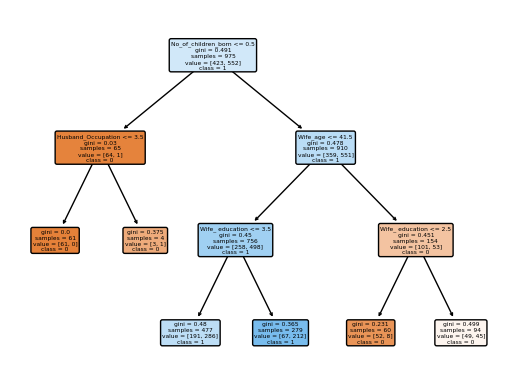

In [146]:
from sklearn.tree import plot_tree
plot_tree(grid_search.best_estimator_,feature_names=X_train.columns,class_names=train_class_label,filled=True,rounded=True)

In [147]:
dtree_GV=DecisionTreeClassifier(criterion='gini',max_depth=3,min_samples_leaf=2,min_samples_split=10,random_state=1234)

In [148]:
dtree_GV.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=2, min_samples_split=10,
                       random_state=1234)

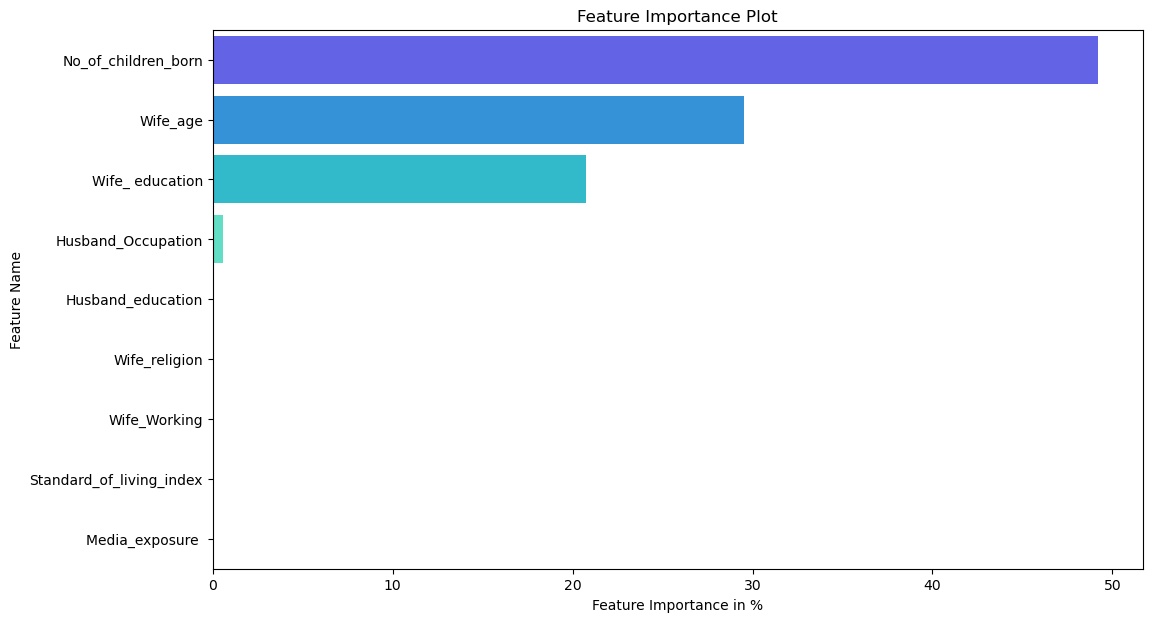

In [149]:
x=pd.DataFrame(dtree_GV.feature_importances_*100,index=X_train.columns).sort_values(by=0,ascending=False)
plt.figure(figsize=(12,7))
sns.barplot(x=x[0],y=x.index,palette='rainbow')
plt.ylabel('Feature Name')
plt.xlabel('Feature Importance in %')
plt.title('Feature Importance Plot')
plt.show()

In [150]:
dtree.feature_importances_

array([0.32340964, 0.087885  , 0.05927087, 0.23026798, 0.03228723,
       0.05858675, 0.07798741, 0.11635672, 0.01394838])

In [151]:
dtree_GV.feature_importances_

array([0.29503193, 0.20719224, 0.        , 0.49230846, 0.        ,
       0.        , 0.00546736, 0.        , 0.        ])

## 2.3 Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model Final Model: Compare Both the models and write inference which model is best/optimized.

## Logistic Regression

In [152]:
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       0.65      0.47      0.54       423
           1       0.66      0.81      0.73       552

    accuracy                           0.66       975
   macro avg       0.66      0.64      0.64       975
weighted avg       0.66      0.66      0.65       975



In [153]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.68      0.53      0.60       191
           1       0.67      0.79      0.73       227

    accuracy                           0.67       418
   macro avg       0.68      0.66      0.66       418
weighted avg       0.68      0.67      0.67       418



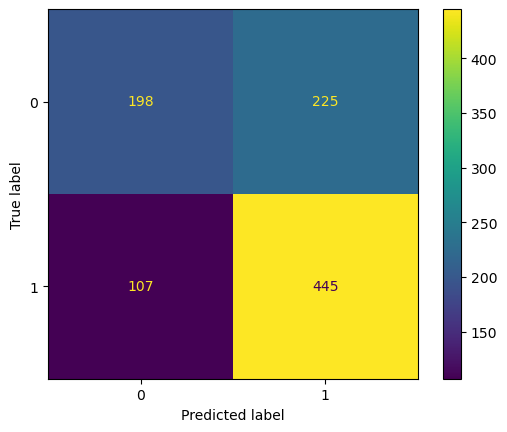

In [154]:
ConfusionMatrixDisplay.from_estimator(lr,X_train,y_train);

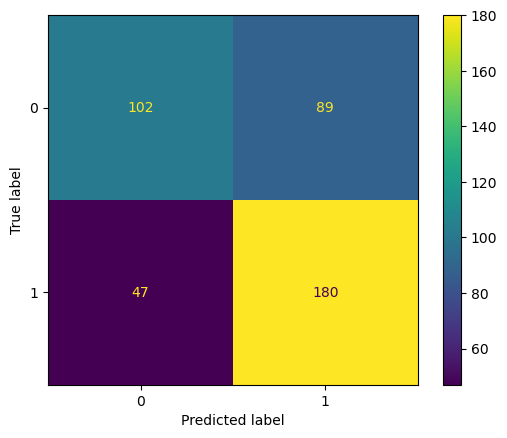

In [155]:
ConfusionMatrixDisplay.from_estimator(lr,X_test,y_test);

In [156]:
print('Accuracy Score for training is',round(accuracy_score(y_train, y_train_pred),2)*100,'%')
print('Area Under the Curve for training is',round(roc_auc_score(y_train,lr.predict_proba(X_train)[:,1]),2)*100,'%')

Accuracy Score for training is 66.0 %
Area Under the Curve for training is 69.0 %


In [157]:
print('Accuracy Score for test is',round(accuracy_score(y_test, y_test_pred),2)*100,'%')
print('Area Under the Curve for test is',round(roc_auc_score(y_test,lr.predict_proba(X_test)[:,1]),2)*100,'%')

Accuracy Score for test is 67.0 %
Area Under the Curve for test is 71.0 %


In [158]:
lr_fpr, lr_tpr,_=roc_curve(y_train,lr.predict_proba(X_train)[:,1])

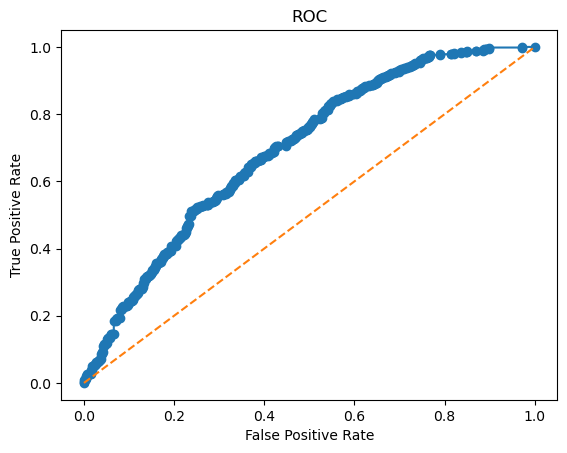

In [159]:
plt.plot(lr_fpr,lr_tpr, marker='o', label='Logistic regressor')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()

## LDA Metrics

In [160]:
pred_class_train = model_lda.predict(X_train)
print(classification_report(y_train, pred_class_train))

              precision    recall  f1-score   support

           0       0.65      0.46      0.54       423
           1       0.66      0.81      0.73       552

    accuracy                           0.66       975
   macro avg       0.66      0.64      0.63       975
weighted avg       0.66      0.66      0.65       975



In [161]:
pred_class_test = model_lda.predict(X_test)
print(classification_report(y_test, pred_class_test))

              precision    recall  f1-score   support

           0       0.70      0.52      0.60       191
           1       0.67      0.81      0.73       227

    accuracy                           0.68       418
   macro avg       0.68      0.67      0.67       418
weighted avg       0.68      0.68      0.67       418



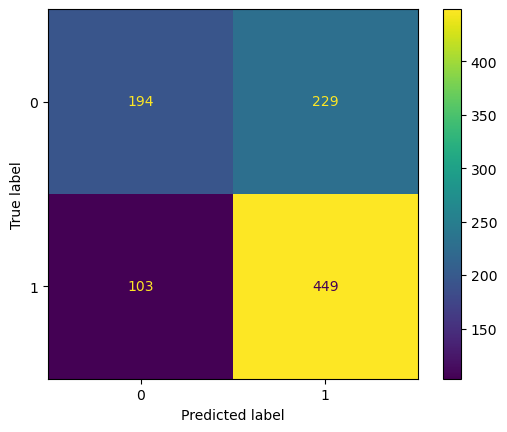

In [162]:
ConfusionMatrixDisplay.from_estimator(model_lda,X_train,y_train);

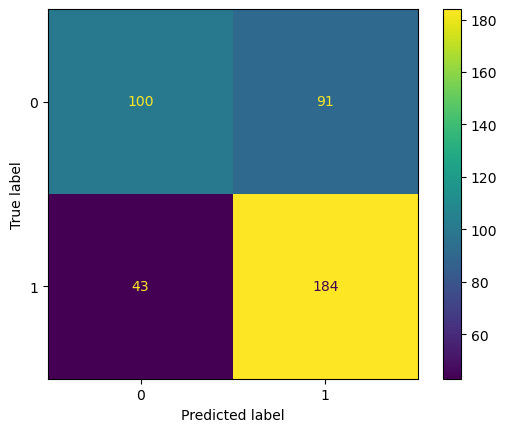

In [163]:
ConfusionMatrixDisplay.from_estimator(model_lda,X_test,y_test);

In [164]:
print('Area Under the Curve for training is',round(roc_auc_score(y_train,model_lda.predict_proba(X_train)[:,1]),2)*100,'%')
print('Area Under the Curve for test is',round(roc_auc_score(y_test,model_lda.predict_proba(X_test)[:,1]),2)*100,'%')

Area Under the Curve for training is 69.0 %
Area Under the Curve for test is 71.0 %


In [165]:
lda_fpr, lda_tpr,_=roc_curve(y_train,model_lda.predict_proba(X_train)[:,1])

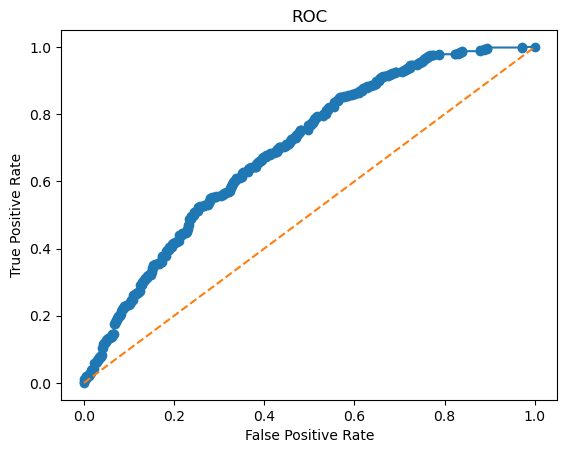

In [166]:
plt.plot(lda_fpr,lda_tpr, marker='o', label='LDA')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()

## CART Metrics

In [167]:
print(classification_report(y_train,dtree_GV.predict(X_train)))

              precision    recall  f1-score   support

           0       0.75      0.39      0.51       423
           1       0.66      0.90      0.76       552

    accuracy                           0.68       975
   macro avg       0.71      0.65      0.64       975
weighted avg       0.70      0.68      0.65       975



In [168]:
print(classification_report(y_test,dtree_GV.predict(X_test)))

              precision    recall  f1-score   support

           0       0.68      0.40      0.50       191
           1       0.62      0.84      0.72       227

    accuracy                           0.64       418
   macro avg       0.65      0.62      0.61       418
weighted avg       0.65      0.64      0.62       418



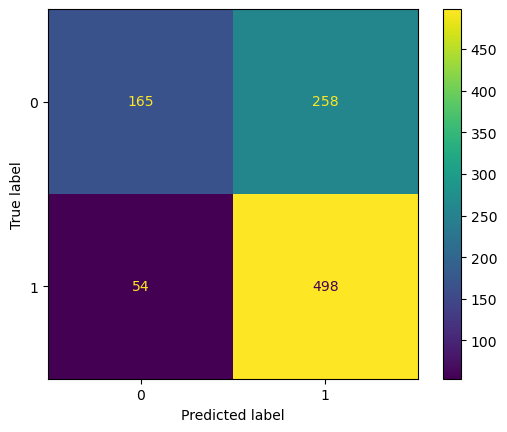

In [169]:
ConfusionMatrixDisplay.from_estimator(dtree_GV,X_train,y_train);

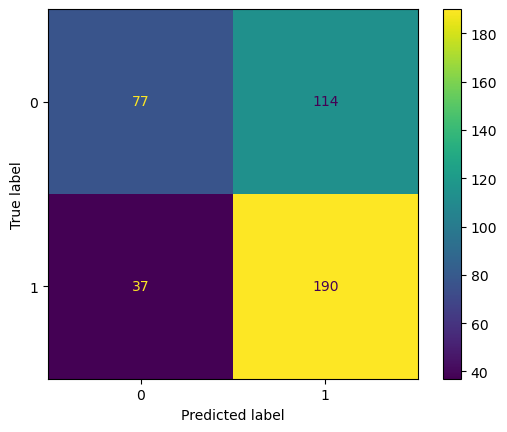

In [170]:
ConfusionMatrixDisplay.from_estimator(dtree_GV,X_test,y_test);

In [171]:
print('Area Under the Curve for training is',round(roc_auc_score(y_train,dtree_GV.predict_proba(X_train)[:,1]),2)*100,'%')
print('Area Under the Curve for test is',round(roc_auc_score(y_test,dtree_GV.predict_proba(X_test)[:,1]),2)*100,'%')

Area Under the Curve for training is 70.0 %
Area Under the Curve for test is 69.0 %


In [172]:
dtreeGV_fpr, dtreeGV_tpr,_=roc_curve(y_train,dtree_GV.predict_proba(X_train)[:,1])

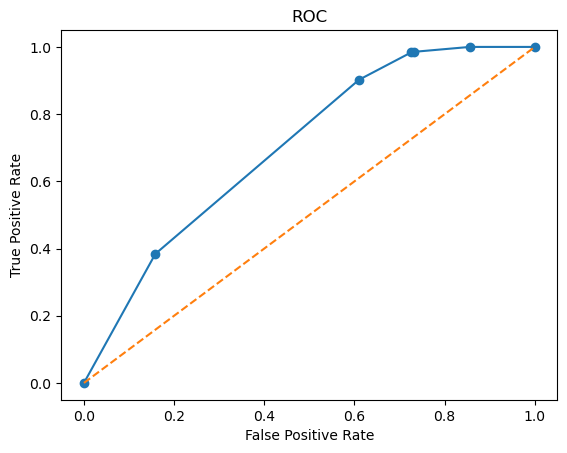

In [173]:
plt.plot(dtreeGV_fpr,dtreeGV_tpr, marker='o', label='LDA')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()

**looking at accuracy, recall and AUC, all are almost performing similar**

**The significant / important feature represented by CART is No_of_children_born then Wife_age. This clearly shows that most women who are taking contraceptive has these reasons**

**CART model isn't showing society status/ working/ religion as a reason for contraceptive**

**LDA performed better than LR but DT outperformed both LR and LDA with lesser tree size. But DT is not a perfect model which needs Random Forest in order to perform multiple times to decide the best parameters. So LDA is the good choice for this dataset.**

## 2.4 Inference: Basis on these predictions, what are the insights and recommendations.

**Removed 80 duplicate entries from the dataset**

**In Univariate analysis it has been outstood that No_of_children_born has outlier, but I haven't treated those outliers and used as-is in the model**

**Uneducated women are majorily found in Scientology, as they may not be working womens, they contributing to religion**

**High educated women are highly using conterceptive method compared to uneducated women**

**High society women as heavily using conterceptive method**

**Slight correlation found in No_of_children_born and Wife_age**

**More number of women are at age of 32 years**

**Well educated women are using conterceptive higher than the uneducated women**

**Non working women has more number of children compared to working women and hence they are using conterceptive**

**Encoded the categorical variable using ordinal method as the education is an hirerchial data**

**In heatmap and pairplot, it doesn't reflect multicolinearity between variables**

**Using Variance Influence Factor stats method, there found multicolinearity between Standard_of_living_index, wife_working, husband_education, wife_age and wife_education) But I haven't experimented dropping one after other to check the model perfection**

**Data was split into 70:30 as per the problem statement**

**fitted the model using logistic regressor, linear discriminant analysis and CART (Decision Tree)**

**The co_efficient of independent variables shown almost close between these models**

**Calculated the accuracy under the curve using the probability method of the models**

**GridSearchCV using different parameter executed and used the best parameter resulted from GridSearchCV**

**Important features are found to be No_of_children_born & Wife_age, if already having children those womens are practising Contraceptive method to avoid pregnancy**

**Using the Metric calculated by each model, LDA is giving better result (though Decision Tree is better , I heard in classes they aren't best)

**Conclusion:

>**Womens who already have childrens are more using conterceptive method to avoid pregnancy**

>**Their age is other significant variable to classify the usage**

>**LDA is good model for this use case**